In [1]:
pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=91daf38b55047e59a3a75f1739c9fdce059c95ee454a40f71e458f58f52096dd
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import torch
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
from torchvision.models import resnet50  
import pickle
from cryptography.fernet import Fernet
import random
from tqdm import tqdm  # Add tqdm for live epoch updates
from imutils import paths
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
imagePaths = list(paths.list_images('/kaggle/input/autism'))

In [4]:
imagePaths

['/kaggle/input/autism/autism/validation/Autistic/45.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/20.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/30.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/38.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/42.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/33.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/10.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/35.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/41.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/03.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/37.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/46.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/44.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/01.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/50.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/29.jpg',
 '/kaggle/input/autism/autism/validation/Autistic/16.jpg

In [5]:
# Define the transformation for the "autism" dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet-101 input size
    transforms.ToTensor()
])

In [6]:
# Load the "autism" dataset
train_dataset = ImageFolder('/kaggle/input/autism/autism/train', transform=transform)
test_dataset = ImageFolder('/kaggle/input/autism/autism/test', transform=transform)

# Print the length of the datasets
print(f"Number of samples in the training set: {len(train_dataset)}")
print(f"Number of samples in the test set: {len(test_dataset)}")

# Print the classes (categories) in the dataset
print(f"Classes in the dataset: {train_dataset.classes}")

# Print a few samples from the training set
for i in range(5):
    sample = train_dataset[i]
    print(f"Sample {i + 1}: Class {sample[1]}")

# Print a few samples from the test set
for i in range(5):
    sample = test_dataset[i]
    print(f"Sample {i + 1}: Class {sample[1]}")

Number of samples in the training set: 2540
Number of samples in the test set: 300
Classes in the dataset: ['Autistic', 'Non_Autistic']
Sample 1: Class 0
Sample 2: Class 0
Sample 3: Class 0
Sample 4: Class 0
Sample 5: Class 0
Sample 1: Class 0
Sample 2: Class 0
Sample 3: Class 0
Sample 4: Class 0
Sample 5: Class 0


In [7]:
# Define the device for computation (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
global_model = resnet50(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 69.6MB/s]


In [9]:
# Adjust the classifier to match the number of classes in your dataset
num_classes = len(train_dataset.classes)
global_model.fc = torch.nn.Linear(global_model.fc.in_features, num_classes)
global_model = global_model.to(device)

Communication Round 1


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:06<11:20,  6.88s/it]

Training Accuracy for Client 0 - Epoch 1: 59.06%
Training Loss for Client 0 - Epoch 1: 0.6914


Client 0:   2%|▏         | 2/100 [00:08<05:55,  3.62s/it]

Training Accuracy for Client 0 - Epoch 2: 64.17%
Training Loss for Client 0 - Epoch 2: 0.6357


Client 0:   3%|▎         | 3/100 [00:09<04:10,  2.59s/it]

Training Accuracy for Client 0 - Epoch 3: 74.02%
Training Loss for Client 0 - Epoch 3: 0.5180


Client 0:   4%|▍         | 4/100 [00:10<03:21,  2.10s/it]

Training Accuracy for Client 0 - Epoch 4: 85.04%
Training Loss for Client 0 - Epoch 4: 0.3754


Client 0:   5%|▌         | 5/100 [00:12<02:53,  1.83s/it]

Training Accuracy for Client 0 - Epoch 5: 98.82%
Training Loss for Client 0 - Epoch 5: 0.1880


Client 0:   6%|▌         | 6/100 [00:13<02:36,  1.66s/it]

Training Accuracy for Client 0 - Epoch 6: 98.82%
Training Loss for Client 0 - Epoch 6: 0.1322


Client 0:   7%|▋         | 7/100 [00:14<02:25,  1.56s/it]

Training Accuracy for Client 0 - Epoch 7: 98.82%
Training Loss for Client 0 - Epoch 7: 0.0970


Client 0:   8%|▊         | 8/100 [00:16<02:17,  1.49s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0921


Client 0:   9%|▉         | 9/100 [00:17<02:11,  1.45s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0422


Client 0:  10%|█         | 10/100 [00:19<02:07,  1.42s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0413


Client 0:  11%|█         | 11/100 [00:20<02:04,  1.40s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0262


Client 0:  12%|█▏        | 12/100 [00:21<02:01,  1.38s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0276


Client 0:  13%|█▎        | 13/100 [00:23<01:59,  1.37s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0144


Client 0:  14%|█▍        | 14/100 [00:24<01:57,  1.36s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0155


Client 0:  15%|█▌        | 15/100 [00:25<01:55,  1.36s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0446


Client 0:  16%|█▌        | 16/100 [00:27<01:53,  1.35s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0130


Client 0:  17%|█▋        | 17/100 [00:28<01:52,  1.35s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0097


Client 0:  18%|█▊        | 18/100 [00:29<01:50,  1.35s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0104


Client 0:  19%|█▉        | 19/100 [00:31<01:49,  1.35s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0082


Client 0:  20%|██        | 20/100 [00:32<01:47,  1.35s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0127


Client 0:  21%|██        | 21/100 [00:33<01:46,  1.35s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0080


Client 0:  22%|██▏       | 22/100 [00:35<01:44,  1.35s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0065


Client 0:  23%|██▎       | 23/100 [00:36<01:43,  1.35s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0094


Client 0:  24%|██▍       | 24/100 [00:37<01:42,  1.35s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0051


Client 0:  25%|██▌       | 25/100 [00:39<01:40,  1.35s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0065


Client 0:  26%|██▌       | 26/100 [00:40<01:39,  1.34s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0057


Client 0:  27%|██▋       | 27/100 [00:41<01:38,  1.34s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0055


Client 0:  28%|██▊       | 28/100 [00:43<01:36,  1.34s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0039


Client 0:  29%|██▉       | 29/100 [00:44<01:35,  1.34s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0064


Client 0:  30%|███       | 30/100 [00:45<01:33,  1.34s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0030


Client 0:  31%|███       | 31/100 [00:47<01:32,  1.34s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0100


Client 0:  32%|███▏      | 32/100 [00:48<01:31,  1.34s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0046


Client 0:  33%|███▎      | 33/100 [00:49<01:29,  1.34s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0031


Client 0:  34%|███▍      | 34/100 [00:51<01:28,  1.34s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0031


Client 0:  35%|███▌      | 35/100 [00:52<01:27,  1.34s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0055


Client 0:  36%|███▌      | 36/100 [00:53<01:25,  1.34s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0046


Client 0:  37%|███▋      | 37/100 [00:55<01:24,  1.34s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0044


Client 0:  38%|███▊      | 38/100 [00:56<01:23,  1.34s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0036


Client 0:  39%|███▉      | 39/100 [00:57<01:21,  1.34s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0022


Client 0:  40%|████      | 40/100 [00:59<01:20,  1.34s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0024


Client 0:  41%|████      | 41/100 [01:00<01:19,  1.34s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0035


Client 0:  42%|████▏     | 42/100 [01:01<01:17,  1.34s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0040


Client 0:  43%|████▎     | 43/100 [01:03<01:16,  1.34s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0028


Client 0:  44%|████▍     | 44/100 [01:04<01:15,  1.34s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0026


Client 0:  45%|████▌     | 45/100 [01:05<01:13,  1.34s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0048


Client 0:  46%|████▌     | 46/100 [01:07<01:12,  1.34s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0025


Client 0:  47%|████▋     | 47/100 [01:08<01:11,  1.34s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0019


Client 0:  48%|████▊     | 48/100 [01:10<01:09,  1.34s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0043


Client 0:  49%|████▉     | 49/100 [01:11<01:08,  1.34s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0025


Client 0:  50%|█████     | 50/100 [01:12<01:07,  1.34s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0024


Client 0:  51%|█████     | 51/100 [01:14<01:05,  1.34s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0017


Client 0:  52%|█████▏    | 52/100 [01:15<01:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0015


Client 0:  53%|█████▎    | 53/100 [01:16<01:03,  1.34s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0017


Client 0:  54%|█████▍    | 54/100 [01:18<01:01,  1.34s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0012


Client 0:  55%|█████▌    | 55/100 [01:19<01:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0023


Client 0:  56%|█████▌    | 56/100 [01:20<00:58,  1.34s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0017


Client 0:  57%|█████▋    | 57/100 [01:22<00:57,  1.34s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0036


Client 0:  58%|█████▊    | 58/100 [01:23<00:56,  1.34s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0015


Client 0:  59%|█████▉    | 59/100 [01:24<00:54,  1.34s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0020


Client 0:  60%|██████    | 60/100 [01:26<00:53,  1.34s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0018


Client 0:  61%|██████    | 61/100 [01:27<00:52,  1.34s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0010


Client 0:  62%|██████▏   | 62/100 [01:28<00:50,  1.34s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0011


Client 0:  63%|██████▎   | 63/100 [01:30<00:49,  1.34s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0014


Client 0:  64%|██████▍   | 64/100 [01:31<00:48,  1.34s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0015


Client 0:  65%|██████▌   | 65/100 [01:32<00:46,  1.34s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0018


Client 0:  66%|██████▌   | 66/100 [01:34<00:45,  1.34s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0014


Client 0:  67%|██████▋   | 67/100 [01:35<00:44,  1.34s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0022


Client 0:  68%|██████▊   | 68/100 [01:36<00:42,  1.34s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0010


Client 0:  69%|██████▉   | 69/100 [01:38<00:41,  1.34s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0016


Client 0:  70%|███████   | 70/100 [01:39<00:40,  1.34s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0020


Client 0:  71%|███████   | 71/100 [01:40<00:38,  1.34s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0021


Client 0:  72%|███████▏  | 72/100 [01:42<00:37,  1.34s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0013


Client 0:  73%|███████▎  | 73/100 [01:43<00:36,  1.34s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0039


Client 0:  74%|███████▍  | 74/100 [01:44<00:34,  1.34s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0019


Client 0:  75%|███████▌  | 75/100 [01:46<00:33,  1.34s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0012


Client 0:  76%|███████▌  | 76/100 [01:47<00:32,  1.34s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0008


Client 0:  77%|███████▋  | 77/100 [01:48<00:30,  1.34s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0010


Client 0:  78%|███████▊  | 78/100 [01:50<00:29,  1.34s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0015


Client 0:  79%|███████▉  | 79/100 [01:51<00:28,  1.34s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0013


Client 0:  80%|████████  | 80/100 [01:52<00:26,  1.34s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0010


Client 0:  81%|████████  | 81/100 [01:54<00:25,  1.34s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0010


Client 0:  82%|████████▏ | 82/100 [01:55<00:24,  1.34s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0008


Client 0:  83%|████████▎ | 83/100 [01:56<00:22,  1.34s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0010


Client 0:  84%|████████▍ | 84/100 [01:58<00:21,  1.34s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0010


Client 0:  85%|████████▌ | 85/100 [01:59<00:20,  1.34s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0010


Client 0:  86%|████████▌ | 86/100 [02:00<00:18,  1.34s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0035


Client 0:  87%|████████▋ | 87/100 [02:02<00:17,  1.34s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0009


Client 0:  88%|████████▊ | 88/100 [02:03<00:16,  1.34s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0008


Client 0:  89%|████████▉ | 89/100 [02:04<00:14,  1.34s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0012


Client 0:  90%|█████████ | 90/100 [02:06<00:13,  1.34s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0009


Client 0:  91%|█████████ | 91/100 [02:07<00:12,  1.34s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0010


Client 0:  92%|█████████▏| 92/100 [02:08<00:10,  1.34s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0016


Client 0:  93%|█████████▎| 93/100 [02:10<00:09,  1.34s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0008


Client 0:  94%|█████████▍| 94/100 [02:11<00:08,  1.34s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0007


Client 0:  95%|█████████▌| 95/100 [02:13<00:06,  1.34s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0008


Client 0:  96%|█████████▌| 96/100 [02:14<00:05,  1.34s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0010


Client 0:  97%|█████████▋| 97/100 [02:15<00:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0009


Client 0:  98%|█████████▊| 98/100 [02:17<00:02,  1.34s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0013


Client 0:  99%|█████████▉| 99/100 [02:18<00:01,  1.34s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0022


Client 0: 100%|██████████| 100/100 [02:19<00:00,  1.40s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0015


Testing Accuracy for Client 0: 80.33%
Testing Loss for Client 0: 0.5489
Precision for Client 0: 0.8050
Recall for Client 0: 0.8033
F1 Score for Client 0: 0.8031


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:01<02:15,  1.36s/it]

Training Accuracy for Client 1 - Epoch 1: 51.57%
Training Loss for Client 1 - Epoch 1: 0.7913


Client 1:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 2: 63.78%
Training Loss for Client 1 - Epoch 2: 0.6092


Client 1:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 3: 78.74%
Training Loss for Client 1 - Epoch 3: 0.4244


Client 1:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 4: 93.70%
Training Loss for Client 1 - Epoch 4: 0.2642


Client 1:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 1 - Epoch 5: 96.85%
Training Loss for Client 1 - Epoch 5: 0.1902


Client 1:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 1 - Epoch 6: 98.43%
Training Loss for Client 1 - Epoch 6: 0.1258


Client 1:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 7: 99.21%
Training Loss for Client 1 - Epoch 7: 0.0978


Client 1:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0633


Client 1:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0395


Client 1:  10%|█         | 10/100 [00:13<02:01,  1.34s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0358


Client 1:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0231


Client 1:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0225


Client 1:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0207


Client 1:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0178


Client 1:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0167


Client 1:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0102


Client 1:  17%|█▋        | 17/100 [00:22<01:52,  1.35s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0126


Client 1:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0113


Client 1:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0134


Client 1:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0098


Client 1:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0078


Client 1:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0059


Client 1:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0123


Client 1:  24%|██▍       | 24/100 [00:32<01:42,  1.34s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0065


Client 1:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0078


Client 1:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0052


Client 1:  27%|██▋       | 27/100 [00:36<01:38,  1.34s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0041


Client 1:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0059


Client 1:  29%|██▉       | 29/100 [00:39<01:35,  1.34s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0036


Client 1:  30%|███       | 30/100 [00:40<01:34,  1.34s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0058


Client 1:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0032


Client 1:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0031


Client 1:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0047


Client 1:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0033


Client 1:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0027


Client 1:  36%|███▌      | 36/100 [00:48<01:26,  1.34s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0039


Client 1:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0036


Client 1:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0078


Client 1:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0030


Client 1:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0025


Client 1:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0037


Client 1:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0040


Client 1:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0028


Client 1:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0021


Client 1:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0030


Client 1:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0022


Client 1:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0015


Client 1:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0025


Client 1:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0024


Client 1:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0018


Client 1:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0016


Client 1:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0020


Client 1:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0018


Client 1:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0022


Client 1:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0023


Client 1:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0012


Client 1:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0035


Client 1:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0017


Client 1:  59%|█████▉    | 59/100 [01:19<00:55,  1.34s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0017


Client 1:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0012


Client 1:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0017


Client 1:  62%|██████▏   | 62/100 [01:23<00:51,  1.34s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0012


Client 1:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0014


Client 1:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0013


Client 1:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0023


Client 1:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0014


Client 1:  67%|██████▋   | 67/100 [01:30<00:44,  1.34s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0009


Client 1:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0008


Client 1:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0013


Client 1:  70%|███████   | 70/100 [01:34<00:40,  1.34s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0014


Client 1:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0011


Client 1:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0013


Client 1:  73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0017


Client 1:  74%|███████▍  | 74/100 [01:39<00:34,  1.35s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0010


Client 1:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0033


Client 1:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0043


Client 1:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0009


Client 1:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0033


Client 1:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0014


Client 1:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0013


Client 1:  81%|████████  | 81/100 [01:48<00:25,  1.35s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0011


Client 1:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0009


Client 1:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0006


Client 1:  84%|████████▍ | 84/100 [01:52<00:21,  1.35s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0009


Client 1:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0008


Client 1:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0033


Client 1:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0028


Client 1:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0014


Client 1:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0011


Client 1:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0006


Client 1:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0018


Client 1:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0011


Client 1:  93%|█████████▎| 93/100 [02:04<00:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0006


Client 1:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0008


Client 1:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0012


Client 1:  96%|█████████▌| 96/100 [02:09<00:05,  1.34s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0009


Client 1:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0013


Client 1:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0008


Client 1:  99%|█████████▉| 99/100 [02:13<00:01,  1.34s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0009


Client 1: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0018


Testing Accuracy for Client 1: 77.67%
Testing Loss for Client 1: 0.5954
Precision for Client 1: 0.7770
Recall for Client 1: 0.7767
F1 Score for Client 1: 0.7766


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 2 - Epoch 1: 57.09%
Training Loss for Client 2 - Epoch 1: 0.7667


Client 2:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 2: 71.26%
Training Loss for Client 2 - Epoch 2: 0.5730


Client 2:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 2 - Epoch 3: 87.80%
Training Loss for Client 2 - Epoch 3: 0.3808


Client 2:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 4: 84.65%
Training Loss for Client 2 - Epoch 4: 0.3719


Client 2:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 2 - Epoch 5: 99.21%
Training Loss for Client 2 - Epoch 5: 0.1640


Client 2:   6%|▌         | 6/100 [00:08<02:05,  1.34s/it]

Training Accuracy for Client 2 - Epoch 6: 97.24%
Training Loss for Client 2 - Epoch 6: 0.1673


Client 2:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0695


Client 2:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0720


Client 2:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0521


Client 2:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 10: 99.61%
Training Loss for Client 2 - Epoch 10: 0.0470


Client 2:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0298


Client 2:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0255


Client 2:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0135


Client 2:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0193


Client 2:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0130


Client 2:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0148


Client 2:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0118


Client 2:  18%|█▊        | 18/100 [00:24<01:50,  1.34s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0084


Client 2:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0070


Client 2:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0070


Client 2:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0069


Client 2:  22%|██▏       | 22/100 [00:29<01:44,  1.35s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0075


Client 2:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0077


Client 2:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0130


Client 2:  25%|██▌       | 25/100 [00:33<01:40,  1.35s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0053


Client 2:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0077


Client 2:  27%|██▋       | 27/100 [00:36<01:38,  1.34s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0051


Client 2:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0070


Client 2:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0059


Client 2:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0031


Client 2:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0034


Client 2:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0039


Client 2:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0025


Client 2:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0035


Client 2:  35%|███▌      | 35/100 [00:47<01:27,  1.34s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0034


Client 2:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0024


Client 2:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0031


Client 2:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0023


Client 2:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0072


Client 2:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0023


Client 2:  41%|████      | 41/100 [00:55<01:18,  1.34s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0020


Client 2:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0021


Client 2:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0036


Client 2:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0031


Client 2:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0026


Client 2:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0016


Client 2:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0029


Client 2:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0021


Client 2:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0018


Client 2:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0041


Client 2:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0023


Client 2:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0041


Client 2:  53%|█████▎    | 53/100 [01:11<01:02,  1.34s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0050


Client 2:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0022


Client 2:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0020


Client 2:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0018


Client 2:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0012


Client 2:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0020


Client 2:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0028


Client 2:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0020


Client 2:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0034


Client 2:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0013


Client 2:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0016


Client 2:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0022


Client 2:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0012


Client 2:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0020


Client 2:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0010


Client 2:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0014


Client 2:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0021


Client 2:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0009


Client 2:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0016


Client 2:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0012


Client 2:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0007


Client 2:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0010


Client 2:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0013


Client 2:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0022


Client 2:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0009


Client 2:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0012


Client 2:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0019


Client 2:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0037


Client 2:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0007


Client 2:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0018


Client 2:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0011


Client 2:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0008


Client 2:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0014


Client 2:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0008


Client 2:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0011


Client 2:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0006


Client 2:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0010


Client 2:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0011


Client 2:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0009


Client 2:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0007


Client 2:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0010


Client 2:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0014


Client 2:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0007


Client 2:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0006


Client 2:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0006


Client 2:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0009


Client 2:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0007


Client 2: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0011


Testing Accuracy for Client 2: 80.00%
Testing Loss for Client 2: 0.5753
Precision for Client 2: 0.8000
Recall for Client 2: 0.8000
F1 Score for Client 2: 0.8000


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 3 - Epoch 1: 47.64%
Training Loss for Client 3 - Epoch 1: 0.8374


Client 3:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 2: 66.54%
Training Loss for Client 3 - Epoch 2: 0.6490


Client 3:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 3 - Epoch 3: 90.55%
Training Loss for Client 3 - Epoch 3: 0.3382


Client 3:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 3 - Epoch 4: 92.91%
Training Loss for Client 3 - Epoch 4: 0.2572


Client 3:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 3 - Epoch 5: 96.85%
Training Loss for Client 3 - Epoch 5: 0.1931


Client 3:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 3 - Epoch 6: 99.21%
Training Loss for Client 3 - Epoch 6: 0.1063


Client 3:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 3 - Epoch 7: 99.21%
Training Loss for Client 3 - Epoch 7: 0.0792


Client 3:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0573


Client 3:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0387


Client 3:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0307


Client 3:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0312


Client 3:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0347


Client 3:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0222


Client 3:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0143


Client 3:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0159


Client 3:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0179


Client 3:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0095


Client 3:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0080


Client 3:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0140


Client 3:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0067


Client 3:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0078


Client 3:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0053


Client 3:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0059


Client 3:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0103


Client 3:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0054


Client 3:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0079


Client 3:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0058


Client 3:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0048


Client 3:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0036


Client 3:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0044


Client 3:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0035


Client 3:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0035


Client 3:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0039


Client 3:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0053


Client 3:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0021


Client 3:  36%|███▌      | 36/100 [00:48<01:26,  1.34s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0058


Client 3:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0033


Client 3:  38%|███▊      | 38/100 [00:50<01:23,  1.35s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0020


Client 3:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0019


Client 3:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0030


Client 3:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0031


Client 3:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0029


Client 3:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0036


Client 3:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0030


Client 3:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0021


Client 3:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0050


Client 3:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0014


Client 3:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0026


Client 3:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0012


Client 3:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0017


Client 3:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0019


Client 3:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0029


Client 3:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0021


Client 3:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0012


Client 3:  55%|█████▌    | 55/100 [01:13<01:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0014


Client 3:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0042


Client 3:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0013


Client 3:  58%|█████▊    | 58/100 [01:17<00:56,  1.35s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0024


Client 3:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0026


Client 3:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0012


Client 3:  61%|██████    | 61/100 [01:21<00:52,  1.35s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0019


Client 3:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0010


Client 3:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0024


Client 3:  64%|██████▍   | 64/100 [01:25<00:48,  1.35s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0014


Client 3:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0010


Client 3:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0016


Client 3:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0010


Client 3:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0033


Client 3:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0019


Client 3:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0016


Client 3:  71%|███████   | 71/100 [01:35<00:39,  1.34s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0015


Client 3:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0028


Client 3:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0011


Client 3:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0009


Client 3:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0020


Client 3:  76%|███████▌  | 76/100 [01:42<00:32,  1.34s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0012


Client 3:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0010


Client 3:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0012


Client 3:  79%|███████▉  | 79/100 [01:46<00:28,  1.34s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0006


Client 3:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0012


Client 3:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0012


Client 3:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0013


Client 3:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0007


Client 3:  84%|████████▍ | 84/100 [01:52<00:21,  1.35s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0009


Client 3:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0007


Client 3:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0006


Client 3:  87%|████████▋ | 87/100 [01:56<00:17,  1.35s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0036


Client 3:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0016


Client 3:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0010


Client 3:  90%|█████████ | 90/100 [02:00<00:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0010


Client 3:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0018


Client 3:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0008


Client 3:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0007


Client 3:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0017


Client 3:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0010


Client 3:  96%|█████████▌| 96/100 [02:09<00:05,  1.34s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0011


Client 3:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0010


Client 3:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0007


Client 3:  99%|█████████▉| 99/100 [02:13<00:01,  1.34s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0013


Client 3: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0007


Testing Accuracy for Client 3: 81.33%
Testing Loss for Client 3: 0.5865
Precision for Client 3: 0.8161
Recall for Client 3: 0.8133
F1 Score for Client 3: 0.8129


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 4 - Epoch 1: 49.21%
Training Loss for Client 4 - Epoch 1: 0.8495


Client 4:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 2: 70.87%
Training Loss for Client 4 - Epoch 2: 0.5282


Client 4:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 3: 83.07%
Training Loss for Client 4 - Epoch 3: 0.4168


Client 4:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 4 - Epoch 4: 79.92%
Training Loss for Client 4 - Epoch 4: 0.4137


Client 4:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 4 - Epoch 5: 94.09%
Training Loss for Client 4 - Epoch 5: 0.2168


Client 4:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 6: 99.61%
Training Loss for Client 4 - Epoch 6: 0.1228


Client 4:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0787


Client 4:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 4 - Epoch 8: 99.61%
Training Loss for Client 4 - Epoch 8: 0.0555


Client 4:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0466


Client 4:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0447


Client 4:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0265


Client 4:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0203


Client 4:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0185


Client 4:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0183


Client 4:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0143


Client 4:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0134


Client 4:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0164


Client 4:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0076


Client 4:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0069


Client 4:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0117


Client 4:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0088


Client 4:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0057


Client 4:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0058


Client 4:  24%|██▍       | 24/100 [00:32<01:42,  1.34s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0044


Client 4:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0099


Client 4:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0065


Client 4:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0123


Client 4:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0054


Client 4:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0052


Client 4:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0043


Client 4:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0053


Client 4:  32%|███▏      | 32/100 [00:43<01:31,  1.34s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0041


Client 4:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0033


Client 4:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0037


Client 4:  35%|███▌      | 35/100 [00:47<01:26,  1.34s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0024


Client 4:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0030


Client 4:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0048


Client 4:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0029


Client 4:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0050


Client 4:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0039


Client 4:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0032


Client 4:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0024


Client 4:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0016


Client 4:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0023


Client 4:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0021


Client 4:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0021


Client 4:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0025


Client 4:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0013


Client 4:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0018


Client 4:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0023


Client 4:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0013


Client 4:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0014


Client 4:  53%|█████▎    | 53/100 [01:11<01:02,  1.34s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0019


Client 4:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0017


Client 4:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0012


Client 4:  56%|█████▌    | 56/100 [01:15<00:59,  1.34s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0017


Client 4:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0014


Client 4:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0017


Client 4:  59%|█████▉    | 59/100 [01:19<00:55,  1.34s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0018


Client 4:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0015


Client 4:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0020


Client 4:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0018


Client 4:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0011


Client 4:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0015


Client 4:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0061


Client 4:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0017


Client 4:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0011


Client 4:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0023


Client 4:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0022


Client 4:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0011


Client 4:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0013


Client 4:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0013


Client 4:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0012


Client 4:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0010


Client 4:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0012


Client 4:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0009


Client 4:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0010


Client 4:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0011


Client 4:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0015


Client 4:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0014


Client 4:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0010


Client 4:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0007


Client 4:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0008


Client 4:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0015


Client 4:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0051


Client 4:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0010


Client 4:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0010


Client 4:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0014


Client 4:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0011


Client 4:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0006


Client 4:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0017


Client 4:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0008


Client 4:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0018


Client 4:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0017


Client 4:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0008


Client 4:  96%|█████████▌| 96/100 [02:08<00:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0008


Client 4:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0008


Client 4:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0011


Client 4:  99%|█████████▉| 99/100 [02:12<00:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0008


Client 4: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0011


Testing Accuracy for Client 4: 80.67%
Testing Loss for Client 4: 0.5728
Precision for Client 4: 0.8147
Recall for Client 4: 0.8067
F1 Score for Client 4: 0.8054


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 5 - Epoch 1: 57.09%
Training Loss for Client 5 - Epoch 1: 0.7188


Client 5:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 2: 68.11%
Training Loss for Client 5 - Epoch 2: 0.5533


Client 5:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 3: 66.14%
Training Loss for Client 5 - Epoch 3: 0.5700


Client 5:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 4: 92.52%
Training Loss for Client 5 - Epoch 4: 0.2545


Client 5:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 5: 98.82%
Training Loss for Client 5 - Epoch 5: 0.1461


Client 5:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 6: 97.64%
Training Loss for Client 5 - Epoch 6: 0.1297


Client 5:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0702


Client 5:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0457


Client 5:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0298


Client 5:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0288


Client 5:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0287


Client 5:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0252


Client 5:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0133


Client 5:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0182


Client 5:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0146


Client 5:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0085


Client 5:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0102


Client 5:  18%|█▊        | 18/100 [00:24<01:50,  1.34s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0113


Client 5:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0091


Client 5:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0102


Client 5:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0127


Client 5:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0051


Client 5:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0061


Client 5:  24%|██▍       | 24/100 [00:32<01:42,  1.34s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0045


Client 5:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0064


Client 5:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0044


Client 5:  27%|██▋       | 27/100 [00:36<01:38,  1.34s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0074


Client 5:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0045


Client 5:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0031


Client 5:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0043


Client 5:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0034


Client 5:  32%|███▏      | 32/100 [00:43<01:31,  1.34s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0037


Client 5:  33%|███▎      | 33/100 [00:44<01:30,  1.34s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0043


Client 5:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0038


Client 5:  35%|███▌      | 35/100 [00:47<01:27,  1.34s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0024


Client 5:  36%|███▌      | 36/100 [00:48<01:26,  1.34s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0025


Client 5:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0029


Client 5:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0020


Client 5:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0027


Client 5:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0035


Client 5:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0020


Client 5:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0020


Client 5:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0048


Client 5:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0022


Client 5:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0017


Client 5:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0031


Client 5:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0017


Client 5:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0018


Client 5:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0036


Client 5:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0022


Client 5:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0024


Client 5:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0016


Client 5:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0028


Client 5:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0020


Client 5:  55%|█████▌    | 55/100 [01:13<01:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0014


Client 5:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0023


Client 5:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0038


Client 5:  58%|█████▊    | 58/100 [01:17<00:56,  1.35s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0043


Client 5:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0023


Client 5:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0028


Client 5:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0029


Client 5:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0037


Client 5:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0009


Client 5:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0009


Client 5:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0016


Client 5:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0010


Client 5:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0015


Client 5:  68%|██████▊   | 68/100 [01:31<00:43,  1.34s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0019


Client 5:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0011


Client 5:  70%|███████   | 70/100 [01:34<00:40,  1.34s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0015


Client 5:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0014


Client 5:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0012


Client 5:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0040


Client 5:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0009


Client 5:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0018


Client 5:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0007


Client 5:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0008


Client 5:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0014


Client 5:  79%|███████▉  | 79/100 [01:46<00:28,  1.34s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0027


Client 5:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0013


Client 5:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0007


Client 5:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0006


Client 5:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0013


Client 5:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0016


Client 5:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0008


Client 5:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0006


Client 5:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0008


Client 5:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0007


Client 5:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0020


Client 5:  90%|█████████ | 90/100 [02:01<00:13,  1.34s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0008


Client 5:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0007


Client 5:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0007


Client 5:  93%|█████████▎| 93/100 [02:05<00:09,  1.34s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0008


Client 5:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0006


Client 5:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0014


Client 5:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0014


Client 5:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0007


Client 5:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0008


Client 5:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0005


Client 5: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0014


Testing Accuracy for Client 5: 76.33%
Testing Loss for Client 5: 0.6642
Precision for Client 5: 0.7676
Recall for Client 5: 0.7633
F1 Score for Client 5: 0.7624


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 6 - Epoch 1: 48.43%
Training Loss for Client 6 - Epoch 1: 0.9024


Client 6:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 2: 55.12%
Training Loss for Client 6 - Epoch 2: 0.7808


Client 6:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 3: 65.75%
Training Loss for Client 6 - Epoch 3: 0.5309


Client 6:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 4: 84.65%
Training Loss for Client 6 - Epoch 4: 0.3539


Client 6:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 5: 99.21%
Training Loss for Client 6 - Epoch 5: 0.1728


Client 6:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 6: 98.43%
Training Loss for Client 6 - Epoch 6: 0.1321


Client 6:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0798


Client 6:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0750


Client 6:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0382


Client 6:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0246


Client 6:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0272


Client 6:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0312


Client 6:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0177


Client 6:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0144


Client 6:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0182


Client 6:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0097


Client 6:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0095


Client 6:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0112


Client 6:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0074


Client 6:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0170


Client 6:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0076


Client 6:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0073


Client 6:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0055


Client 6:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0062


Client 6:  25%|██▌       | 25/100 [00:33<01:40,  1.35s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0044


Client 6:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0060


Client 6:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0055


Client 6:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0038


Client 6:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0069


Client 6:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0032


Client 6:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0100


Client 6:  32%|███▏      | 32/100 [00:43<01:31,  1.34s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0041


Client 6:  33%|███▎      | 33/100 [00:44<01:30,  1.34s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0028


Client 6:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0057


Client 6:  35%|███▌      | 35/100 [00:47<01:27,  1.34s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0046


Client 6:  36%|███▌      | 36/100 [00:48<01:26,  1.34s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0035


Client 6:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0038


Client 6:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0026


Client 6:  39%|███▉      | 39/100 [00:52<01:22,  1.34s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0029


Client 6:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0019


Client 6:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0021


Client 6:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0157


Client 6:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0035


Client 6:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0023


Client 6:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0030


Client 6:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0024


Client 6:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0035


Client 6:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0022


Client 6:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0027


Client 6:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0019


Client 6:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0016


Client 6:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0022


Client 6:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0020


Client 6:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0012


Client 6:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0013


Client 6:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0017


Client 6:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0019


Client 6:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0036


Client 6:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0022


Client 6:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0020


Client 6:  61%|██████    | 61/100 [01:22<00:52,  1.34s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0024


Client 6:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0019


Client 6:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0012


Client 6:  64%|██████▍   | 64/100 [01:26<00:48,  1.34s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0014


Client 6:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0011


Client 6:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0011


Client 6:  67%|██████▋   | 67/100 [01:30<00:44,  1.34s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0010


Client 6:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0010


Client 6:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0014


Client 6:  70%|███████   | 70/100 [01:34<00:40,  1.34s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0009


Client 6:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0017


Client 6:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0009


Client 6:  73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0012


Client 6:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0017


Client 6:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0008


Client 6:  76%|███████▌  | 76/100 [01:42<00:32,  1.34s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0008


Client 6:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0044


Client 6:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0015


Client 6:  79%|███████▉  | 79/100 [01:46<00:28,  1.34s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0014


Client 6:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0016


Client 6:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0011


Client 6:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0018


Client 6:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0007


Client 6:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0006


Client 6:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0011


Client 6:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0018


Client 6:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0017


Client 6:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0009


Client 6:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0006


Client 6:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0012


Client 6:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0006


Client 6:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0012


Client 6:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0006


Client 6:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0020


Client 6:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0006


Client 6:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0009


Client 6:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0006


Client 6:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0005


Client 6:  99%|█████████▉| 99/100 [02:13<00:01,  1.34s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0005


Client 6: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0006


Testing Accuracy for Client 6: 81.33%
Testing Loss for Client 6: 0.5252
Precision for Client 6: 0.8136
Recall for Client 6: 0.8133
F1 Score for Client 6: 0.8133


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 1: 47.24%
Training Loss for Client 7 - Epoch 1: 0.9637


Client 7:   2%|▏         | 2/100 [00:02<02:11,  1.35s/it]

Training Accuracy for Client 7 - Epoch 2: 55.91%
Training Loss for Client 7 - Epoch 2: 0.7259


Client 7:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 7 - Epoch 3: 77.17%
Training Loss for Client 7 - Epoch 3: 0.4509


Client 7:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 4: 88.98%
Training Loss for Client 7 - Epoch 4: 0.2975


Client 7:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 7 - Epoch 5: 95.67%
Training Loss for Client 7 - Epoch 5: 0.2046


Client 7:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 6: 99.21%
Training Loss for Client 7 - Epoch 6: 0.1142


Client 7:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0740


Client 7:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0601


Client 7:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0436


Client 7:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0298


Client 7:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0325


Client 7:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0344


Client 7:  13%|█▎        | 13/100 [00:17<01:57,  1.34s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0169


Client 7:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0172


Client 7:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0130


Client 7:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0113


Client 7:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0198


Client 7:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0110


Client 7:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0098


Client 7:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0077


Client 7:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0103


Client 7:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0095


Client 7:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0048


Client 7:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0044


Client 7:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0050


Client 7:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0076


Client 7:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0071


Client 7:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0047


Client 7:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0035


Client 7:  30%|███       | 30/100 [00:40<01:34,  1.34s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0033


Client 7:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0090


Client 7:  32%|███▏      | 32/100 [00:42<01:31,  1.35s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0027


Client 7:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0032


Client 7:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0037


Client 7:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0042


Client 7:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0044


Client 7:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0038


Client 7:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0076


Client 7:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0027


Client 7:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0023


Client 7:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0059


Client 7:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0031


Client 7:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0031


Client 7:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0136


Client 7:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0047


Client 7:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0041


Client 7:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0016


Client 7:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0072


Client 7:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0021


Client 7:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0021


Client 7:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0026


Client 7:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0015


Client 7:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0013


Client 7:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0011


Client 7:  55%|█████▌    | 55/100 [01:13<01:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0016


Client 7:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0012


Client 7:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0038


Client 7:  58%|█████▊    | 58/100 [01:17<00:56,  1.35s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0014


Client 7:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0019


Client 7:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0057


Client 7:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0018


Client 7:  62%|██████▏   | 62/100 [01:23<00:51,  1.34s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0026


Client 7:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0013


Client 7:  64%|██████▍   | 64/100 [01:26<00:48,  1.34s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0012


Client 7:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0015


Client 7:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0013


Client 7:  67%|██████▋   | 67/100 [01:30<00:44,  1.34s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0018


Client 7:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0011


Client 7:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0009


Client 7:  70%|███████   | 70/100 [01:34<00:40,  1.34s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0011


Client 7:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0011


Client 7:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0010


Client 7:  73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0006


Client 7:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0033


Client 7:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0007


Client 7:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0009


Client 7:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0011


Client 7:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0014


Client 7:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0011


Client 7:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0012


Client 7:  81%|████████  | 81/100 [01:48<00:25,  1.35s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0006


Client 7:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0007


Client 7:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0006


Client 7:  84%|████████▍ | 84/100 [01:52<00:21,  1.35s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0023


Client 7:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0008


Client 7:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0017


Client 7:  87%|████████▋ | 87/100 [01:56<00:17,  1.35s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0008


Client 7:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0018


Client 7:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0008


Client 7:  90%|█████████ | 90/100 [02:00<00:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0015


Client 7:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0018


Client 7:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0007


Client 7:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0009


Client 7:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0010


Client 7:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0006


Client 7:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0012


Client 7:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0006


Client 7:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0008


Client 7:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0005


Client 7: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0012


Testing Accuracy for Client 7: 80.67%
Testing Loss for Client 7: 0.5920
Precision for Client 7: 0.8067
Recall for Client 7: 0.8067
F1 Score for Client 7: 0.8067


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:01<02:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 1: 54.72%
Training Loss for Client 8 - Epoch 1: 0.7134


Client 8:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 2: 65.35%
Training Loss for Client 8 - Epoch 2: 0.7304


Client 8:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 3: 75.20%
Training Loss for Client 8 - Epoch 3: 0.5010


Client 8:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 4: 88.19%
Training Loss for Client 8 - Epoch 4: 0.3270


Client 8:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 5: 93.31%
Training Loss for Client 8 - Epoch 5: 0.2203


Client 8:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 6: 98.82%
Training Loss for Client 8 - Epoch 6: 0.1327


Client 8:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 7: 98.43%
Training Loss for Client 8 - Epoch 7: 0.1197


Client 8:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 8: 99.61%
Training Loss for Client 8 - Epoch 8: 0.0687


Client 8:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0417


Client 8:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0273


Client 8:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0331


Client 8:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0264


Client 8:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0174


Client 8:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0199


Client 8:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0161


Client 8:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0097


Client 8:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0137


Client 8:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0108


Client 8:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0074


Client 8:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0065


Client 8:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0071


Client 8:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0089


Client 8:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0111


Client 8:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0046


Client 8:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0057


Client 8:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0056


Client 8:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0048


Client 8:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0058


Client 8:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0048


Client 8:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0031


Client 8:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0043


Client 8:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0043


Client 8:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0059


Client 8:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0053


Client 8:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0062


Client 8:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0031


Client 8:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0039


Client 8:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0047


Client 8:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0022


Client 8:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0022


Client 8:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0020


Client 8:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0030


Client 8:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0024


Client 8:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0019


Client 8:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0019


Client 8:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0024


Client 8:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0025


Client 8:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0018


Client 8:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0020


Client 8:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0016


Client 8:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0021


Client 8:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0016


Client 8:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0015


Client 8:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0032


Client 8:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0020


Client 8:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0025


Client 8:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0032


Client 8:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0019


Client 8:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0014


Client 8:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0019


Client 8:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0026


Client 8:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0015


Client 8:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0020


Client 8:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0011


Client 8:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0011


Client 8:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0013


Client 8:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0016


Client 8:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0018


Client 8:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0014


Client 8:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0014


Client 8:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0021


Client 8:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0012


Client 8:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0018


Client 8:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0009


Client 8:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0014


Client 8:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0009


Client 8:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0020


Client 8:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0007


Client 8:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0015


Client 8:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0011


Client 8:  81%|████████  | 81/100 [01:49<00:25,  1.34s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0007


Client 8:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0010


Client 8:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0012


Client 8:  84%|████████▍ | 84/100 [01:53<00:21,  1.34s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0018


Client 8:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0007


Client 8:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0019


Client 8:  87%|████████▋ | 87/100 [01:57<00:17,  1.34s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0008


Client 8:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0017


Client 8:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0022


Client 8:  90%|█████████ | 90/100 [02:01<00:13,  1.34s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0011


Client 8:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0009


Client 8:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0011


Client 8:  93%|█████████▎| 93/100 [02:05<00:09,  1.34s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0011


Client 8:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0016


Client 8:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0010


Client 8:  96%|█████████▌| 96/100 [02:09<00:05,  1.34s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0005


Client 8:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0009


Client 8:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0007


Client 8:  99%|█████████▉| 99/100 [02:13<00:01,  1.34s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0006


Client 8: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0005


Testing Accuracy for Client 8: 81.33%
Testing Loss for Client 8: 0.5854
Precision for Client 8: 0.8138
Recall for Client 8: 0.8133
F1 Score for Client 8: 0.8133


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 9 - Epoch 1: 47.24%
Training Loss for Client 9 - Epoch 1: 0.9460


Client 9:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 2: 60.24%
Training Loss for Client 9 - Epoch 2: 0.7038


Client 9:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 3: 79.13%
Training Loss for Client 9 - Epoch 3: 0.4892


Client 9:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 4: 87.01%
Training Loss for Client 9 - Epoch 4: 0.3430


Client 9:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 9 - Epoch 5: 97.24%
Training Loss for Client 9 - Epoch 5: 0.1810


Client 9:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.1173


Client 9:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 9 - Epoch 7: 99.61%
Training Loss for Client 9 - Epoch 7: 0.0838


Client 9:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0801


Client 9:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0404


Client 9:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0236


Client 9:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0382


Client 9:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0204


Client 9:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0228


Client 9:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0109


Client 9:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0124


Client 9:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0118


Client 9:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0089


Client 9:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0098


Client 9:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0093


Client 9:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0108


Client 9:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0079


Client 9:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0061


Client 9:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0065


Client 9:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0048


Client 9:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0057


Client 9:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0105


Client 9:  27%|██▋       | 27/100 [00:36<01:38,  1.34s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0044


Client 9:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0037


Client 9:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0098


Client 9:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0050


Client 9:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0060


Client 9:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0036


Client 9:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0024


Client 9:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0063


Client 9:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0028


Client 9:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0025


Client 9:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0032


Client 9:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0035


Client 9:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0032


Client 9:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0036


Client 9:  41%|████      | 41/100 [00:54<01:19,  1.34s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0022


Client 9:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0039


Client 9:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0056


Client 9:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0018


Client 9:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0023


Client 9:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0022


Client 9:  47%|████▋     | 47/100 [01:03<01:10,  1.34s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0022


Client 9:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0028


Client 9:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0018


Client 9:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0018


Client 9:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0016


Client 9:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0014


Client 9:  53%|█████▎    | 53/100 [01:11<01:02,  1.34s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0018


Client 9:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0015


Client 9:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0012


Client 9:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0033


Client 9:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0019


Client 9:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0016


Client 9:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0030


Client 9:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0009


Client 9:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0015


Client 9:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0010


Client 9:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0009


Client 9:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0012


Client 9:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0019


Client 9:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0018


Client 9:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0013


Client 9:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0023


Client 9:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0010


Client 9:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0010


Client 9:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0007


Client 9:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0011


Client 9:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0018


Client 9:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0009


Client 9:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0017


Client 9:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0028


Client 9:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0010


Client 9:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0010


Client 9:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0009


Client 9:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0017


Client 9:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0010


Client 9:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0013


Client 9:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0015


Client 9:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0012


Client 9:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0011


Client 9:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0007


Client 9:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0008


Client 9:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0012


Client 9:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0010


Client 9:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0007


Client 9:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0008


Client 9:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0007


Client 9:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0005


Client 9:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0008


Client 9:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0008


Client 9:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0012


Client 9:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0006


Client 9:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0007


Client 9:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0007


Client 9: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0011


Testing Accuracy for Client 9: 81.00%
Testing Loss for Client 9: 0.5069
Precision for Client 9: 0.8151
Recall for Client 9: 0.8100
F1 Score for Client 9: 0.8092
Communication Round 2


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 0 - Epoch 1: 78.74%
Training Loss for Client 0 - Epoch 1: 0.4549


Client 0:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 2: 98.03%
Training Loss for Client 0 - Epoch 2: 0.0878


Client 0:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 0 - Epoch 3: 100.00%
Training Loss for Client 0 - Epoch 3: 0.0329


Client 0:   4%|▍         | 4/100 [00:05<02:09,  1.34s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0270


Client 0:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0153


Client 0:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0175


Client 0:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0112


Client 0:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0158


Client 0:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0055


Client 0:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0052


Client 0:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0045


Client 0:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0043


Client 0:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0085


Client 0:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0062


Client 0:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0047


Client 0:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0055


Client 0:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0043


Client 0:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0040


Client 0:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0040


Client 0:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0052


Client 0:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0034


Client 0:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0037


Client 0:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0028


Client 0:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0027


Client 0:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0025


Client 0:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0020


Client 0:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0025


Client 0:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0043


Client 0:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0024


Client 0:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0028


Client 0:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0019


Client 0:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0027


Client 0:  33%|███▎      | 33/100 [00:44<01:30,  1.34s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0020


Client 0:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0017


Client 0:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0015


Client 0:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0043


Client 0:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0021


Client 0:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0022


Client 0:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0019


Client 0:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0068


Client 0:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0013


Client 0:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0023


Client 0:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0014


Client 0:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0018


Client 0:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0024


Client 0:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0017


Client 0:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0022


Client 0:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0010


Client 0:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0010


Client 0:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0009


Client 0:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0012


Client 0:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0012


Client 0:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0028


Client 0:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0011


Client 0:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0011


Client 0:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0010


Client 0:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0010


Client 0:  58%|█████▊    | 58/100 [01:17<00:56,  1.35s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0010


Client 0:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0008


Client 0:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0009


Client 0:  61%|██████    | 61/100 [01:21<00:52,  1.35s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0008


Client 0:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0008


Client 0:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0014


Client 0:  64%|██████▍   | 64/100 [01:25<00:48,  1.35s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0010


Client 0:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0016


Client 0:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0009


Client 0:  67%|██████▋   | 67/100 [01:29<00:44,  1.35s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0012


Client 0:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0006


Client 0:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0009


Client 0:  70%|███████   | 70/100 [01:34<00:40,  1.34s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0011


Client 0:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0010


Client 0:  72%|███████▏  | 72/100 [01:36<00:37,  1.35s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0005


Client 0:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0013


Client 0:  74%|███████▍  | 74/100 [01:39<00:34,  1.35s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0046


Client 0:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0004


Client 0:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0010


Client 0:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0017


Client 0:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0014


Client 0:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0009


Client 0:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0006


Client 0:  81%|████████  | 81/100 [01:48<00:25,  1.35s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0006


Client 0:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0007


Client 0:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0013


Client 0:  84%|████████▍ | 84/100 [01:52<00:21,  1.35s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0006


Client 0:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0004


Client 0:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0005


Client 0:  87%|████████▋ | 87/100 [01:56<00:17,  1.35s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0009


Client 0:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0005


Client 0:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0010


Client 0:  90%|█████████ | 90/100 [02:00<00:13,  1.35s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0005


Client 0:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0004


Client 0:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0024


Client 0:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0035


Client 0:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0016


Client 0:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0004


Client 0:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0013


Client 0:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0005


Client 0:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0019


Client 0:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0005


Client 0: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0007


Testing Accuracy for Client 0: 83.00%
Testing Loss for Client 0: 0.5554
Precision for Client 0: 0.8301
Recall for Client 0: 0.8300
F1 Score for Client 0: 0.8300


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 1 - Epoch 1: 82.68%
Training Loss for Client 1 - Epoch 1: 0.4231


Client 1:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 2: 100.00%
Training Loss for Client 1 - Epoch 2: 0.0432


Client 1:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 3: 100.00%
Training Loss for Client 1 - Epoch 3: 0.0206


Client 1:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0160


Client 1:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0102


Client 1:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0110


Client 1:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0115


Client 1:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0080


Client 1:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0064


Client 1:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0060


Client 1:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0102


Client 1:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0043


Client 1:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0033


Client 1:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0046


Client 1:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0041


Client 1:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0115


Client 1:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0026


Client 1:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0030


Client 1:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0028


Client 1:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0049


Client 1:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0033


Client 1:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0026


Client 1:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0030


Client 1:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0028


Client 1:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0033


Client 1:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0023


Client 1:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0026


Client 1:  28%|██▊       | 28/100 [00:37<01:36,  1.35s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0024


Client 1:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0029


Client 1:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0019


Client 1:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0017


Client 1:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0020


Client 1:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0017


Client 1:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0013


Client 1:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0016


Client 1:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0025


Client 1:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0018


Client 1:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0029


Client 1:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0018


Client 1:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0021


Client 1:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0012


Client 1:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0034


Client 1:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0016


Client 1:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0018


Client 1:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0016


Client 1:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0008


Client 1:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0018


Client 1:  48%|████▊     | 48/100 [01:04<01:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0010


Client 1:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0025


Client 1:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0008


Client 1:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0017


Client 1:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0017


Client 1:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0012


Client 1:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0011


Client 1:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0046


Client 1:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0017


Client 1:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0012


Client 1:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0019


Client 1:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0007


Client 1:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0012


Client 1:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0010


Client 1:  62%|██████▏   | 62/100 [01:23<00:51,  1.34s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0008


Client 1:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0005


Client 1:  64%|██████▍   | 64/100 [01:26<00:48,  1.34s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0017


Client 1:  65%|██████▌   | 65/100 [01:27<00:47,  1.34s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0008


Client 1:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0010


Client 1:  67%|██████▋   | 67/100 [01:30<00:44,  1.34s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0015


Client 1:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0011


Client 1:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0006


Client 1:  70%|███████   | 70/100 [01:34<00:40,  1.34s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0011


Client 1:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0006


Client 1:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0008


Client 1:  73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0015


Client 1:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0005


Client 1:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0010


Client 1:  76%|███████▌  | 76/100 [01:42<00:32,  1.34s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0007


Client 1:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0007


Client 1:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0009


Client 1:  79%|███████▉  | 79/100 [01:46<00:28,  1.34s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0005


Client 1:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0012


Client 1:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0020


Client 1:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0006


Client 1:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0007


Client 1:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0009


Client 1:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0006


Client 1:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0004


Client 1:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0013


Client 1:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0003


Client 1:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0005


Client 1:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0006


Client 1:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0014


Client 1:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0021


Client 1:  93%|█████████▎| 93/100 [02:05<00:09,  1.34s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0005


Client 1:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0006


Client 1:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0006


Client 1:  96%|█████████▌| 96/100 [02:09<00:05,  1.34s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0007


Client 1:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0029


Client 1:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0011


Client 1:  99%|█████████▉| 99/100 [02:13<00:01,  1.34s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0007


Client 1: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0004


Testing Accuracy for Client 1: 81.33%
Testing Loss for Client 1: 0.5902
Precision for Client 1: 0.8147
Recall for Client 1: 0.8133
F1 Score for Client 1: 0.8131


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 2 - Epoch 1: 82.28%
Training Loss for Client 2 - Epoch 1: 0.4431


Client 2:   2%|▏         | 2/100 [00:02<02:11,  1.35s/it]

Training Accuracy for Client 2 - Epoch 2: 98.43%
Training Loss for Client 2 - Epoch 2: 0.0698


Client 2:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 2 - Epoch 3: 98.03%
Training Loss for Client 2 - Epoch 3: 0.0664


Client 2:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0196


Client 2:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0200


Client 2:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0101


Client 2:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0094


Client 2:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0106


Client 2:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0063


Client 2:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0073


Client 2:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0049


Client 2:  12%|█▏        | 12/100 [00:16<01:58,  1.34s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0076


Client 2:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0073


Client 2:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0039


Client 2:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0049


Client 2:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0052


Client 2:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0031


Client 2:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0028


Client 2:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0038


Client 2:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0069


Client 2:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0044


Client 2:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0020


Client 2:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0026


Client 2:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0032


Client 2:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0031


Client 2:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0025


Client 2:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0019


Client 2:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0025


Client 2:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0017


Client 2:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0026


Client 2:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0024


Client 2:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0015


Client 2:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0018


Client 2:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0017


Client 2:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0018


Client 2:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0019


Client 2:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0030


Client 2:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0035


Client 2:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0011


Client 2:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0015


Client 2:  41%|████      | 41/100 [00:54<01:19,  1.34s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0023


Client 2:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0021


Client 2:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0034


Client 2:  44%|████▍     | 44/100 [00:59<01:14,  1.34s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0016


Client 2:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0009


Client 2:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0009


Client 2:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0032


Client 2:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0025


Client 2:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0024


Client 2:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0017


Client 2:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0016


Client 2:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0008


Client 2:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0009


Client 2:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0012


Client 2:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0014


Client 2:  56%|█████▌    | 56/100 [01:15<00:59,  1.34s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0010


Client 2:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0010


Client 2:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0008


Client 2:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0025


Client 2:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0018


Client 2:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0008


Client 2:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0007


Client 2:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0022


Client 2:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0005


Client 2:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0005


Client 2:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0010


Client 2:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0006


Client 2:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0012


Client 2:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0015


Client 2:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0013


Client 2:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0010


Client 2:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0013


Client 2:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0008


Client 2:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0010


Client 2:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0004


Client 2:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0030


Client 2:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0017


Client 2:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0008


Client 2:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0008


Client 2:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0014


Client 2:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0009


Client 2:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0006


Client 2:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0009


Client 2:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0008


Client 2:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0006


Client 2:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0005


Client 2:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0004


Client 2:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0010


Client 2:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0004


Client 2:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0008


Client 2:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0007


Client 2:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0008


Client 2:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0004


Client 2:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0004


Client 2:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0009


Client 2:  96%|█████████▌| 96/100 [02:08<00:05,  1.35s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0004


Client 2:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0004


Client 2:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0005


Client 2:  99%|█████████▉| 99/100 [02:12<00:01,  1.35s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0007


Client 2: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0004


Testing Accuracy for Client 2: 81.33%
Testing Loss for Client 2: 0.6101
Precision for Client 2: 0.8230
Recall for Client 2: 0.8133
F1 Score for Client 2: 0.8119


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 1: 84.25%
Training Loss for Client 3 - Epoch 1: 0.3702


Client 3:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 2: 98.03%
Training Loss for Client 3 - Epoch 2: 0.0719


Client 3:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 3: 100.00%
Training Loss for Client 3 - Epoch 3: 0.0293


Client 3:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0272


Client 3:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0139


Client 3:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0191


Client 3:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0156


Client 3:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0075


Client 3:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0049


Client 3:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0184


Client 3:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0066


Client 3:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0049


Client 3:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0041


Client 3:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0063


Client 3:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0033


Client 3:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0033


Client 3:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0051


Client 3:  18%|█▊        | 18/100 [00:24<01:50,  1.34s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0027


Client 3:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0030


Client 3:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0081


Client 3:  21%|██        | 21/100 [00:28<01:46,  1.34s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0037


Client 3:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0026


Client 3:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0026


Client 3:  24%|██▍       | 24/100 [00:32<01:42,  1.34s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0027


Client 3:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0027


Client 3:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0041


Client 3:  27%|██▋       | 27/100 [00:36<01:38,  1.34s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0026


Client 3:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0018


Client 3:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0016


Client 3:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0015


Client 3:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0014


Client 3:  32%|███▏      | 32/100 [00:43<01:31,  1.34s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0018


Client 3:  33%|███▎      | 33/100 [00:44<01:30,  1.34s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0019


Client 3:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0024


Client 3:  35%|███▌      | 35/100 [00:47<01:27,  1.34s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0016


Client 3:  36%|███▌      | 36/100 [00:48<01:26,  1.34s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0014


Client 3:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0014


Client 3:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0030


Client 3:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0027


Client 3:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0014


Client 3:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0013


Client 3:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0015


Client 3:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0011


Client 3:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0042


Client 3:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0010


Client 3:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0021


Client 3:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0019


Client 3:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0015


Client 3:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0011


Client 3:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0014


Client 3:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0043


Client 3:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0009


Client 3:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0009


Client 3:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0027


Client 3:  55%|█████▌    | 55/100 [01:13<01:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0011


Client 3:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0017


Client 3:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0024


Client 3:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0009


Client 3:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0012


Client 3:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0015


Client 3:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0013


Client 3:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0008


Client 3:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0007


Client 3:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0009


Client 3:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0024


Client 3:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0013


Client 3:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0005


Client 3:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0010


Client 3:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0017


Client 3:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0008


Client 3:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0009


Client 3:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0008


Client 3:  73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0006


Client 3:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0006


Client 3:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0010


Client 3:  76%|███████▌  | 76/100 [01:42<00:32,  1.34s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0011


Client 3:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0010


Client 3:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0005


Client 3:  79%|███████▉  | 79/100 [01:46<00:28,  1.34s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0004


Client 3:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0007


Client 3:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0006


Client 3:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0005


Client 3:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0010


Client 3:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0010


Client 3:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0009


Client 3:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0005


Client 3:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0012


Client 3:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0007


Client 3:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0012


Client 3:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0004


Client 3:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0005


Client 3:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0005


Client 3:  93%|█████████▎| 93/100 [02:05<00:09,  1.34s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0006


Client 3:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0005


Client 3:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0004


Client 3:  96%|█████████▌| 96/100 [02:09<00:05,  1.34s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0006


Client 3:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0007


Client 3:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0012


Client 3:  99%|█████████▉| 99/100 [02:13<00:01,  1.34s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0012


Client 3: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0018


Testing Accuracy for Client 3: 83.33%
Testing Loss for Client 3: 0.5550
Precision for Client 3: 0.8348
Recall for Client 3: 0.8333
F1 Score for Client 3: 0.8331


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:01<02:13,  1.34s/it]

Training Accuracy for Client 4 - Epoch 1: 87.01%
Training Loss for Client 4 - Epoch 1: 0.3714


Client 4:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 4 - Epoch 2: 96.85%
Training Loss for Client 4 - Epoch 2: 0.1147


Client 4:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 4 - Epoch 3: 100.00%
Training Loss for Client 4 - Epoch 3: 0.0220


Client 4:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0151


Client 4:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0193


Client 4:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0100


Client 4:   7%|▋         | 7/100 [00:09<02:05,  1.34s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0077


Client 4:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0084


Client 4:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0059


Client 4:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0058


Client 4:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0073


Client 4:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0065


Client 4:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 4 - Epoch 13: 99.21%
Training Loss for Client 4 - Epoch 13: 0.0227


Client 4:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0089


Client 4:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0067


Client 4:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0042


Client 4:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0061


Client 4:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0061


Client 4:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0044


Client 4:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0030


Client 4:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0066


Client 4:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0102


Client 4:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0035


Client 4:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0036


Client 4:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0021


Client 4:  26%|██▌       | 26/100 [00:34<01:39,  1.35s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0024


Client 4:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0028


Client 4:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0025


Client 4:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0025


Client 4:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0025


Client 4:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0030


Client 4:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0032


Client 4:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0017


Client 4:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0009


Client 4:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0022


Client 4:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0030


Client 4:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0011


Client 4:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0011


Client 4:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0009


Client 4:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0013


Client 4:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0026


Client 4:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0009


Client 4:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0032


Client 4:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0014


Client 4:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0010


Client 4:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0007


Client 4:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0011


Client 4:  48%|████▊     | 48/100 [01:04<01:09,  1.35s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0007


Client 4:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0011


Client 4:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0015


Client 4:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0008


Client 4:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0010


Client 4:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0008


Client 4:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0010


Client 4:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0008


Client 4:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0007


Client 4:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0017


Client 4:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0012


Client 4:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0004


Client 4:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0009


Client 4:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0024


Client 4:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0012


Client 4:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0007


Client 4:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0010


Client 4:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0006


Client 4:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0010


Client 4:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0010


Client 4:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0008


Client 4:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0009


Client 4:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0007


Client 4:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0006


Client 4:  72%|███████▏  | 72/100 [01:36<00:37,  1.35s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0006


Client 4:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0006


Client 4:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0008


Client 4:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0008


Client 4:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0007


Client 4:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0006


Client 4:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0010


Client 4:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0004


Client 4:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0009


Client 4:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0019


Client 4:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0003


Client 4:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0009


Client 4:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0011


Client 4:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0049


Client 4:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0006


Client 4:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0005


Client 4:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0005


Client 4:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0003


Client 4:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0017


Client 4:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0007


Client 4:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0008


Client 4:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0005


Client 4:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0009


Client 4:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0004


Client 4:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0004


Client 4:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0011


Client 4:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0014


Client 4:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0003


Client 4: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0007


Testing Accuracy for Client 4: 84.33%
Testing Loss for Client 4: 0.5710
Precision for Client 4: 0.8452
Recall for Client 4: 0.8433
F1 Score for Client 4: 0.8431


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 5 - Epoch 1: 83.86%
Training Loss for Client 5 - Epoch 1: 0.4211


Client 5:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 5 - Epoch 2: 95.67%
Training Loss for Client 5 - Epoch 2: 0.1056


Client 5:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 5 - Epoch 3: 100.00%
Training Loss for Client 5 - Epoch 3: 0.0230


Client 5:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0216


Client 5:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0098


Client 5:   6%|▌         | 6/100 [00:08<02:05,  1.34s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0149


Client 5:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0074


Client 5:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0108


Client 5:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0091


Client 5:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0090


Client 5:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0086


Client 5:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0044


Client 5:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0158


Client 5:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0085


Client 5:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0063


Client 5:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0049


Client 5:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0044


Client 5:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0054


Client 5:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0024


Client 5:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0033


Client 5:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0035


Client 5:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0025


Client 5:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0018


Client 5:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0054


Client 5:  25%|██▌       | 25/100 [00:33<01:40,  1.35s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0031


Client 5:  26%|██▌       | 26/100 [00:34<01:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0022


Client 5:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0020


Client 5:  28%|██▊       | 28/100 [00:37<01:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0028


Client 5:  29%|██▉       | 29/100 [00:38<01:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0045


Client 5:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0042


Client 5:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0020


Client 5:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0014


Client 5:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0010


Client 5:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0011


Client 5:  35%|███▌      | 35/100 [00:47<01:27,  1.34s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0024


Client 5:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0013


Client 5:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0020


Client 5:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0012


Client 5:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0012


Client 5:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0021


Client 5:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0017


Client 5:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0009


Client 5:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0012


Client 5:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0011


Client 5:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0029


Client 5:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0018


Client 5:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0014


Client 5:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0148


Client 5:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0027


Client 5:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0015


Client 5:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0011


Client 5:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0025


Client 5:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0013


Client 5:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0014


Client 5:  55%|█████▌    | 55/100 [01:13<01:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0009


Client 5:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0014


Client 5:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0013


Client 5:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0009


Client 5:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0014


Client 5:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0008


Client 5:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0021


Client 5:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0008


Client 5:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0007


Client 5:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0013


Client 5:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0025


Client 5:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0006


Client 5:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0011


Client 5:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0012


Client 5:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0005


Client 5:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0012


Client 5:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0021


Client 5:  72%|███████▏  | 72/100 [01:36<00:37,  1.35s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0017


Client 5:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0020


Client 5:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0006


Client 5:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0005


Client 5:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0007


Client 5:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0009


Client 5:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0008


Client 5:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0006


Client 5:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0008


Client 5:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0007


Client 5:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0016


Client 5:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0005


Client 5:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0004


Client 5:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0017


Client 5:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0013


Client 5:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0012


Client 5:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0007


Client 5:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0003


Client 5:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0009


Client 5:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0004


Client 5:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0012


Client 5:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0005


Client 5:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0009


Client 5:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0009


Client 5:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0006


Client 5:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0006


Client 5:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0005


Client 5:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0005


Client 5: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0015


Testing Accuracy for Client 5: 85.33%
Testing Loss for Client 5: 0.5790
Precision for Client 5: 0.8564
Recall for Client 5: 0.8533
F1 Score for Client 5: 0.8530


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 6 - Epoch 1: 79.92%
Training Loss for Client 6 - Epoch 1: 0.4923


Client 6:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 2: 94.09%
Training Loss for Client 6 - Epoch 2: 0.1495


Client 6:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 6 - Epoch 3: 100.00%
Training Loss for Client 6 - Epoch 3: 0.0321


Client 6:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0189


Client 6:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0254


Client 6:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0122


Client 6:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0094


Client 6:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0079


Client 6:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0131


Client 6:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0057


Client 6:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0055


Client 6:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0097


Client 6:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0046


Client 6:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0090


Client 6:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0046


Client 6:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0038


Client 6:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0069


Client 6:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0021


Client 6:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0034


Client 6:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0032


Client 6:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0063


Client 6:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0042


Client 6:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0037


Client 6:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0048


Client 6:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0031


Client 6:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0020


Client 6:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0017


Client 6:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0017


Client 6:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0024


Client 6:  30%|███       | 30/100 [00:40<01:34,  1.34s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0013


Client 6:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0027


Client 6:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0020


Client 6:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0017


Client 6:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0016


Client 6:  35%|███▌      | 35/100 [00:47<01:27,  1.34s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0049


Client 6:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0036


Client 6:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0035


Client 6:  38%|███▊      | 38/100 [00:51<01:23,  1.34s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0009


Client 6:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0010


Client 6:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0011


Client 6:  41%|████      | 41/100 [00:55<01:18,  1.34s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0010


Client 6:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0011


Client 6:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0037


Client 6:  44%|████▍     | 44/100 [00:59<01:14,  1.34s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0027


Client 6:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0011


Client 6:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0011


Client 6:  47%|████▋     | 47/100 [01:03<01:10,  1.34s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0011


Client 6:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0012


Client 6:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0010


Client 6:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0010


Client 6:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0010


Client 6:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0023


Client 6:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0009


Client 6:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0007


Client 6:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0012


Client 6:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0006


Client 6:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0018


Client 6:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0006


Client 6:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0008


Client 6:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0012


Client 6:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0010


Client 6:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0010


Client 6:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0005


Client 6:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0007


Client 6:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0040


Client 6:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0005


Client 6:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0012


Client 6:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0008


Client 6:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0006


Client 6:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0006


Client 6:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0013


Client 6:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0011


Client 6:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0005


Client 6:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0011


Client 6:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0009


Client 6:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0007


Client 6:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0009


Client 6:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0009


Client 6:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0008


Client 6:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0007


Client 6:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0013


Client 6:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0020


Client 6:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0005


Client 6:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0010


Client 6:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0008


Client 6:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0008


Client 6:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0004


Client 6:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0008


Client 6:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0005


Client 6:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0012


Client 6:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0008


Client 6:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0033


Client 6:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0007


Client 6:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0005


Client 6:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0008


Client 6:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0011


Client 6:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0005


Client 6:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0004


Client 6:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0013


Client 6: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0007


Testing Accuracy for Client 6: 82.67%
Testing Loss for Client 6: 0.5446
Precision for Client 6: 0.8269
Recall for Client 6: 0.8267
F1 Score for Client 6: 0.8266


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 1: 83.46%
Training Loss for Client 7 - Epoch 1: 0.3867


Client 7:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 7 - Epoch 2: 97.24%
Training Loss for Client 7 - Epoch 2: 0.0963


Client 7:   3%|▎         | 3/100 [00:04<02:09,  1.34s/it]

Training Accuracy for Client 7 - Epoch 3: 100.00%
Training Loss for Client 7 - Epoch 3: 0.0418


Client 7:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0217


Client 7:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0125


Client 7:   6%|▌         | 6/100 [00:08<02:05,  1.34s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0156


Client 7:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0077


Client 7:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0085


Client 7:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0085


Client 7:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0087


Client 7:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0066


Client 7:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0046


Client 7:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0065


Client 7:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0062


Client 7:  15%|█▌        | 15/100 [00:20<01:54,  1.34s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0075


Client 7:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0072


Client 7:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0032


Client 7:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0029


Client 7:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0038


Client 7:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0031


Client 7:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0029


Client 7:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0029


Client 7:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0025


Client 7:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0023


Client 7:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0020


Client 7:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0031


Client 7:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0029


Client 7:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0019


Client 7:  29%|██▉       | 29/100 [00:38<01:34,  1.34s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0040


Client 7:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0034


Client 7:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0024


Client 7:  32%|███▏      | 32/100 [00:42<01:30,  1.34s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0015


Client 7:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0030


Client 7:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0019


Client 7:  35%|███▌      | 35/100 [00:46<01:26,  1.34s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0053


Client 7:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0030


Client 7:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0028


Client 7:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0016


Client 7:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0025


Client 7:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0029


Client 7:  41%|████      | 41/100 [00:54<01:19,  1.34s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0019


Client 7:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0019


Client 7:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0012


Client 7:  44%|████▍     | 44/100 [00:58<01:14,  1.34s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0013


Client 7:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0017


Client 7:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0011


Client 7:  47%|████▋     | 47/100 [01:02<01:10,  1.34s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0019


Client 7:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0015


Client 7:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0014


Client 7:  50%|█████     | 50/100 [01:06<01:06,  1.34s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0011


Client 7:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0035


Client 7:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0019


Client 7:  53%|█████▎    | 53/100 [01:10<01:02,  1.34s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0011


Client 7:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0010


Client 7:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0018


Client 7:  56%|█████▌    | 56/100 [01:14<00:58,  1.34s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0011


Client 7:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0009


Client 7:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0008


Client 7:  59%|█████▉    | 59/100 [01:18<00:54,  1.34s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0008


Client 7:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0010


Client 7:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0018


Client 7:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0013


Client 7:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0008


Client 7:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0013


Client 7:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0008


Client 7:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0008


Client 7:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0008


Client 7:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0009


Client 7:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0008


Client 7:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0007


Client 7:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0009


Client 7:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0019


Client 7:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0007


Client 7:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0011


Client 7:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0014


Client 7:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0005


Client 7:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0008


Client 7:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0006


Client 7:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0010


Client 7:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0007


Client 7:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0012


Client 7:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0011


Client 7:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0007


Client 7:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0005


Client 7:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0011


Client 7:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0009


Client 7:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0008


Client 7:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0011


Client 7:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0007


Client 7:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0013


Client 7:  91%|█████████ | 91/100 [02:01<00:12,  1.34s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0006


Client 7:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0005


Client 7:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0009


Client 7:  94%|█████████▍| 94/100 [02:05<00:08,  1.34s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0005


Client 7:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0008


Client 7:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0028


Client 7:  97%|█████████▋| 97/100 [02:09<00:04,  1.34s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0006


Client 7:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0006


Client 7:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0005


Client 7: 100%|██████████| 100/100 [02:13<00:00,  1.34s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0005


Testing Accuracy for Client 7: 82.67%
Testing Loss for Client 7: 0.5782
Precision for Client 7: 0.8281
Recall for Client 7: 0.8267
F1 Score for Client 7: 0.8265


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 8 - Epoch 1: 74.02%
Training Loss for Client 8 - Epoch 1: 0.5696


Client 8:   2%|▏         | 2/100 [00:02<02:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 2: 98.82%
Training Loss for Client 8 - Epoch 2: 0.0771


Client 8:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 3: 100.00%
Training Loss for Client 8 - Epoch 3: 0.0282


Client 8:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0266


Client 8:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0137


Client 8:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0144


Client 8:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0116


Client 8:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0132


Client 8:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0138


Client 8:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0076


Client 8:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0060


Client 8:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0046


Client 8:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0071


Client 8:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0043


Client 8:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0050


Client 8:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0046


Client 8:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0042


Client 8:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0036


Client 8:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0042


Client 8:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0056


Client 8:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0033


Client 8:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0026


Client 8:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0034


Client 8:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0025


Client 8:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0026


Client 8:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0035


Client 8:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0030


Client 8:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0028


Client 8:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0053


Client 8:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0018


Client 8:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0025


Client 8:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0038


Client 8:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0015


Client 8:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0026


Client 8:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0020


Client 8:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0014


Client 8:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0024


Client 8:  38%|███▊      | 38/100 [00:50<01:22,  1.34s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0011


Client 8:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0048


Client 8:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0019


Client 8:  41%|████      | 41/100 [00:54<01:18,  1.34s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0023


Client 8:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0016


Client 8:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0028


Client 8:  44%|████▍     | 44/100 [00:58<01:14,  1.34s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0016


Client 8:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0043


Client 8:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0013


Client 8:  47%|████▋     | 47/100 [01:02<01:10,  1.34s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0018


Client 8:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0016


Client 8:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0011


Client 8:  50%|█████     | 50/100 [01:06<01:07,  1.34s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0014


Client 8:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0012


Client 8:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0013


Client 8:  53%|█████▎    | 53/100 [01:10<01:02,  1.34s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0011


Client 8:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0013


Client 8:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0017


Client 8:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0016


Client 8:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0015


Client 8:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0008


Client 8:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0017


Client 8:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0014


Client 8:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0016


Client 8:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0010


Client 8:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0009


Client 8:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0008


Client 8:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0010


Client 8:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0007


Client 8:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0019


Client 8:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0007


Client 8:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0006


Client 8:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0013


Client 8:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0006


Client 8:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0006


Client 8:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0005


Client 8:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0008


Client 8:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0009


Client 8:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0009


Client 8:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0011


Client 8:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0006


Client 8:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0004


Client 8:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0007


Client 8:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0005


Client 8:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0004


Client 8:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0020


Client 8:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0009


Client 8:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0013


Client 8:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0012


Client 8:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0006


Client 8:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0006


Client 8:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0010


Client 8:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0005


Client 8:  91%|█████████ | 91/100 [02:01<00:12,  1.34s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0005


Client 8:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0005


Client 8:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0004


Client 8:  94%|█████████▍| 94/100 [02:05<00:08,  1.34s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0006


Client 8:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0004


Client 8:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0005


Client 8:  97%|█████████▋| 97/100 [02:09<00:04,  1.34s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0007


Client 8:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0005


Client 8:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0005


Client 8: 100%|██████████| 100/100 [02:13<00:00,  1.34s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0014


Testing Accuracy for Client 8: 80.67%
Testing Loss for Client 8: 0.5688
Precision for Client 8: 0.8122
Recall for Client 8: 0.8067
F1 Score for Client 8: 0.8058


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 9 - Epoch 1: 82.28%
Training Loss for Client 9 - Epoch 1: 0.4159


Client 9:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 9 - Epoch 2: 99.21%
Training Loss for Client 9 - Epoch 2: 0.0619


Client 9:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 9 - Epoch 3: 100.00%
Training Loss for Client 9 - Epoch 3: 0.0259


Client 9:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0211


Client 9:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0187


Client 9:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0126


Client 9:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0128


Client 9:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0086


Client 9:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0117


Client 9:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0075


Client 9:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0075


Client 9:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0059


Client 9:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0041


Client 9:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0039


Client 9:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0059


Client 9:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0071


Client 9:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0037


Client 9:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0052


Client 9:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0047


Client 9:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0034


Client 9:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0039


Client 9:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0028


Client 9:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0028


Client 9:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0037


Client 9:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0027


Client 9:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0021


Client 9:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0020


Client 9:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0024


Client 9:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0015


Client 9:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0019


Client 9:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0020


Client 9:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0022


Client 9:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0012


Client 9:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0013


Client 9:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0022


Client 9:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0024


Client 9:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0049


Client 9:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0017


Client 9:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0031


Client 9:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0027


Client 9:  41%|████      | 41/100 [00:54<01:19,  1.34s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0013


Client 9:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0013


Client 9:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0016


Client 9:  44%|████▍     | 44/100 [00:58<01:15,  1.34s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0013


Client 9:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0020


Client 9:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0018


Client 9:  47%|████▋     | 47/100 [01:02<01:11,  1.34s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0022


Client 9:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0023


Client 9:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0009


Client 9:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0009


Client 9:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0014


Client 9:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0009


Client 9:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0020


Client 9:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0008


Client 9:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0012


Client 9:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0015


Client 9:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0017


Client 9:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0018


Client 9:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0007


Client 9:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0012


Client 9:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0010


Client 9:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0008


Client 9:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0010


Client 9:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0006


Client 9:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0007


Client 9:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0005


Client 9:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0013


Client 9:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0006


Client 9:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0005


Client 9:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0019


Client 9:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0008


Client 9:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0017


Client 9:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0040


Client 9:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0009


Client 9:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0005


Client 9:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0010


Client 9:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0005


Client 9:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0006


Client 9:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0005


Client 9:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0014


Client 9:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0008


Client 9:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0005


Client 9:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0006


Client 9:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0006


Client 9:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0004


Client 9:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0004


Client 9:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0006


Client 9:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0005


Client 9:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0005


Client 9:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0007


Client 9:  91%|█████████ | 91/100 [02:01<00:12,  1.34s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0005


Client 9:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0003


Client 9:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0019


Client 9:  94%|█████████▍| 94/100 [02:05<00:08,  1.34s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0005


Client 9:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0006


Client 9:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0005


Client 9:  97%|█████████▋| 97/100 [02:09<00:04,  1.34s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0006


Client 9:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0014


Client 9:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0016


Client 9: 100%|██████████| 100/100 [02:13<00:00,  1.34s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0015


Testing Accuracy for Client 9: 84.00%
Testing Loss for Client 9: 0.5968
Precision for Client 9: 0.8405
Recall for Client 9: 0.8400
F1 Score for Client 9: 0.8399
Communication Round 3


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 0 - Epoch 1: 86.61%
Training Loss for Client 0 - Epoch 1: 0.3204


Client 0:   2%|▏         | 2/100 [00:02<02:11,  1.35s/it]

Training Accuracy for Client 0 - Epoch 2: 97.24%
Training Loss for Client 0 - Epoch 2: 0.0549


Client 0:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 0 - Epoch 3: 99.21%
Training Loss for Client 0 - Epoch 3: 0.0171


Client 0:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0139


Client 0:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0058


Client 0:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0055


Client 0:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0041


Client 0:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0047


Client 0:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0071


Client 0:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0024


Client 0:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0036


Client 0:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0034


Client 0:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0020


Client 0:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0020


Client 0:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0037


Client 0:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0018


Client 0:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0014


Client 0:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0023


Client 0:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0018


Client 0:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0030


Client 0:  21%|██        | 21/100 [00:28<01:46,  1.34s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0019


Client 0:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0021


Client 0:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0016


Client 0:  24%|██▍       | 24/100 [00:32<01:42,  1.34s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0017


Client 0:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0008


Client 0:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0030


Client 0:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0008


Client 0:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0006


Client 0:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0009


Client 0:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0011


Client 0:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0008


Client 0:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0008


Client 0:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0006


Client 0:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0008


Client 0:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0008


Client 0:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0006


Client 0:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0008


Client 0:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0027


Client 0:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0014


Client 0:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0009


Client 0:  41%|████      | 41/100 [00:54<01:19,  1.34s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0006


Client 0:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0005


Client 0:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0019


Client 0:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0010


Client 0:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0021


Client 0:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0007


Client 0:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0009


Client 0:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0007


Client 0:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0010


Client 0:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0006


Client 0:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0007


Client 0:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0006


Client 0:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0014


Client 0:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0006


Client 0:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0006


Client 0:  56%|█████▌    | 56/100 [01:15<00:58,  1.34s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0005


Client 0:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0019


Client 0:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0005


Client 0:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0004


Client 0:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0003


Client 0:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0004


Client 0:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0008


Client 0:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0004


Client 0:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0005


Client 0:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0010


Client 0:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0007


Client 0:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0007


Client 0:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0024


Client 0:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0006


Client 0:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0003


Client 0:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0015


Client 0:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0005


Client 0:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0010


Client 0:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0005


Client 0:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0007


Client 0:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0003


Client 0:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0006


Client 0:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0005


Client 0:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0003


Client 0:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0003


Client 0:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0003


Client 0:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0007


Client 0:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0004


Client 0:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0004


Client 0:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0014


Client 0:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0002


Client 0:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0003


Client 0:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0005


Client 0:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0004


Client 0:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0006


Client 0:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0009


Client 0:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0007


Client 0:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0002


Client 0:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0002


Client 0:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0004


Client 0:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0003


Client 0:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0003


Client 0:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0003


Client 0:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0005


Client 0: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0004


Testing Accuracy for Client 0: 83.67%
Testing Loss for Client 0: 0.6111
Precision for Client 0: 0.8379
Recall for Client 0: 0.8367
F1 Score for Client 0: 0.8365


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:01<02:13,  1.34s/it]

Training Accuracy for Client 1 - Epoch 1: 83.46%
Training Loss for Client 1 - Epoch 1: 0.5282


Client 1:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 1 - Epoch 2: 96.85%
Training Loss for Client 1 - Epoch 2: 0.0856


Client 1:   3%|▎         | 3/100 [00:04<02:09,  1.34s/it]

Training Accuracy for Client 1 - Epoch 3: 99.61%
Training Loss for Client 1 - Epoch 3: 0.0258


Client 1:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0077


Client 1:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0073


Client 1:   6%|▌         | 6/100 [00:08<02:05,  1.34s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0040


Client 1:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0024


Client 1:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0095


Client 1:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0055


Client 1:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0035


Client 1:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0018


Client 1:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0023


Client 1:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0025


Client 1:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0047


Client 1:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0012


Client 1:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0021


Client 1:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0033


Client 1:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0013


Client 1:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0019


Client 1:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0009


Client 1:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0012


Client 1:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0025


Client 1:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0016


Client 1:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0022


Client 1:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0010


Client 1:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0025


Client 1:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0021


Client 1:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0007


Client 1:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0008


Client 1:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0026


Client 1:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0007


Client 1:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0010


Client 1:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0029


Client 1:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0014


Client 1:  35%|███▌      | 35/100 [00:46<01:26,  1.34s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0007


Client 1:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0008


Client 1:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0017


Client 1:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0049


Client 1:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0010


Client 1:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0008


Client 1:  41%|████      | 41/100 [00:54<01:18,  1.34s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0005


Client 1:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0010


Client 1:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0015


Client 1:  44%|████▍     | 44/100 [00:58<01:14,  1.34s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0019


Client 1:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0008


Client 1:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0007


Client 1:  47%|████▋     | 47/100 [01:02<01:10,  1.34s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0012


Client 1:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0024


Client 1:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0027


Client 1:  50%|█████     | 50/100 [01:06<01:06,  1.34s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0006


Client 1:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0008


Client 1:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0010


Client 1:  53%|█████▎    | 53/100 [01:10<01:02,  1.34s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0004


Client 1:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0013


Client 1:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0033


Client 1:  56%|█████▌    | 56/100 [01:14<00:58,  1.34s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0006


Client 1:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0054


Client 1:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0008


Client 1:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0013


Client 1:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0011


Client 1:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0007


Client 1:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0019


Client 1:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0002


Client 1:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0003


Client 1:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0003


Client 1:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0012


Client 1:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0008


Client 1:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0003


Client 1:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0008


Client 1:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0005


Client 1:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0006


Client 1:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0003


Client 1:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0005


Client 1:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0002


Client 1:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0004


Client 1:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0003


Client 1:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0002


Client 1:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0008


Client 1:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0005


Client 1:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0002


Client 1:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0004


Client 1:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0003


Client 1:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0006


Client 1:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0003


Client 1:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0015


Client 1:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0003


Client 1:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0020


Client 1:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0013


Client 1:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0003


Client 1:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0003


Client 1:  91%|█████████ | 91/100 [02:01<00:12,  1.34s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0004


Client 1:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0011


Client 1:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0005


Client 1:  94%|█████████▍| 94/100 [02:05<00:08,  1.34s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0003


Client 1:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0002


Client 1:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0002


Client 1:  97%|█████████▋| 97/100 [02:09<00:04,  1.34s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0003


Client 1:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0007


Client 1:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0003


Client 1: 100%|██████████| 100/100 [02:13<00:00,  1.34s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0002


Testing Accuracy for Client 1: 83.33%
Testing Loss for Client 1: 0.6575
Precision for Client 1: 0.8355
Recall for Client 1: 0.8333
F1 Score for Client 1: 0.8331


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 2 - Epoch 1: 86.22%
Training Loss for Client 2 - Epoch 1: 0.4118


Client 2:   2%|▏         | 2/100 [00:02<02:11,  1.35s/it]

Training Accuracy for Client 2 - Epoch 2: 96.85%
Training Loss for Client 2 - Epoch 2: 0.0711


Client 2:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 3: 99.61%
Training Loss for Client 2 - Epoch 3: 0.0390


Client 2:   4%|▍         | 4/100 [00:05<02:09,  1.34s/it]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0059


Client 2:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0054


Client 2:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0031


Client 2:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0088


Client 2:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0029


Client 2:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0050


Client 2:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0032


Client 2:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0043


Client 2:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0019


Client 2:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0028


Client 2:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0030


Client 2:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0067


Client 2:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0014


Client 2:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0013


Client 2:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0021


Client 2:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0015


Client 2:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0011


Client 2:  21%|██        | 21/100 [00:28<01:46,  1.34s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0009


Client 2:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0014


Client 2:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0022


Client 2:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0022


Client 2:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0010


Client 2:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0012


Client 2:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0013


Client 2:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0022


Client 2:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0014


Client 2:  30%|███       | 30/100 [00:40<01:34,  1.34s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0009


Client 2:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0009


Client 2:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0010


Client 2:  33%|███▎      | 33/100 [00:44<01:30,  1.34s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0022


Client 2:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0007


Client 2:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0012


Client 2:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0012


Client 2:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0009


Client 2:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0018


Client 2:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0008


Client 2:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0009


Client 2:  41%|████      | 41/100 [00:55<01:19,  1.34s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0006


Client 2:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0011


Client 2:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0009


Client 2:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0057


Client 2:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0006


Client 2:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0029


Client 2:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0006


Client 2:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0005


Client 2:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0005


Client 2:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0009


Client 2:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0017


Client 2:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0010


Client 2:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0011


Client 2:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0005


Client 2:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0008


Client 2:  56%|█████▌    | 56/100 [01:15<00:59,  1.34s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0006


Client 2:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0004


Client 2:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0007


Client 2:  59%|█████▉    | 59/100 [01:19<00:55,  1.34s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0015


Client 2:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0005


Client 2:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0015


Client 2:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0005


Client 2:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0005


Client 2:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0013


Client 2:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0003


Client 2:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0005


Client 2:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0011


Client 2:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0004


Client 2:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0087


Client 2:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0012


Client 2:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0030


Client 2:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0004


Client 2:  73%|███████▎  | 73/100 [01:38<00:36,  1.34s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0005


Client 2:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0011


Client 2:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0003


Client 2:  76%|███████▌  | 76/100 [01:42<00:32,  1.34s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0009


Client 2:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0003


Client 2:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0003


Client 2:  79%|███████▉  | 79/100 [01:46<00:28,  1.34s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0009


Client 2:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0007


Client 2:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0012


Client 2:  82%|████████▏ | 82/100 [01:50<00:24,  1.34s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0023


Client 2:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0003


Client 2:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0003


Client 2:  85%|████████▌ | 85/100 [01:54<00:20,  1.34s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0003


Client 2:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0003


Client 2:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0023


Client 2:  88%|████████▊ | 88/100 [01:58<00:16,  1.34s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0013


Client 2:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0005


Client 2:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0003


Client 2:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0002


Client 2:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0011


Client 2:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0008


Client 2:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0018


Client 2:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0006


Client 2:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0004


Client 2:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0002


Client 2:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0002


Client 2:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0002


Client 2: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0006


Testing Accuracy for Client 2: 83.00%
Testing Loss for Client 2: 0.5699
Precision for Client 2: 0.8343
Recall for Client 2: 0.8300
F1 Score for Client 2: 0.8295


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 1: 83.46%
Training Loss for Client 3 - Epoch 1: 0.5263


Client 3:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 3 - Epoch 2: 97.64%
Training Loss for Client 3 - Epoch 2: 0.0728


Client 3:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 3 - Epoch 3: 100.00%
Training Loss for Client 3 - Epoch 3: 0.0145


Client 3:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0205


Client 3:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0096


Client 3:   6%|▌         | 6/100 [00:08<02:06,  1.34s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0071


Client 3:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0035


Client 3:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0024


Client 3:   9%|▉         | 9/100 [00:12<02:02,  1.34s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0028


Client 3:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0049


Client 3:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0023


Client 3:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0031


Client 3:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 3 - Epoch 13: 99.61%
Training Loss for Client 3 - Epoch 13: 0.0131


Client 3:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0025


Client 3:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0021


Client 3:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0013


Client 3:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0030


Client 3:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0021


Client 3:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0010


Client 3:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0014


Client 3:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0031


Client 3:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0012


Client 3:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0008


Client 3:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0108


Client 3:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0019


Client 3:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0049


Client 3:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0013


Client 3:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0058


Client 3:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0008


Client 3:  30%|███       | 30/100 [00:40<01:34,  1.34s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0011


Client 3:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0009


Client 3:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0006


Client 3:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0013


Client 3:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0006


Client 3:  35%|███▌      | 35/100 [00:46<01:27,  1.34s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0020


Client 3:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0007


Client 3:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0014


Client 3:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0007


Client 3:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0006


Client 3:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0007


Client 3:  41%|████      | 41/100 [00:54<01:19,  1.34s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0007


Client 3:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0009


Client 3:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0038


Client 3:  44%|████▍     | 44/100 [00:59<01:15,  1.34s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0012


Client 3:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0006


Client 3:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0004


Client 3:  47%|████▋     | 47/100 [01:03<01:11,  1.34s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0007


Client 3:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0007


Client 3:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0008


Client 3:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0007


Client 3:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0004


Client 3:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0007


Client 3:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0005


Client 3:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0005


Client 3:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0012


Client 3:  56%|█████▌    | 56/100 [01:15<00:59,  1.34s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0006


Client 3:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0018


Client 3:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0005


Client 3:  59%|█████▉    | 59/100 [01:19<00:54,  1.34s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0007


Client 3:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0003


Client 3:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0004


Client 3:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0008


Client 3:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0007


Client 3:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0008


Client 3:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0003


Client 3:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0009


Client 3:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0014


Client 3:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0004


Client 3:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0003


Client 3:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0003


Client 3:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0005


Client 3:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0003


Client 3:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0003


Client 3:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0003


Client 3:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0006


Client 3:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0003


Client 3:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0004


Client 3:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0014


Client 3:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0004


Client 3:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0003


Client 3:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0003


Client 3:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0016


Client 3:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0003


Client 3:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0002


Client 3:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0006


Client 3:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0008


Client 3:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0004


Client 3:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0004


Client 3:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0003


Client 3:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0003


Client 3:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0004


Client 3:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0007


Client 3:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0002


Client 3:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0004


Client 3:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0003


Client 3:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0003


Client 3:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0004


Client 3:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0015


Client 3:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0016


Client 3: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0003


Testing Accuracy for Client 3: 85.00%
Testing Loss for Client 3: 0.5274
Precision for Client 3: 0.8504
Recall for Client 3: 0.8500
F1 Score for Client 3: 0.8500


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:01<02:14,  1.35s/it]

Training Accuracy for Client 4 - Epoch 1: 87.01%
Training Loss for Client 4 - Epoch 1: 0.3676


Client 4:   2%|▏         | 2/100 [00:02<02:11,  1.34s/it]

Training Accuracy for Client 4 - Epoch 2: 97.64%
Training Loss for Client 4 - Epoch 2: 0.0585


Client 4:   3%|▎         | 3/100 [00:04<02:10,  1.34s/it]

Training Accuracy for Client 4 - Epoch 3: 100.00%
Training Loss for Client 4 - Epoch 3: 0.0139


Client 4:   4%|▍         | 4/100 [00:05<02:08,  1.34s/it]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0069


Client 4:   5%|▌         | 5/100 [00:06<02:07,  1.34s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0099


Client 4:   6%|▌         | 6/100 [00:08<02:05,  1.34s/it]

Training Accuracy for Client 4 - Epoch 6: 100.00%
Training Loss for Client 4 - Epoch 6: 0.0032


Client 4:   7%|▋         | 7/100 [00:09<02:04,  1.34s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0026


Client 4:   8%|▊         | 8/100 [00:10<02:03,  1.34s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0022


Client 4:   9%|▉         | 9/100 [00:12<02:01,  1.34s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0046


Client 4:  10%|█         | 10/100 [00:13<02:00,  1.34s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0034


Client 4:  11%|█         | 11/100 [00:14<01:59,  1.34s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0015


Client 4:  12%|█▏        | 12/100 [00:16<01:57,  1.34s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0037


Client 4:  13%|█▎        | 13/100 [00:17<01:56,  1.34s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0030


Client 4:  14%|█▍        | 14/100 [00:18<01:55,  1.34s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0017


Client 4:  15%|█▌        | 15/100 [00:20<01:53,  1.34s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0018


Client 4:  16%|█▌        | 16/100 [00:21<01:52,  1.34s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0026


Client 4:  17%|█▋        | 17/100 [00:22<01:51,  1.34s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0063


Client 4:  18%|█▊        | 18/100 [00:24<01:49,  1.34s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0023


Client 4:  19%|█▉        | 19/100 [00:25<01:48,  1.34s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0009


Client 4:  20%|██        | 20/100 [00:26<01:47,  1.34s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0017


Client 4:  21%|██        | 21/100 [00:28<01:45,  1.34s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0012


Client 4:  22%|██▏       | 22/100 [00:29<01:44,  1.34s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0018


Client 4:  23%|██▎       | 23/100 [00:30<01:43,  1.34s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0008


Client 4:  24%|██▍       | 24/100 [00:32<01:41,  1.34s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0013


Client 4:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0011


Client 4:  26%|██▌       | 26/100 [00:34<01:39,  1.34s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0067


Client 4:  27%|██▋       | 27/100 [00:36<01:37,  1.34s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0021


Client 4:  28%|██▊       | 28/100 [00:37<01:36,  1.34s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0010


Client 4:  29%|██▉       | 29/100 [00:38<01:35,  1.34s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0007


Client 4:  30%|███       | 30/100 [00:40<01:33,  1.34s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0008


Client 4:  31%|███       | 31/100 [00:41<01:32,  1.34s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0014


Client 4:  32%|███▏      | 32/100 [00:42<01:31,  1.34s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0025


Client 4:  33%|███▎      | 33/100 [00:44<01:29,  1.34s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0011


Client 4:  34%|███▍      | 34/100 [00:45<01:28,  1.34s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0009


Client 4:  35%|███▌      | 35/100 [00:46<01:26,  1.34s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0006


Client 4:  36%|███▌      | 36/100 [00:48<01:25,  1.34s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0008


Client 4:  37%|███▋      | 37/100 [00:49<01:24,  1.34s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0011


Client 4:  38%|███▊      | 38/100 [00:50<01:23,  1.34s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0010


Client 4:  39%|███▉      | 39/100 [00:52<01:21,  1.34s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0011


Client 4:  40%|████      | 40/100 [00:53<01:20,  1.34s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0009


Client 4:  41%|████      | 41/100 [00:54<01:18,  1.34s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0009


Client 4:  42%|████▏     | 42/100 [00:56<01:17,  1.34s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0006


Client 4:  43%|████▎     | 43/100 [00:57<01:16,  1.34s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0007


Client 4:  44%|████▍     | 44/100 [00:58<01:15,  1.34s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0005


Client 4:  45%|████▌     | 45/100 [01:00<01:13,  1.34s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0004


Client 4:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0004


Client 4:  47%|████▋     | 47/100 [01:02<01:11,  1.34s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0016


Client 4:  48%|████▊     | 48/100 [01:04<01:09,  1.34s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0007


Client 4:  49%|████▉     | 49/100 [01:05<01:08,  1.34s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0004


Client 4:  50%|█████     | 50/100 [01:07<01:07,  1.34s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0007


Client 4:  51%|█████     | 51/100 [01:08<01:05,  1.34s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0007


Client 4:  52%|█████▏    | 52/100 [01:09<01:04,  1.34s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0007


Client 4:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0008


Client 4:  54%|█████▍    | 54/100 [01:12<01:01,  1.34s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0007


Client 4:  55%|█████▌    | 55/100 [01:13<01:00,  1.34s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0006


Client 4:  56%|█████▌    | 56/100 [01:15<00:59,  1.34s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0007


Client 4:  57%|█████▋    | 57/100 [01:16<00:57,  1.34s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0009


Client 4:  58%|█████▊    | 58/100 [01:17<00:56,  1.34s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0004


Client 4:  59%|█████▉    | 59/100 [01:19<00:55,  1.34s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0005


Client 4:  60%|██████    | 60/100 [01:20<00:53,  1.34s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0004


Client 4:  61%|██████    | 61/100 [01:21<00:52,  1.34s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0033


Client 4:  62%|██████▏   | 62/100 [01:23<00:50,  1.34s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0004


Client 4:  63%|██████▎   | 63/100 [01:24<00:49,  1.34s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0004


Client 4:  64%|██████▍   | 64/100 [01:25<00:48,  1.34s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0009


Client 4:  65%|██████▌   | 65/100 [01:27<00:46,  1.34s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0004


Client 4:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0006


Client 4:  67%|██████▋   | 67/100 [01:29<00:44,  1.34s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0015


Client 4:  68%|██████▊   | 68/100 [01:31<00:42,  1.34s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0003


Client 4:  69%|██████▉   | 69/100 [01:32<00:41,  1.34s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0007


Client 4:  70%|███████   | 70/100 [01:33<00:40,  1.34s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0010


Client 4:  71%|███████   | 71/100 [01:35<00:38,  1.34s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0005


Client 4:  72%|███████▏  | 72/100 [01:36<00:37,  1.34s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0006


Client 4:  73%|███████▎  | 73/100 [01:37<00:36,  1.34s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0005


Client 4:  74%|███████▍  | 74/100 [01:39<00:34,  1.34s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0003


Client 4:  75%|███████▌  | 75/100 [01:40<00:33,  1.34s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0005


Client 4:  76%|███████▌  | 76/100 [01:41<00:32,  1.34s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0005


Client 4:  77%|███████▋  | 77/100 [01:43<00:30,  1.34s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0005


Client 4:  78%|███████▊  | 78/100 [01:44<00:29,  1.34s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0011


Client 4:  79%|███████▉  | 79/100 [01:45<00:28,  1.34s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0007


Client 4:  80%|████████  | 80/100 [01:47<00:26,  1.34s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0004


Client 4:  81%|████████  | 81/100 [01:48<00:25,  1.34s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0008


Client 4:  82%|████████▏ | 82/100 [01:49<00:24,  1.34s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0003


Client 4:  83%|████████▎ | 83/100 [01:51<00:22,  1.34s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0014


Client 4:  84%|████████▍ | 84/100 [01:52<00:21,  1.34s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0007


Client 4:  85%|████████▌ | 85/100 [01:53<00:20,  1.34s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0004


Client 4:  86%|████████▌ | 86/100 [01:55<00:18,  1.34s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0004


Client 4:  87%|████████▋ | 87/100 [01:56<00:17,  1.34s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0005


Client 4:  88%|████████▊ | 88/100 [01:57<00:16,  1.34s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0005


Client 4:  89%|████████▉ | 89/100 [01:59<00:14,  1.34s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0003


Client 4:  90%|█████████ | 90/100 [02:00<00:13,  1.34s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0002


Client 4:  91%|█████████ | 91/100 [02:01<00:12,  1.34s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0005


Client 4:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0014


Client 4:  93%|█████████▎| 93/100 [02:04<00:09,  1.34s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0004


Client 4:  94%|█████████▍| 94/100 [02:06<00:08,  1.34s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0006


Client 4:  95%|█████████▌| 95/100 [02:07<00:06,  1.34s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0012


Client 4:  96%|█████████▌| 96/100 [02:08<00:05,  1.34s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0003


Client 4:  97%|█████████▋| 97/100 [02:10<00:04,  1.34s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0002


Client 4:  98%|█████████▊| 98/100 [02:11<00:02,  1.34s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0003


Client 4:  99%|█████████▉| 99/100 [02:12<00:01,  1.34s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0004


Client 4: 100%|██████████| 100/100 [02:14<00:00,  1.34s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0010


Testing Accuracy for Client 4: 84.33%
Testing Loss for Client 4: 0.5617
Precision for Client 4: 0.8437
Recall for Client 4: 0.8433
F1 Score for Client 4: 0.8433


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 5 - Epoch 1: 87.40%
Training Loss for Client 5 - Epoch 1: 0.3359


Client 5:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 2: 97.24%
Training Loss for Client 5 - Epoch 2: 0.0739


Client 5:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 3: 100.00%
Training Loss for Client 5 - Epoch 3: 0.0312


Client 5:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 4: 99.21%
Training Loss for Client 5 - Epoch 4: 0.0274


Client 5:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0062


Client 5:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0067


Client 5:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0031


Client 5:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0030


Client 5:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0018


Client 5:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0030


Client 5:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0035


Client 5:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0028


Client 5:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0011


Client 5:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0027


Client 5:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0018


Client 5:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0015


Client 5:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0014


Client 5:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0025


Client 5:  19%|█▉        | 19/100 [00:25<01:48,  1.35s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0019


Client 5:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0009


Client 5:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0011


Client 5:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0031


Client 5:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0020


Client 5:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0012


Client 5:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0010


Client 5:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0009


Client 5:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0007


Client 5:  28%|██▊       | 28/100 [00:37<01:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0024


Client 5:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0005


Client 5:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0011


Client 5:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0010


Client 5:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0006


Client 5:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0010


Client 5:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0015


Client 5:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0008


Client 5:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0012


Client 5:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0007


Client 5:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0007


Client 5:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0005


Client 5:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0008


Client 5:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0006


Client 5:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0006


Client 5:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0007


Client 5:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0016


Client 5:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0004


Client 5:  46%|████▌     | 46/100 [01:01<01:12,  1.34s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0005


Client 5:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0005


Client 5:  48%|████▊     | 48/100 [01:04<01:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0005


Client 5:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0006


Client 5:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0006


Client 5:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0005


Client 5:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0014


Client 5:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0005


Client 5:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0008


Client 5:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0019


Client 5:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0007


Client 5:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0007


Client 5:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0004


Client 5:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0003


Client 5:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0012


Client 5:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0005


Client 5:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0009


Client 5:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0003


Client 5:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0006


Client 5:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0002


Client 5:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0004


Client 5:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0011


Client 5:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0006


Client 5:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0008


Client 5:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0006


Client 5:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0003


Client 5:  72%|███████▏  | 72/100 [01:36<00:37,  1.35s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0004


Client 5:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0006


Client 5:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0003


Client 5:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0003


Client 5:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0005


Client 5:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0010


Client 5:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0003


Client 5:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0003


Client 5:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0008


Client 5:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0003


Client 5:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0002


Client 5:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0010


Client 5:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0006


Client 5:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0006


Client 5:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0005


Client 5:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0007


Client 5:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0003


Client 5:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0003


Client 5:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0003


Client 5:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0004


Client 5:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0005


Client 5:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0003


Client 5:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0003


Client 5:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0008


Client 5:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0004


Client 5:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0002


Client 5:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0002


Client 5:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0003


Client 5: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0002


Testing Accuracy for Client 5: 83.00%
Testing Loss for Client 5: 0.5929
Precision for Client 5: 0.8325
Recall for Client 5: 0.8300
F1 Score for Client 5: 0.8297


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 6 - Epoch 1: 91.34%
Training Loss for Client 6 - Epoch 1: 0.2964


Client 6:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 2: 96.85%
Training Loss for Client 6 - Epoch 2: 0.0776


Client 6:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 3: 99.61%
Training Loss for Client 6 - Epoch 3: 0.0209


Client 6:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0079


Client 6:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0077


Client 6:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0066


Client 6:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0049


Client 6:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0042


Client 6:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0016


Client 6:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0033


Client 6:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0019


Client 6:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0016


Client 6:  13%|█▎        | 13/100 [00:17<01:57,  1.34s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0028


Client 6:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0027


Client 6:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0025


Client 6:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0023


Client 6:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0018


Client 6:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0022


Client 6:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0014


Client 6:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0016


Client 6:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0012


Client 6:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0035


Client 6:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0013


Client 6:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0011


Client 6:  25%|██▌       | 25/100 [00:33<01:40,  1.34s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0013


Client 6:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0021


Client 6:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0015


Client 6:  28%|██▊       | 28/100 [00:37<01:36,  1.35s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0009


Client 6:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0021


Client 6:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0008


Client 6:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0007


Client 6:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0005


Client 6:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0008


Client 6:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0008


Client 6:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0006


Client 6:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0009


Client 6:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0014


Client 6:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0013


Client 6:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0007


Client 6:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0008


Client 6:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0006


Client 6:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0009


Client 6:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0008


Client 6:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0005


Client 6:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0008


Client 6:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0015


Client 6:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0011


Client 6:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0004


Client 6:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0009


Client 6:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0012


Client 6:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0014


Client 6:  52%|█████▏    | 52/100 [01:09<01:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0007


Client 6:  53%|█████▎    | 53/100 [01:11<01:03,  1.34s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0019


Client 6:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0009


Client 6:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0007


Client 6:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0008


Client 6:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0028


Client 6:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0004


Client 6:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0009


Client 6:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0004


Client 6:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0016


Client 6:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0005


Client 6:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0005


Client 6:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0003


Client 6:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0003


Client 6:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0006


Client 6:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0004


Client 6:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0007


Client 6:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0008


Client 6:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0004


Client 6:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0002


Client 6:  72%|███████▏  | 72/100 [01:36<00:37,  1.35s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0004


Client 6:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0016


Client 6:  74%|███████▍  | 74/100 [01:39<00:34,  1.35s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0009


Client 6:  75%|███████▌  | 75/100 [01:40<00:33,  1.35s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0011


Client 6:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0007


Client 6:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0007


Client 6:  78%|███████▊  | 78/100 [01:44<00:29,  1.35s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0008


Client 6:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0003


Client 6:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0005


Client 6:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0005


Client 6:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0004


Client 6:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0002


Client 6:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0002


Client 6:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0004


Client 6:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0011


Client 6:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0006


Client 6:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0008


Client 6:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0006


Client 6:  90%|█████████ | 90/100 [02:01<00:13,  1.34s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0005


Client 6:  91%|█████████ | 91/100 [02:02<00:12,  1.34s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0004


Client 6:  92%|█████████▏| 92/100 [02:03<00:10,  1.34s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0006


Client 6:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0004


Client 6:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0003


Client 6:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0003


Client 6:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0008


Client 6:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0003


Client 6:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0003


Client 6:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0003


Client 6: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0002


Testing Accuracy for Client 6: 86.33%
Testing Loss for Client 6: 0.5764
Precision for Client 6: 0.8646
Recall for Client 6: 0.8633
F1 Score for Client 6: 0.8632


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 1: 86.22%
Training Loss for Client 7 - Epoch 1: 0.4034


Client 7:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 2: 97.24%
Training Loss for Client 7 - Epoch 2: 0.0844


Client 7:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 3: 100.00%
Training Loss for Client 7 - Epoch 3: 0.0162


Client 7:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0181


Client 7:   5%|▌         | 5/100 [00:06<02:07,  1.35s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0034


Client 7:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0089


Client 7:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0085


Client 7:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0069


Client 7:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0033


Client 7:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0024


Client 7:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0026


Client 7:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0021


Client 7:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0034


Client 7:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0036


Client 7:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0014


Client 7:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0011


Client 7:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0025


Client 7:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0014


Client 7:  19%|█▉        | 19/100 [00:25<01:48,  1.35s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0011


Client 7:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0011


Client 7:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0012


Client 7:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0012


Client 7:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0012


Client 7:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0007


Client 7:  25%|██▌       | 25/100 [00:33<01:40,  1.35s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0026


Client 7:  26%|██▌       | 26/100 [00:34<01:39,  1.35s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0009


Client 7:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0012


Client 7:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0012


Client 7:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0020


Client 7:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0021


Client 7:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0029


Client 7:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0014


Client 7:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0007


Client 7:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0009


Client 7:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0009


Client 7:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0010


Client 7:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0009


Client 7:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0014


Client 7:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0008


Client 7:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0016


Client 7:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0010


Client 7:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0009


Client 7:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0017


Client 7:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0005


Client 7:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0008


Client 7:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0007


Client 7:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0056


Client 7:  48%|████▊     | 48/100 [01:04<01:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0010


Client 7:  49%|████▉     | 49/100 [01:05<01:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0025


Client 7:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0003


Client 7:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0008


Client 7:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0005


Client 7:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0010


Client 7:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0006


Client 7:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0010


Client 7:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0004


Client 7:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0009


Client 7:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0006


Client 7:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0006


Client 7:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0011


Client 7:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0005


Client 7:  62%|██████▏   | 62/100 [01:23<00:51,  1.34s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0006


Client 7:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0004


Client 7:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0006


Client 7:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0004


Client 7:  66%|██████▌   | 66/100 [01:28<00:45,  1.34s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0006


Client 7:  67%|██████▋   | 67/100 [01:30<00:44,  1.34s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0009


Client 7:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0002


Client 7:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0017


Client 7:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0006


Client 7:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0002


Client 7:  72%|███████▏  | 72/100 [01:36<00:37,  1.35s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0010


Client 7:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0004


Client 7:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0009


Client 7:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0003


Client 7:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0011


Client 7:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0003


Client 7:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0003


Client 7:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0005


Client 7:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0004


Client 7:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0003


Client 7:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0008


Client 7:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0004


Client 7:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0003


Client 7:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0005


Client 7:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0004


Client 7:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0003


Client 7:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0003


Client 7:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0059


Client 7:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0004


Client 7:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0009


Client 7:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0003


Client 7:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0005


Client 7:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0012


Client 7:  95%|█████████▌| 95/100 [02:07<00:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0002


Client 7:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0002


Client 7:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0005


Client 7:  98%|█████████▊| 98/100 [02:11<00:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0004


Client 7:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0005


Client 7: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0004


Testing Accuracy for Client 7: 82.00%
Testing Loss for Client 7: 0.6121
Precision for Client 7: 0.8258
Recall for Client 7: 0.8200
F1 Score for Client 7: 0.8192


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 8 - Epoch 1: 87.01%
Training Loss for Client 8 - Epoch 1: 0.3552


Client 8:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 2: 96.85%
Training Loss for Client 8 - Epoch 2: 0.0853


Client 8:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 3: 100.00%
Training Loss for Client 8 - Epoch 3: 0.0090


Client 8:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0167


Client 8:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0049


Client 8:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0028


Client 8:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0062


Client 8:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0039


Client 8:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0026


Client 8:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0048


Client 8:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0013


Client 8:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0044


Client 8:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0095


Client 8:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0032


Client 8:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0098


Client 8:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0039


Client 8:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0023


Client 8:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0028


Client 8:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0030


Client 8:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0012


Client 8:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0047


Client 8:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0024


Client 8:  23%|██▎       | 23/100 [00:30<01:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0014


Client 8:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0008


Client 8:  25%|██▌       | 25/100 [00:33<01:40,  1.35s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0007


Client 8:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0011


Client 8:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0030


Client 8:  28%|██▊       | 28/100 [00:37<01:36,  1.35s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0014


Client 8:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0080


Client 8:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0014


Client 8:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0011


Client 8:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0016


Client 8:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0006


Client 8:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0008


Client 8:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0048


Client 8:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0012


Client 8:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0016


Client 8:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0007


Client 8:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0008


Client 8:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0008


Client 8:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0012


Client 8:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0003


Client 8:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0008


Client 8:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0006


Client 8:  45%|████▌     | 45/100 [01:00<01:14,  1.36s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0005


Client 8:  46%|████▌     | 46/100 [01:02<01:13,  1.35s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0012


Client 8:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0004


Client 8:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0037


Client 8:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0015


Client 8:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0005


Client 8:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0007


Client 8:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0004


Client 8:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0005


Client 8:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0015


Client 8:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0005


Client 8:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0003


Client 8:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0005


Client 8:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0011


Client 8:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0005


Client 8:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0006


Client 8:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0004


Client 8:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0004


Client 8:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0013


Client 8:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0007


Client 8:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0002


Client 8:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0005


Client 8:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0003


Client 8:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0005


Client 8:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0009


Client 8:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0004


Client 8:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0003


Client 8:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0003


Client 8:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0006


Client 8:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0003


Client 8:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0006


Client 8:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0004


Client 8:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0003


Client 8:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0008


Client 8:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0009


Client 8:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0004


Client 8:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0009


Client 8:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0004


Client 8:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0011


Client 8:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0003


Client 8:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0003


Client 8:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0004


Client 8:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0011


Client 8:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0004


Client 8:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0007


Client 8:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0005


Client 8:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0005


Client 8:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0007


Client 8:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0003


Client 8:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0007


Client 8:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0003


Client 8:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0019


Client 8:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0006


Client 8:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0003


Client 8:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0004


Client 8: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0003


Testing Accuracy for Client 8: 85.00%
Testing Loss for Client 8: 0.5708
Precision for Client 8: 0.8584
Recall for Client 8: 0.8500
F1 Score for Client 8: 0.8491


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 9 - Epoch 1: 85.43%
Training Loss for Client 9 - Epoch 1: 0.3815


Client 9:   2%|▏         | 2/100 [00:02<02:13,  1.36s/it]

Training Accuracy for Client 9 - Epoch 2: 98.03%
Training Loss for Client 9 - Epoch 2: 0.0570


Client 9:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 9 - Epoch 3: 99.61%
Training Loss for Client 9 - Epoch 3: 0.0125


Client 9:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 4: 99.61%
Training Loss for Client 9 - Epoch 4: 0.0178


Client 9:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0041


Client 9:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 6: 99.61%
Training Loss for Client 9 - Epoch 6: 0.0201


Client 9:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0038


Client 9:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0029


Client 9:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0018


Client 9:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0018


Client 9:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0016


Client 9:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0020


Client 9:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0046


Client 9:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0015


Client 9:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0027


Client 9:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0047


Client 9:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0011


Client 9:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0013


Client 9:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0025


Client 9:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0009


Client 9:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0006


Client 9:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0008


Client 9:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0008


Client 9:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0009


Client 9:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0009


Client 9:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0008


Client 9:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0006


Client 9:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0017


Client 9:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0017


Client 9:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0005


Client 9:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0024


Client 9:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0011


Client 9:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0008


Client 9:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0012


Client 9:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0007


Client 9:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0031


Client 9:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0031


Client 9:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0006


Client 9:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0009


Client 9:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0003


Client 9:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0019


Client 9:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0007


Client 9:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0007


Client 9:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0028


Client 9:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0027


Client 9:  46%|████▌     | 46/100 [01:01<01:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0023


Client 9:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0003


Client 9:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0005


Client 9:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0005


Client 9:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0005


Client 9:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0005


Client 9:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0004


Client 9:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0003


Client 9:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0008


Client 9:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0010


Client 9:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0003


Client 9:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0007


Client 9:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0007


Client 9:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0004


Client 9:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0007


Client 9:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0003


Client 9:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0003


Client 9:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0003


Client 9:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0004


Client 9:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0002


Client 9:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0008


Client 9:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0003


Client 9:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0005


Client 9:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0006


Client 9:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0002


Client 9:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0002


Client 9:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0002


Client 9:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0005


Client 9:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0007


Client 9:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0008


Client 9:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0002


Client 9:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0004


Client 9:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0005


Client 9:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0014


Client 9:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0004


Client 9:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0004


Client 9:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0004


Client 9:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0005


Client 9:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0003


Client 9:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0004


Client 9:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0001


Client 9:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0010


Client 9:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0003


Client 9:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0004


Client 9:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0002


Client 9:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0004


Client 9:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0003


Client 9:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0002


Client 9:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0004


Client 9:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0005


Client 9:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0004


Client 9:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0001


Client 9:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0003


Client 9:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0003


Client 9: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0007


Testing Accuracy for Client 9: 83.33%
Testing Loss for Client 9: 0.6516
Precision for Client 9: 0.8407
Recall for Client 9: 0.8333
F1 Score for Client 9: 0.8324
Communication Round 4


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 0 - Epoch 1: 89.37%
Training Loss for Client 0 - Epoch 1: 0.3114


Client 0:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 2: 97.24%
Training Loss for Client 0 - Epoch 2: 0.0912


Client 0:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 0 - Epoch 3: 99.61%
Training Loss for Client 0 - Epoch 3: 0.0150


Client 0:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0083


Client 0:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 5: 99.61%
Training Loss for Client 0 - Epoch 5: 0.0176


Client 0:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0028


Client 0:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0052


Client 0:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0023


Client 0:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0026


Client 0:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0014


Client 0:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 0 - Epoch 11: 98.82%
Training Loss for Client 0 - Epoch 11: 0.0292


Client 0:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0020


Client 0:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0016


Client 0:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0026


Client 0:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0015


Client 0:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0016


Client 0:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0008


Client 0:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0014


Client 0:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0009


Client 0:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0010


Client 0:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0007


Client 0:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0010


Client 0:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0023


Client 0:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0007


Client 0:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0013


Client 0:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0014


Client 0:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0005


Client 0:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0011


Client 0:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0004


Client 0:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0015


Client 0:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0004


Client 0:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0019


Client 0:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0008


Client 0:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0003


Client 0:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0007


Client 0:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0004


Client 0:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0004


Client 0:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0006


Client 0:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0004


Client 0:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0006


Client 0:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0006


Client 0:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0004


Client 0:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0010


Client 0:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0016


Client 0:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0009


Client 0:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0005


Client 0:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0005


Client 0:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0006


Client 0:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0007


Client 0:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0010


Client 0:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0008


Client 0:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0005


Client 0:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0004


Client 0:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0004


Client 0:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0003


Client 0:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0007


Client 0:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0003


Client 0:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0010


Client 0:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0007


Client 0:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0002


Client 0:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0003


Client 0:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0008


Client 0:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0012


Client 0:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0003


Client 0:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0003


Client 0:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0004


Client 0:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0006


Client 0:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0003


Client 0:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0002


Client 0:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0003


Client 0:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0002


Client 0:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0003


Client 0:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0002


Client 0:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0014


Client 0:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0002


Client 0:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0002


Client 0:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0019


Client 0:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0004


Client 0:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0008


Client 0:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0011


Client 0:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0005


Client 0:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0003


Client 0:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0002


Client 0:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0004


Client 0:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0011


Client 0:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0008


Client 0:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0002


Client 0:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0002


Client 0:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0002


Client 0:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0005


Client 0:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0002


Client 0:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0002


Client 0:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0002


Client 0:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0006


Client 0:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0003


Client 0:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0005


Client 0:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0004


Client 0:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0002


Client 0:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0003


Client 0: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0004


Testing Accuracy for Client 0: 83.00%
Testing Loss for Client 0: 0.6231
Precision for Client 0: 0.8318
Recall for Client 0: 0.8300
F1 Score for Client 0: 0.8298


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 1 - Epoch 1: 89.37%
Training Loss for Client 1 - Epoch 1: 0.3163


Client 1:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 2: 98.43%
Training Loss for Client 1 - Epoch 2: 0.0474


Client 1:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 3: 100.00%
Training Loss for Client 1 - Epoch 3: 0.0167


Client 1:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 4: 100.00%
Training Loss for Client 1 - Epoch 4: 0.0055


Client 1:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0046


Client 1:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 6: 100.00%
Training Loss for Client 1 - Epoch 6: 0.0037


Client 1:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0025


Client 1:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0015


Client 1:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0024


Client 1:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0019


Client 1:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0013


Client 1:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0016


Client 1:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0070


Client 1:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0020


Client 1:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0008


Client 1:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0010


Client 1:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0024


Client 1:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0022


Client 1:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0010


Client 1:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0012


Client 1:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0009


Client 1:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0023


Client 1:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0010


Client 1:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0008


Client 1:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0009


Client 1:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0010


Client 1:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0025


Client 1:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0018


Client 1:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0006


Client 1:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0009


Client 1:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0006


Client 1:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0011


Client 1:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0082


Client 1:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0007


Client 1:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0005


Client 1:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0012


Client 1:  37%|███▋      | 37/100 [00:49<01:25,  1.35s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0011


Client 1:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0006


Client 1:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0008


Client 1:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0003


Client 1:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0013


Client 1:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0010


Client 1:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0004


Client 1:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0009


Client 1:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0003


Client 1:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0004


Client 1:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0006


Client 1:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0003


Client 1:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0004


Client 1:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0007


Client 1:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0004


Client 1:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0049


Client 1:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0012


Client 1:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0007


Client 1:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0004


Client 1:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0011


Client 1:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0018


Client 1:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0004


Client 1:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0006


Client 1:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0010


Client 1:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0002


Client 1:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0004


Client 1:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0004


Client 1:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0004


Client 1:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0018


Client 1:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0005


Client 1:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0003


Client 1:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0005


Client 1:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0003


Client 1:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0006


Client 1:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0003


Client 1:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0002


Client 1:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0007


Client 1:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0005


Client 1:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0002


Client 1:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0004


Client 1:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0004


Client 1:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0007


Client 1:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0005


Client 1:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0004


Client 1:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0002


Client 1:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0003


Client 1:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0004


Client 1:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0014


Client 1:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0004


Client 1:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0016


Client 1:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0001


Client 1:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0005


Client 1:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0005


Client 1:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0005


Client 1:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0009


Client 1:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0002


Client 1:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0003


Client 1:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0007


Client 1:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0003


Client 1:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0002


Client 1:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0003


Client 1:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0003


Client 1:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0002


Client 1: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0002


Testing Accuracy for Client 1: 85.33%
Testing Loss for Client 1: 0.6068
Precision for Client 1: 0.8574
Recall for Client 1: 0.8533
F1 Score for Client 1: 0.8529


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 2 - Epoch 1: 88.19%
Training Loss for Client 2 - Epoch 1: 0.4313


Client 2:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 2: 98.03%
Training Loss for Client 2 - Epoch 2: 0.0693


Client 2:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 2 - Epoch 3: 99.61%
Training Loss for Client 2 - Epoch 3: 0.0162


Client 2:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 2 - Epoch 4: 100.00%
Training Loss for Client 2 - Epoch 4: 0.0096


Client 2:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0048


Client 2:   6%|▌         | 6/100 [00:08<02:07,  1.35s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0062


Client 2:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0067


Client 2:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0075


Client 2:   9%|▉         | 9/100 [00:12<02:03,  1.35s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0024


Client 2:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0014


Client 2:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0031


Client 2:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0016


Client 2:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0018


Client 2:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0028


Client 2:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0010


Client 2:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0014


Client 2:  17%|█▋        | 17/100 [00:22<01:52,  1.35s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0020


Client 2:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0011


Client 2:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0017


Client 2:  20%|██        | 20/100 [00:27<01:47,  1.35s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0009


Client 2:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0009


Client 2:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0011


Client 2:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0027


Client 2:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0045


Client 2:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0011


Client 2:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0030


Client 2:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0011


Client 2:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0006


Client 2:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0017


Client 2:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0011


Client 2:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0006


Client 2:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0006


Client 2:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0004


Client 2:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0005


Client 2:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0008


Client 2:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0004


Client 2:  37%|███▋      | 37/100 [00:49<01:25,  1.35s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0004


Client 2:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0009


Client 2:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0004


Client 2:  40%|████      | 40/100 [00:54<01:20,  1.35s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0004


Client 2:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0006


Client 2:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0009


Client 2:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0003


Client 2:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0004


Client 2:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0005


Client 2:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0008


Client 2:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0004


Client 2:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0003


Client 2:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0018


Client 2:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0019


Client 2:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0011


Client 2:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0003


Client 2:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0004


Client 2:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0004


Client 2:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0010


Client 2:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0004


Client 2:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0004


Client 2:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0021


Client 2:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0008


Client 2:  60%|██████    | 60/100 [01:21<00:53,  1.35s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0005


Client 2:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0002


Client 2:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0006


Client 2:  63%|██████▎   | 63/100 [01:25<00:49,  1.35s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0005


Client 2:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0004


Client 2:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0003


Client 2:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0015


Client 2:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0002


Client 2:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0002


Client 2:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0009


Client 2:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0003


Client 2:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0002


Client 2:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0004


Client 2:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0008


Client 2:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0004


Client 2:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0009


Client 2:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0004


Client 2:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0002


Client 2:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0003


Client 2:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0008


Client 2:  80%|████████  | 80/100 [01:48<00:26,  1.35s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0002


Client 2:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0008


Client 2:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0006


Client 2:  83%|████████▎ | 83/100 [01:52<00:22,  1.35s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0016


Client 2:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0002


Client 2:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0002


Client 2:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0003


Client 2:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0001


Client 2:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0020


Client 2:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0005


Client 2:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0003


Client 2:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0003


Client 2:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0002


Client 2:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0003


Client 2:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0003


Client 2:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0002


Client 2:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0002


Client 2:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0003


Client 2:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0003


Client 2:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0002


Client 2: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0004


Testing Accuracy for Client 2: 85.00%
Testing Loss for Client 2: 0.6964
Precision for Client 2: 0.8535
Recall for Client 2: 0.8500
F1 Score for Client 2: 0.8496


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 1: 89.37%
Training Loss for Client 3 - Epoch 1: 0.3053


Client 3:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 2: 97.64%
Training Loss for Client 3 - Epoch 2: 0.0477


Client 3:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 3: 99.21%
Training Loss for Client 3 - Epoch 3: 0.0282


Client 3:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0054


Client 3:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0053


Client 3:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0018


Client 3:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0020


Client 3:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0070


Client 3:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0016


Client 3:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0078


Client 3:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0049


Client 3:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0015


Client 3:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0029


Client 3:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0007


Client 3:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0018


Client 3:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0006


Client 3:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0008


Client 3:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0017


Client 3:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0014


Client 3:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0026


Client 3:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0027


Client 3:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0007


Client 3:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0008


Client 3:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0015


Client 3:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0005


Client 3:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0051


Client 3:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 3 - Epoch 27: 100.00%
Training Loss for Client 3 - Epoch 27: 0.0006


Client 3:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0012


Client 3:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0005


Client 3:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 3 - Epoch 30: 100.00%
Training Loss for Client 3 - Epoch 30: 0.0010


Client 3:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0011


Client 3:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0005


Client 3:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0014


Client 3:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0010


Client 3:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0008


Client 3:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0003


Client 3:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0023


Client 3:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0003


Client 3:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0007


Client 3:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0020


Client 3:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0006


Client 3:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0009


Client 3:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0029


Client 3:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0005


Client 3:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0036


Client 3:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0010


Client 3:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0013


Client 3:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0004


Client 3:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0008


Client 3:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0004


Client 3:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0007


Client 3:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0002


Client 3:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0007


Client 3:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0002


Client 3:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0006


Client 3:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0004


Client 3:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0002


Client 3:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0005


Client 3:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0004


Client 3:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0004


Client 3:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0006


Client 3:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0003


Client 3:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0004


Client 3:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0004


Client 3:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0004


Client 3:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0001


Client 3:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0007


Client 3:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0006


Client 3:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0005


Client 3:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0004


Client 3:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0007


Client 3:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0005


Client 3:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0006


Client 3:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0003


Client 3:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0002


Client 3:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0002


Client 3:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0002


Client 3:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0005


Client 3:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0002


Client 3:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0002


Client 3:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0009


Client 3:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0021


Client 3:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0001


Client 3:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0003


Client 3:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0003


Client 3:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0005


Client 3:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0004


Client 3:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0002


Client 3:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0002


Client 3:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0008


Client 3:  91%|█████████ | 91/100 [02:02<00:12,  1.36s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0006


Client 3:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0006


Client 3:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0002


Client 3:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0002


Client 3:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0003


Client 3:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0002


Client 3:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0002


Client 3:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0002


Client 3:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0002


Client 3: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0002


Testing Accuracy for Client 3: 84.00%
Testing Loss for Client 3: 0.5720
Precision for Client 3: 0.8430
Recall for Client 3: 0.8400
F1 Score for Client 3: 0.8397


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 4 - Epoch 1: 93.70%
Training Loss for Client 4 - Epoch 1: 0.1617


Client 4:   2%|▏         | 2/100 [00:02<02:12,  1.36s/it]

Training Accuracy for Client 4 - Epoch 2: 97.24%
Training Loss for Client 4 - Epoch 2: 0.0579


Client 4:   3%|▎         | 3/100 [00:04<02:11,  1.36s/it]

Training Accuracy for Client 4 - Epoch 3: 100.00%
Training Loss for Client 4 - Epoch 3: 0.0045


Client 4:   4%|▍         | 4/100 [00:05<02:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0070


Client 4:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0062


Client 4:   6%|▌         | 6/100 [00:08<02:07,  1.35s/it]

Training Accuracy for Client 4 - Epoch 6: 99.61%
Training Loss for Client 4 - Epoch 6: 0.0138


Client 4:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0029


Client 4:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0028


Client 4:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0021


Client 4:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0053


Client 4:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0034


Client 4:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0023


Client 4:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0010


Client 4:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0054


Client 4:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0006


Client 4:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0019


Client 4:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0012


Client 4:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0008


Client 4:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0036


Client 4:  20%|██        | 20/100 [00:27<01:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0014


Client 4:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0015


Client 4:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0014


Client 4:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0005


Client 4:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0010


Client 4:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0009


Client 4:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0009


Client 4:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0008


Client 4:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0007


Client 4:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0004


Client 4:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0009


Client 4:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0007


Client 4:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0012


Client 4:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0008


Client 4:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0007


Client 4:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0006


Client 4:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0004


Client 4:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0006


Client 4:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0009


Client 4:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0014


Client 4:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0013


Client 4:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0004


Client 4:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0005


Client 4:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0005


Client 4:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0003


Client 4:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0008


Client 4:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0008


Client 4:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0005


Client 4:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0004


Client 4:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0003


Client 4:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0031


Client 4:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0007


Client 4:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0008


Client 4:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0006


Client 4:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0003


Client 4:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0007


Client 4:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0004


Client 4:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0006


Client 4:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0016


Client 4:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0006


Client 4:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0006


Client 4:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0005


Client 4:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0004


Client 4:  63%|██████▎   | 63/100 [01:25<00:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0019


Client 4:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0003


Client 4:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0006


Client 4:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0003


Client 4:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0003


Client 4:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0005


Client 4:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0006


Client 4:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0001


Client 4:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0003


Client 4:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0008


Client 4:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0003


Client 4:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0003


Client 4:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0016


Client 4:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0006


Client 4:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0003


Client 4:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0002


Client 4:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0004


Client 4:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0004


Client 4:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0003


Client 4:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0013


Client 4:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0003


Client 4:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0018


Client 4:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0001


Client 4:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0005


Client 4:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0001


Client 4:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0002


Client 4:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0003


Client 4:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0001


Client 4:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0001


Client 4:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0002


Client 4:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0002


Client 4:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0002


Client 4:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0001


Client 4:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0002


Client 4:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0002


Client 4:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0003


Client 4:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0004


Client 4: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0001


Testing Accuracy for Client 4: 84.67%
Testing Loss for Client 4: 0.6216
Precision for Client 4: 0.8497
Recall for Client 4: 0.8467
F1 Score for Client 4: 0.8463


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:01<02:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 1: 92.13%
Training Loss for Client 5 - Epoch 1: 0.2046


Client 5:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 2: 98.43%
Training Loss for Client 5 - Epoch 2: 0.0401


Client 5:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 3: 98.03%
Training Loss for Client 5 - Epoch 3: 0.0322


Client 5:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0073


Client 5:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0039


Client 5:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0049


Client 5:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0050


Client 5:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0018


Client 5:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0063


Client 5:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0025


Client 5:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0072


Client 5:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0013


Client 5:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0013


Client 5:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0006


Client 5:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0008


Client 5:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0014


Client 5:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0025


Client 5:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0023


Client 5:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0011


Client 5:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0008


Client 5:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0009


Client 5:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0005


Client 5:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0009


Client 5:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0013


Client 5:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0016


Client 5:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0029


Client 5:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0004


Client 5:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0007


Client 5:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0004


Client 5:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0017


Client 5:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0005


Client 5:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0015


Client 5:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0010


Client 5:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0007


Client 5:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0005


Client 5:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0003


Client 5:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0006


Client 5:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0005


Client 5:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0011


Client 5:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0004


Client 5:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0007


Client 5:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0009


Client 5:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0005


Client 5:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0008


Client 5:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0006


Client 5:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0003


Client 5:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0002


Client 5:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0008


Client 5:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0011


Client 5:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0008


Client 5:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0004


Client 5:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0004


Client 5:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0028


Client 5:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0005


Client 5:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0011


Client 5:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0010


Client 5:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0005


Client 5:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0002


Client 5:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0002


Client 5:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0002


Client 5:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0003


Client 5:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0002


Client 5:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0014


Client 5:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0003


Client 5:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0003


Client 5:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0007


Client 5:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0003


Client 5:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0001


Client 5:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0008


Client 5:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0006


Client 5:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0016


Client 5:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0006


Client 5:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0024


Client 5:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0003


Client 5:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0007


Client 5:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0002


Client 5:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0020


Client 5:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0002


Client 5:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0003


Client 5:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0007


Client 5:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0006


Client 5:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0003


Client 5:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0013


Client 5:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0003


Client 5:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0004


Client 5:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0005


Client 5:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0007


Client 5:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0002


Client 5:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0002


Client 5:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0001


Client 5:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0002


Client 5:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0003


Client 5:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0010


Client 5:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0001


Client 5:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0002


Client 5:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0001


Client 5:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0002


Client 5:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0004


Client 5:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0002


Client 5: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0002


Testing Accuracy for Client 5: 85.33%
Testing Loss for Client 5: 0.6067
Precision for Client 5: 0.8543
Recall for Client 5: 0.8533
F1 Score for Client 5: 0.8532


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:01<02:15,  1.37s/it]

Training Accuracy for Client 6 - Epoch 1: 90.16%
Training Loss for Client 6 - Epoch 1: 0.2790


Client 6:   2%|▏         | 2/100 [00:02<02:12,  1.36s/it]

Training Accuracy for Client 6 - Epoch 2: 97.24%
Training Loss for Client 6 - Epoch 2: 0.0667


Client 6:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 6 - Epoch 3: 100.00%
Training Loss for Client 6 - Epoch 3: 0.0075


Client 6:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 4: 100.00%
Training Loss for Client 6 - Epoch 4: 0.0093


Client 6:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0044


Client 6:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0039


Client 6:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0050


Client 6:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0036


Client 6:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0019


Client 6:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 10: 100.00%
Training Loss for Client 6 - Epoch 10: 0.0026


Client 6:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0036


Client 6:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0015


Client 6:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0031


Client 6:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0009


Client 6:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0013


Client 6:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0009


Client 6:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0012


Client 6:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0033


Client 6:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0006


Client 6:  20%|██        | 20/100 [00:27<01:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0008


Client 6:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0014


Client 6:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0016


Client 6:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0009


Client 6:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0030


Client 6:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0013


Client 6:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0005


Client 6:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0005


Client 6:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0019


Client 6:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0009


Client 6:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0006


Client 6:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0009


Client 6:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0008


Client 6:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0014


Client 6:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0007


Client 6:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0005


Client 6:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0005


Client 6:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0005


Client 6:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0005


Client 6:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0004


Client 6:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0005


Client 6:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0003


Client 6:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0005


Client 6:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0004


Client 6:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0005


Client 6:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0007


Client 6:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0007


Client 6:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0004


Client 6:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0005


Client 6:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0006


Client 6:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0014


Client 6:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0009


Client 6:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0008


Client 6:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0007


Client 6:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0004


Client 6:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0002


Client 6:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0005


Client 6:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0013


Client 6:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0007


Client 6:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0006


Client 6:  60%|██████    | 60/100 [01:20<00:54,  1.35s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0008


Client 6:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0004


Client 6:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0007


Client 6:  63%|██████▎   | 63/100 [01:25<00:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0003


Client 6:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0005


Client 6:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0003


Client 6:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0003


Client 6:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0009


Client 6:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0011


Client 6:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0002


Client 6:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0004


Client 6:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0003


Client 6:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0006


Client 6:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0008


Client 6:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0003


Client 6:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0004


Client 6:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0004


Client 6:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0004


Client 6:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0003


Client 6:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0006


Client 6:  80%|████████  | 80/100 [01:47<00:27,  1.35s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0024


Client 6:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0005


Client 6:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0020


Client 6:  83%|████████▎ | 83/100 [01:52<00:22,  1.35s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0003


Client 6:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0008


Client 6:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0003


Client 6:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0003


Client 6:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0005


Client 6:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0005


Client 6:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0004


Client 6:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0005


Client 6:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0001


Client 6:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0021


Client 6:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0005


Client 6:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0002


Client 6:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0005


Client 6:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0003


Client 6:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0006


Client 6:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0001


Client 6:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0002


Client 6: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0005


Testing Accuracy for Client 6: 85.00%
Testing Loss for Client 6: 0.5298
Precision for Client 6: 0.8513
Recall for Client 6: 0.8500
F1 Score for Client 6: 0.8499


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 7 - Epoch 1: 88.98%
Training Loss for Client 7 - Epoch 1: 0.3122


Client 7:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 2: 96.85%
Training Loss for Client 7 - Epoch 2: 0.0644


Client 7:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 7 - Epoch 3: 100.00%
Training Loss for Client 7 - Epoch 3: 0.0088


Client 7:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0078


Client 7:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0034


Client 7:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0030


Client 7:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0040


Client 7:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0043


Client 7:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0031


Client 7:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0016


Client 7:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0018


Client 7:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0017


Client 7:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0076


Client 7:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0024


Client 7:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0073


Client 7:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0015


Client 7:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 7 - Epoch 17: 100.00%
Training Loss for Client 7 - Epoch 17: 0.0015


Client 7:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0017


Client 7:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0014


Client 7:  20%|██        | 20/100 [00:27<01:47,  1.35s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0010


Client 7:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0019


Client 7:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0014


Client 7:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0009


Client 7:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0010


Client 7:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0019


Client 7:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0006


Client 7:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0011


Client 7:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0051


Client 7:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0007


Client 7:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0005


Client 7:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0004


Client 7:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0011


Client 7:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0008


Client 7:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0017


Client 7:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0005


Client 7:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0008


Client 7:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0004


Client 7:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0012


Client 7:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0010


Client 7:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0009


Client 7:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0005


Client 7:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0006


Client 7:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0005


Client 7:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0005


Client 7:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0005


Client 7:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0004


Client 7:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0003


Client 7:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0003


Client 7:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0003


Client 7:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0005


Client 7:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0005


Client 7:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0004


Client 7:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0014


Client 7:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0008


Client 7:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0012


Client 7:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0005


Client 7:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0003


Client 7:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0036


Client 7:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0011


Client 7:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0016


Client 7:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0015


Client 7:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0005


Client 7:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0004


Client 7:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0002


Client 7:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0002


Client 7:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0005


Client 7:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0002


Client 7:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0004


Client 7:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0006


Client 7:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0009


Client 7:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0002


Client 7:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0004


Client 7:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0017


Client 7:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0003


Client 7:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0016


Client 7:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0003


Client 7:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0012


Client 7:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0004


Client 7:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0002


Client 7:  80%|████████  | 80/100 [01:47<00:27,  1.35s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0004


Client 7:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0028


Client 7:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0003


Client 7:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0006


Client 7:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0005


Client 7:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0003


Client 7:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0002


Client 7:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0002


Client 7:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0003


Client 7:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0003


Client 7:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0002


Client 7:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0003


Client 7:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0001


Client 7:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0004


Client 7:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0009


Client 7:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0003


Client 7:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0004


Client 7:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0002


Client 7:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0003


Client 7:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0003


Client 7: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0002


Testing Accuracy for Client 7: 85.67%
Testing Loss for Client 7: 0.5299
Precision for Client 7: 0.8594
Recall for Client 7: 0.8567
F1 Score for Client 7: 0.8564


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 8 - Epoch 1: 85.04%
Training Loss for Client 8 - Epoch 1: 0.3853


Client 8:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 2: 95.67%
Training Loss for Client 8 - Epoch 2: 0.0927


Client 8:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 3: 99.61%
Training Loss for Client 8 - Epoch 3: 0.0248


Client 8:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0065


Client 8:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0071


Client 8:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0036


Client 8:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0023


Client 8:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0022


Client 8:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0049


Client 8:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0012


Client 8:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0016


Client 8:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0013


Client 8:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0019


Client 8:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0030


Client 8:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0010


Client 8:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0024


Client 8:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0011


Client 8:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0039


Client 8:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0021


Client 8:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0018


Client 8:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0009


Client 8:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0009


Client 8:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0009


Client 8:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0010


Client 8:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0009


Client 8:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0008


Client 8:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0011


Client 8:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0024


Client 8:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0015


Client 8:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0008


Client 8:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0006


Client 8:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0005


Client 8:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0033


Client 8:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0013


Client 8:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0004


Client 8:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0004


Client 8:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0005


Client 8:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0009


Client 8:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0004


Client 8:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0011


Client 8:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0003


Client 8:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0004


Client 8:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0005


Client 8:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0028


Client 8:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0002


Client 8:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0007


Client 8:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0007


Client 8:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0008


Client 8:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0004


Client 8:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0004


Client 8:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0006


Client 8:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0008


Client 8:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0013


Client 8:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0010


Client 8:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0004


Client 8:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0004


Client 8:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0004


Client 8:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0010


Client 8:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0003


Client 8:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0005


Client 8:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0003


Client 8:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0004


Client 8:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0006


Client 8:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0002


Client 8:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0006


Client 8:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0010


Client 8:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0002


Client 8:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0006


Client 8:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0004


Client 8:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0002


Client 8:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0005


Client 8:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0003


Client 8:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0006


Client 8:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0005


Client 8:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0005


Client 8:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0002


Client 8:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0002


Client 8:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0002


Client 8:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0005


Client 8:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0020


Client 8:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0002


Client 8:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0003


Client 8:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0004


Client 8:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0003


Client 8:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0002


Client 8:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0003


Client 8:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0003


Client 8:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0002


Client 8:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0002


Client 8:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0009


Client 8:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0002


Client 8:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0003


Client 8:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0007


Client 8:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0002


Client 8:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0002


Client 8:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0004


Client 8:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0003


Client 8:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0004


Client 8:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0001


Client 8: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0003


Testing Accuracy for Client 8: 85.00%
Testing Loss for Client 8: 0.6160
Precision for Client 8: 0.8557
Recall for Client 8: 0.8500
F1 Score for Client 8: 0.8494


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 9 - Epoch 1: 87.80%
Training Loss for Client 9 - Epoch 1: 0.3562


Client 9:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 2: 98.03%
Training Loss for Client 9 - Epoch 2: 0.0611


Client 9:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 9 - Epoch 3: 100.00%
Training Loss for Client 9 - Epoch 3: 0.0144


Client 9:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0056


Client 9:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0066


Client 9:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0034


Client 9:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0039


Client 9:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 8: 99.61%
Training Loss for Client 9 - Epoch 8: 0.0107


Client 9:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 9: 99.61%
Training Loss for Client 9 - Epoch 9: 0.0136


Client 9:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0026


Client 9:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0020


Client 9:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0015


Client 9:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0012


Client 9:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0009


Client 9:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0014


Client 9:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0012


Client 9:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0012


Client 9:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0014


Client 9:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0027


Client 9:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0007


Client 9:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0017


Client 9:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0023


Client 9:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0013


Client 9:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0010


Client 9:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0009


Client 9:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0003


Client 9:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0012


Client 9:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0009


Client 9:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0012


Client 9:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0007


Client 9:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0009


Client 9:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0005


Client 9:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0006


Client 9:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0008


Client 9:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0015


Client 9:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0074


Client 9:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0005


Client 9:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0013


Client 9:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0063


Client 9:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0020


Client 9:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0010


Client 9:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0004


Client 9:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0008


Client 9:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0008


Client 9:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0008


Client 9:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0004


Client 9:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0004


Client 9:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0010


Client 9:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0003


Client 9:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0007


Client 9:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0003


Client 9:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0007


Client 9:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0006


Client 9:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0003


Client 9:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0003


Client 9:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0009


Client 9:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0025


Client 9:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0002


Client 9:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0004


Client 9:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0002


Client 9:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0004


Client 9:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0008


Client 9:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0018


Client 9:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0005


Client 9:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0006


Client 9:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0002


Client 9:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0004


Client 9:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0004


Client 9:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0005


Client 9:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0003


Client 9:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0002


Client 9:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0002


Client 9:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0002


Client 9:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0002


Client 9:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0007


Client 9:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0004


Client 9:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0002


Client 9:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0002


Client 9:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0002


Client 9:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0001


Client 9:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0002


Client 9:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0029


Client 9:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0013


Client 9:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0002


Client 9:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0002


Client 9:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0003


Client 9:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0004


Client 9:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0001


Client 9:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0002


Client 9:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0002


Client 9:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0004


Client 9:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0004


Client 9:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0006


Client 9:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0003


Client 9:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0005


Client 9:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0002


Client 9:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0002


Client 9:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0003


Client 9:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0005


Client 9: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0002


Testing Accuracy for Client 9: 85.67%
Testing Loss for Client 9: 0.5919
Precision for Client 9: 0.8625
Recall for Client 9: 0.8567
F1 Score for Client 9: 0.8561
Communication Round 5


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 0...


Client 0:   1%|          | 1/100 [00:01<02:14,  1.35s/it]

Training Accuracy for Client 0 - Epoch 1: 94.88%
Training Loss for Client 0 - Epoch 1: 0.1841


Client 0:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 2: 95.67%
Training Loss for Client 0 - Epoch 2: 0.1373


Client 0:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 0 - Epoch 3: 99.61%
Training Loss for Client 0 - Epoch 3: 0.0161


Client 0:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 0 - Epoch 4: 100.00%
Training Loss for Client 0 - Epoch 4: 0.0040


Client 0:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 5: 100.00%
Training Loss for Client 0 - Epoch 5: 0.0088


Client 0:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 6: 100.00%
Training Loss for Client 0 - Epoch 6: 0.0037


Client 0:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 0 - Epoch 7: 100.00%
Training Loss for Client 0 - Epoch 7: 0.0042


Client 0:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 8: 100.00%
Training Loss for Client 0 - Epoch 8: 0.0011


Client 0:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 0 - Epoch 9: 100.00%
Training Loss for Client 0 - Epoch 9: 0.0014


Client 0:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 0 - Epoch 10: 100.00%
Training Loss for Client 0 - Epoch 10: 0.0012


Client 0:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 0 - Epoch 11: 100.00%
Training Loss for Client 0 - Epoch 11: 0.0029


Client 0:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 0 - Epoch 12: 100.00%
Training Loss for Client 0 - Epoch 12: 0.0029


Client 0:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 0 - Epoch 13: 100.00%
Training Loss for Client 0 - Epoch 13: 0.0017


Client 0:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 0 - Epoch 14: 100.00%
Training Loss for Client 0 - Epoch 14: 0.0012


Client 0:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 0 - Epoch 15: 100.00%
Training Loss for Client 0 - Epoch 15: 0.0035


Client 0:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 0 - Epoch 16: 100.00%
Training Loss for Client 0 - Epoch 16: 0.0014


Client 0:  17%|█▋        | 17/100 [00:22<01:52,  1.35s/it]

Training Accuracy for Client 0 - Epoch 17: 100.00%
Training Loss for Client 0 - Epoch 17: 0.0006


Client 0:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 0 - Epoch 18: 100.00%
Training Loss for Client 0 - Epoch 18: 0.0007


Client 0:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 0 - Epoch 19: 100.00%
Training Loss for Client 0 - Epoch 19: 0.0023


Client 0:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 0 - Epoch 20: 100.00%
Training Loss for Client 0 - Epoch 20: 0.0011


Client 0:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 0 - Epoch 21: 100.00%
Training Loss for Client 0 - Epoch 21: 0.0012


Client 0:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 0 - Epoch 22: 100.00%
Training Loss for Client 0 - Epoch 22: 0.0013


Client 0:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 0 - Epoch 23: 100.00%
Training Loss for Client 0 - Epoch 23: 0.0010


Client 0:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 0 - Epoch 24: 100.00%
Training Loss for Client 0 - Epoch 24: 0.0005


Client 0:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 0 - Epoch 25: 100.00%
Training Loss for Client 0 - Epoch 25: 0.0010


Client 0:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 0 - Epoch 26: 100.00%
Training Loss for Client 0 - Epoch 26: 0.0012


Client 0:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 0 - Epoch 27: 100.00%
Training Loss for Client 0 - Epoch 27: 0.0005


Client 0:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 0 - Epoch 28: 100.00%
Training Loss for Client 0 - Epoch 28: 0.0005


Client 0:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 0 - Epoch 29: 100.00%
Training Loss for Client 0 - Epoch 29: 0.0022


Client 0:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 0 - Epoch 30: 100.00%
Training Loss for Client 0 - Epoch 30: 0.0002


Client 0:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 0 - Epoch 31: 100.00%
Training Loss for Client 0 - Epoch 31: 0.0009


Client 0:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 0 - Epoch 32: 100.00%
Training Loss for Client 0 - Epoch 32: 0.0004


Client 0:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 0 - Epoch 33: 100.00%
Training Loss for Client 0 - Epoch 33: 0.0004


Client 0:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 0 - Epoch 34: 100.00%
Training Loss for Client 0 - Epoch 34: 0.0002


Client 0:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 0 - Epoch 35: 100.00%
Training Loss for Client 0 - Epoch 35: 0.0007


Client 0:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 0 - Epoch 36: 100.00%
Training Loss for Client 0 - Epoch 36: 0.0004


Client 0:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 0 - Epoch 37: 100.00%
Training Loss for Client 0 - Epoch 37: 0.0005


Client 0:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 0 - Epoch 38: 100.00%
Training Loss for Client 0 - Epoch 38: 0.0003


Client 0:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 0 - Epoch 39: 100.00%
Training Loss for Client 0 - Epoch 39: 0.0006


Client 0:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 0 - Epoch 40: 100.00%
Training Loss for Client 0 - Epoch 40: 0.0004


Client 0:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 0 - Epoch 41: 100.00%
Training Loss for Client 0 - Epoch 41: 0.0005


Client 0:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 0 - Epoch 42: 100.00%
Training Loss for Client 0 - Epoch 42: 0.0004


Client 0:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 0 - Epoch 43: 100.00%
Training Loss for Client 0 - Epoch 43: 0.0005


Client 0:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 0 - Epoch 44: 100.00%
Training Loss for Client 0 - Epoch 44: 0.0004


Client 0:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 0 - Epoch 45: 100.00%
Training Loss for Client 0 - Epoch 45: 0.0003


Client 0:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 46: 100.00%
Training Loss for Client 0 - Epoch 46: 0.0006


Client 0:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 0 - Epoch 47: 100.00%
Training Loss for Client 0 - Epoch 47: 0.0009


Client 0:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 0 - Epoch 48: 100.00%
Training Loss for Client 0 - Epoch 48: 0.0003


Client 0:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 49: 100.00%
Training Loss for Client 0 - Epoch 49: 0.0006


Client 0:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 0 - Epoch 50: 100.00%
Training Loss for Client 0 - Epoch 50: 0.0008


Client 0:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 51: 100.00%
Training Loss for Client 0 - Epoch 51: 0.0006


Client 0:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 52: 100.00%
Training Loss for Client 0 - Epoch 52: 0.0013


Client 0:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 0 - Epoch 53: 100.00%
Training Loss for Client 0 - Epoch 53: 0.0004


Client 0:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 0 - Epoch 54: 100.00%
Training Loss for Client 0 - Epoch 54: 0.0006


Client 0:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 0 - Epoch 55: 100.00%
Training Loss for Client 0 - Epoch 55: 0.0004


Client 0:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 0 - Epoch 56: 100.00%
Training Loss for Client 0 - Epoch 56: 0.0003


Client 0:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 0 - Epoch 57: 100.00%
Training Loss for Client 0 - Epoch 57: 0.0002


Client 0:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 0 - Epoch 58: 100.00%
Training Loss for Client 0 - Epoch 58: 0.0017


Client 0:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 0 - Epoch 59: 100.00%
Training Loss for Client 0 - Epoch 59: 0.0002


Client 0:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 0 - Epoch 60: 100.00%
Training Loss for Client 0 - Epoch 60: 0.0002


Client 0:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 0 - Epoch 61: 100.00%
Training Loss for Client 0 - Epoch 61: 0.0001


Client 0:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 0 - Epoch 62: 100.00%
Training Loss for Client 0 - Epoch 62: 0.0002


Client 0:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 0 - Epoch 63: 100.00%
Training Loss for Client 0 - Epoch 63: 0.0003


Client 0:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 0 - Epoch 64: 100.00%
Training Loss for Client 0 - Epoch 64: 0.0004


Client 0:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 0 - Epoch 65: 100.00%
Training Loss for Client 0 - Epoch 65: 0.0002


Client 0:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 0 - Epoch 66: 100.00%
Training Loss for Client 0 - Epoch 66: 0.0002


Client 0:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 0 - Epoch 67: 100.00%
Training Loss for Client 0 - Epoch 67: 0.0003


Client 0:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 0 - Epoch 68: 100.00%
Training Loss for Client 0 - Epoch 68: 0.0008


Client 0:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 0 - Epoch 69: 100.00%
Training Loss for Client 0 - Epoch 69: 0.0004


Client 0:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 0 - Epoch 70: 100.00%
Training Loss for Client 0 - Epoch 70: 0.0006


Client 0:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 0 - Epoch 71: 100.00%
Training Loss for Client 0 - Epoch 71: 0.0051


Client 0:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 0 - Epoch 72: 100.00%
Training Loss for Client 0 - Epoch 72: 0.0004


Client 0:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 0 - Epoch 73: 100.00%
Training Loss for Client 0 - Epoch 73: 0.0004


Client 0:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 0 - Epoch 74: 100.00%
Training Loss for Client 0 - Epoch 74: 0.0003


Client 0:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 0 - Epoch 75: 100.00%
Training Loss for Client 0 - Epoch 75: 0.0002


Client 0:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 0 - Epoch 76: 100.00%
Training Loss for Client 0 - Epoch 76: 0.0003


Client 0:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 0 - Epoch 77: 100.00%
Training Loss for Client 0 - Epoch 77: 0.0002


Client 0:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 0 - Epoch 78: 100.00%
Training Loss for Client 0 - Epoch 78: 0.0011


Client 0:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 0 - Epoch 79: 100.00%
Training Loss for Client 0 - Epoch 79: 0.0012


Client 0:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 0 - Epoch 80: 100.00%
Training Loss for Client 0 - Epoch 80: 0.0004


Client 0:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 0 - Epoch 81: 100.00%
Training Loss for Client 0 - Epoch 81: 0.0004


Client 0:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 0 - Epoch 82: 100.00%
Training Loss for Client 0 - Epoch 82: 0.0002


Client 0:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 0 - Epoch 83: 100.00%
Training Loss for Client 0 - Epoch 83: 0.0002


Client 0:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 0 - Epoch 84: 100.00%
Training Loss for Client 0 - Epoch 84: 0.0001


Client 0:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 0 - Epoch 85: 100.00%
Training Loss for Client 0 - Epoch 85: 0.0021


Client 0:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 0 - Epoch 86: 100.00%
Training Loss for Client 0 - Epoch 86: 0.0002


Client 0:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 0 - Epoch 87: 100.00%
Training Loss for Client 0 - Epoch 87: 0.0002


Client 0:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 0 - Epoch 88: 100.00%
Training Loss for Client 0 - Epoch 88: 0.0002


Client 0:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 0 - Epoch 89: 100.00%
Training Loss for Client 0 - Epoch 89: 0.0004


Client 0:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 0 - Epoch 90: 100.00%
Training Loss for Client 0 - Epoch 90: 0.0002


Client 0:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 0 - Epoch 91: 100.00%
Training Loss for Client 0 - Epoch 91: 0.0006


Client 0:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 0 - Epoch 92: 100.00%
Training Loss for Client 0 - Epoch 92: 0.0002


Client 0:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 0 - Epoch 93: 100.00%
Training Loss for Client 0 - Epoch 93: 0.0001


Client 0:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 0 - Epoch 94: 100.00%
Training Loss for Client 0 - Epoch 94: 0.0004


Client 0:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 0 - Epoch 95: 100.00%
Training Loss for Client 0 - Epoch 95: 0.0002


Client 0:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 0 - Epoch 96: 100.00%
Training Loss for Client 0 - Epoch 96: 0.0003


Client 0:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 0 - Epoch 97: 100.00%
Training Loss for Client 0 - Epoch 97: 0.0001


Client 0:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 0 - Epoch 98: 100.00%
Training Loss for Client 0 - Epoch 98: 0.0011


Client 0:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 0 - Epoch 99: 100.00%
Training Loss for Client 0 - Epoch 99: 0.0004


Client 0: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 0 - Epoch 100: 100.00%
Training Loss for Client 0 - Epoch 100: 0.0001


Testing Accuracy for Client 0: 85.33%
Testing Loss for Client 0: 0.6207
Precision for Client 0: 0.8556
Recall for Client 0: 0.8533
F1 Score for Client 0: 0.8531


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 1...


Client 1:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 1 - Epoch 1: 92.91%
Training Loss for Client 1 - Epoch 1: 0.2050


Client 1:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 2: 98.43%
Training Loss for Client 1 - Epoch 2: 0.0520


Client 1:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 1 - Epoch 3: 99.21%
Training Loss for Client 1 - Epoch 3: 0.0252


Client 1:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 4: 98.03%
Training Loss for Client 1 - Epoch 4: 0.0533


Client 1:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 5: 100.00%
Training Loss for Client 1 - Epoch 5: 0.0099


Client 1:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 6: 99.61%
Training Loss for Client 1 - Epoch 6: 0.0134


Client 1:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 1 - Epoch 7: 100.00%
Training Loss for Client 1 - Epoch 7: 0.0030


Client 1:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 8: 100.00%
Training Loss for Client 1 - Epoch 8: 0.0027


Client 1:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 9: 100.00%
Training Loss for Client 1 - Epoch 9: 0.0037


Client 1:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 1 - Epoch 10: 100.00%
Training Loss for Client 1 - Epoch 10: 0.0018


Client 1:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 11: 100.00%
Training Loss for Client 1 - Epoch 11: 0.0039


Client 1:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 1 - Epoch 12: 100.00%
Training Loss for Client 1 - Epoch 12: 0.0023


Client 1:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 1 - Epoch 13: 100.00%
Training Loss for Client 1 - Epoch 13: 0.0016


Client 1:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 1 - Epoch 14: 100.00%
Training Loss for Client 1 - Epoch 14: 0.0040


Client 1:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 1 - Epoch 15: 100.00%
Training Loss for Client 1 - Epoch 15: 0.0009


Client 1:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 1 - Epoch 16: 100.00%
Training Loss for Client 1 - Epoch 16: 0.0014


Client 1:  17%|█▋        | 17/100 [00:22<01:52,  1.35s/it]

Training Accuracy for Client 1 - Epoch 17: 100.00%
Training Loss for Client 1 - Epoch 17: 0.0063


Client 1:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 1 - Epoch 18: 100.00%
Training Loss for Client 1 - Epoch 18: 0.0020


Client 1:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 1 - Epoch 19: 100.00%
Training Loss for Client 1 - Epoch 19: 0.0013


Client 1:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 1 - Epoch 20: 100.00%
Training Loss for Client 1 - Epoch 20: 0.0013


Client 1:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 1 - Epoch 21: 100.00%
Training Loss for Client 1 - Epoch 21: 0.0030


Client 1:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 1 - Epoch 22: 100.00%
Training Loss for Client 1 - Epoch 22: 0.0004


Client 1:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 1 - Epoch 23: 100.00%
Training Loss for Client 1 - Epoch 23: 0.0011


Client 1:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 1 - Epoch 24: 100.00%
Training Loss for Client 1 - Epoch 24: 0.0004


Client 1:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 1 - Epoch 25: 100.00%
Training Loss for Client 1 - Epoch 25: 0.0003


Client 1:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 1 - Epoch 26: 100.00%
Training Loss for Client 1 - Epoch 26: 0.0004


Client 1:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 1 - Epoch 27: 100.00%
Training Loss for Client 1 - Epoch 27: 0.0008


Client 1:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 1 - Epoch 28: 100.00%
Training Loss for Client 1 - Epoch 28: 0.0013


Client 1:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 1 - Epoch 29: 100.00%
Training Loss for Client 1 - Epoch 29: 0.0003


Client 1:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 1 - Epoch 30: 100.00%
Training Loss for Client 1 - Epoch 30: 0.0004


Client 1:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 1 - Epoch 31: 100.00%
Training Loss for Client 1 - Epoch 31: 0.0007


Client 1:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 1 - Epoch 32: 100.00%
Training Loss for Client 1 - Epoch 32: 0.0003


Client 1:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 1 - Epoch 33: 100.00%
Training Loss for Client 1 - Epoch 33: 0.0006


Client 1:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 1 - Epoch 34: 100.00%
Training Loss for Client 1 - Epoch 34: 0.0044


Client 1:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 1 - Epoch 35: 100.00%
Training Loss for Client 1 - Epoch 35: 0.0002


Client 1:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 1 - Epoch 36: 100.00%
Training Loss for Client 1 - Epoch 36: 0.0007


Client 1:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 1 - Epoch 37: 100.00%
Training Loss for Client 1 - Epoch 37: 0.0002


Client 1:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 1 - Epoch 38: 100.00%
Training Loss for Client 1 - Epoch 38: 0.0004


Client 1:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 1 - Epoch 39: 100.00%
Training Loss for Client 1 - Epoch 39: 0.0002


Client 1:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 1 - Epoch 40: 100.00%
Training Loss for Client 1 - Epoch 40: 0.0016


Client 1:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 1 - Epoch 41: 100.00%
Training Loss for Client 1 - Epoch 41: 0.0005


Client 1:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 1 - Epoch 42: 100.00%
Training Loss for Client 1 - Epoch 42: 0.0002


Client 1:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 1 - Epoch 43: 100.00%
Training Loss for Client 1 - Epoch 43: 0.0006


Client 1:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 1 - Epoch 44: 100.00%
Training Loss for Client 1 - Epoch 44: 0.0003


Client 1:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 1 - Epoch 45: 100.00%
Training Loss for Client 1 - Epoch 45: 0.0004


Client 1:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 46: 100.00%
Training Loss for Client 1 - Epoch 46: 0.0004


Client 1:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 1 - Epoch 47: 100.00%
Training Loss for Client 1 - Epoch 47: 0.0004


Client 1:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 48: 100.00%
Training Loss for Client 1 - Epoch 48: 0.0005


Client 1:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 49: 100.00%
Training Loss for Client 1 - Epoch 49: 0.0002


Client 1:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 1 - Epoch 50: 100.00%
Training Loss for Client 1 - Epoch 50: 0.0009


Client 1:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 51: 100.00%
Training Loss for Client 1 - Epoch 51: 0.0003


Client 1:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 52: 100.00%
Training Loss for Client 1 - Epoch 52: 0.0002


Client 1:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 1 - Epoch 53: 100.00%
Training Loss for Client 1 - Epoch 53: 0.0012


Client 1:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 54: 100.00%
Training Loss for Client 1 - Epoch 54: 0.0004


Client 1:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 55: 100.00%
Training Loss for Client 1 - Epoch 55: 0.0041


Client 1:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 1 - Epoch 56: 100.00%
Training Loss for Client 1 - Epoch 56: 0.0012


Client 1:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 1 - Epoch 57: 100.00%
Training Loss for Client 1 - Epoch 57: 0.0005


Client 1:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 1 - Epoch 58: 100.00%
Training Loss for Client 1 - Epoch 58: 0.0003


Client 1:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 1 - Epoch 59: 100.00%
Training Loss for Client 1 - Epoch 59: 0.0002


Client 1:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 1 - Epoch 60: 100.00%
Training Loss for Client 1 - Epoch 60: 0.0003


Client 1:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 1 - Epoch 61: 100.00%
Training Loss for Client 1 - Epoch 61: 0.0003


Client 1:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 1 - Epoch 62: 100.00%
Training Loss for Client 1 - Epoch 62: 0.0009


Client 1:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 1 - Epoch 63: 100.00%
Training Loss for Client 1 - Epoch 63: 0.0002


Client 1:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 1 - Epoch 64: 100.00%
Training Loss for Client 1 - Epoch 64: 0.0004


Client 1:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 1 - Epoch 65: 100.00%
Training Loss for Client 1 - Epoch 65: 0.0004


Client 1:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 1 - Epoch 66: 100.00%
Training Loss for Client 1 - Epoch 66: 0.0004


Client 1:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 1 - Epoch 67: 100.00%
Training Loss for Client 1 - Epoch 67: 0.0003


Client 1:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 1 - Epoch 68: 100.00%
Training Loss for Client 1 - Epoch 68: 0.0004


Client 1:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 1 - Epoch 69: 100.00%
Training Loss for Client 1 - Epoch 69: 0.0001


Client 1:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 1 - Epoch 70: 100.00%
Training Loss for Client 1 - Epoch 70: 0.0001


Client 1:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 1 - Epoch 71: 100.00%
Training Loss for Client 1 - Epoch 71: 0.0004


Client 1:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 1 - Epoch 72: 100.00%
Training Loss for Client 1 - Epoch 72: 0.0010


Client 1:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 1 - Epoch 73: 100.00%
Training Loss for Client 1 - Epoch 73: 0.0001


Client 1:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 1 - Epoch 74: 100.00%
Training Loss for Client 1 - Epoch 74: 0.0002


Client 1:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 1 - Epoch 75: 100.00%
Training Loss for Client 1 - Epoch 75: 0.0003


Client 1:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 1 - Epoch 76: 100.00%
Training Loss for Client 1 - Epoch 76: 0.0001


Client 1:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 1 - Epoch 77: 100.00%
Training Loss for Client 1 - Epoch 77: 0.0003


Client 1:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 1 - Epoch 78: 100.00%
Training Loss for Client 1 - Epoch 78: 0.0004


Client 1:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 1 - Epoch 79: 100.00%
Training Loss for Client 1 - Epoch 79: 0.0008


Client 1:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 1 - Epoch 80: 100.00%
Training Loss for Client 1 - Epoch 80: 0.0002


Client 1:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 1 - Epoch 81: 100.00%
Training Loss for Client 1 - Epoch 81: 0.0005


Client 1:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 1 - Epoch 82: 100.00%
Training Loss for Client 1 - Epoch 82: 0.0001


Client 1:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 1 - Epoch 83: 100.00%
Training Loss for Client 1 - Epoch 83: 0.0002


Client 1:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 1 - Epoch 84: 100.00%
Training Loss for Client 1 - Epoch 84: 0.0004


Client 1:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 1 - Epoch 85: 100.00%
Training Loss for Client 1 - Epoch 85: 0.0005


Client 1:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 1 - Epoch 86: 100.00%
Training Loss for Client 1 - Epoch 86: 0.0003


Client 1:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 1 - Epoch 87: 100.00%
Training Loss for Client 1 - Epoch 87: 0.0003


Client 1:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 1 - Epoch 88: 100.00%
Training Loss for Client 1 - Epoch 88: 0.0003


Client 1:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 1 - Epoch 89: 100.00%
Training Loss for Client 1 - Epoch 89: 0.0002


Client 1:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 1 - Epoch 90: 100.00%
Training Loss for Client 1 - Epoch 90: 0.0003


Client 1:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 1 - Epoch 91: 100.00%
Training Loss for Client 1 - Epoch 91: 0.0002


Client 1:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 1 - Epoch 92: 100.00%
Training Loss for Client 1 - Epoch 92: 0.0004


Client 1:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 1 - Epoch 93: 100.00%
Training Loss for Client 1 - Epoch 93: 0.0001


Client 1:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 1 - Epoch 94: 100.00%
Training Loss for Client 1 - Epoch 94: 0.0004


Client 1:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 1 - Epoch 95: 100.00%
Training Loss for Client 1 - Epoch 95: 0.0002


Client 1:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 1 - Epoch 96: 100.00%
Training Loss for Client 1 - Epoch 96: 0.0001


Client 1:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 1 - Epoch 97: 100.00%
Training Loss for Client 1 - Epoch 97: 0.0004


Client 1:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 1 - Epoch 98: 100.00%
Training Loss for Client 1 - Epoch 98: 0.0001


Client 1:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 1 - Epoch 99: 100.00%
Training Loss for Client 1 - Epoch 99: 0.0001


Client 1: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 1 - Epoch 100: 100.00%
Training Loss for Client 1 - Epoch 100: 0.0001


Testing Accuracy for Client 1: 82.67%
Testing Loss for Client 1: 0.6712
Precision for Client 1: 0.8272
Recall for Client 1: 0.8267
F1 Score for Client 1: 0.8266


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 2...


Client 2:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 2 - Epoch 1: 92.91%
Training Loss for Client 2 - Epoch 1: 0.2025


Client 2:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 2: 99.61%
Training Loss for Client 2 - Epoch 2: 0.0224


Client 2:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 3: 97.64%
Training Loss for Client 2 - Epoch 3: 0.0432


Client 2:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 2 - Epoch 4: 98.82%
Training Loss for Client 2 - Epoch 4: 0.0357


Client 2:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 5: 100.00%
Training Loss for Client 2 - Epoch 5: 0.0069


Client 2:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 2 - Epoch 6: 100.00%
Training Loss for Client 2 - Epoch 6: 0.0032


Client 2:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 2 - Epoch 7: 100.00%
Training Loss for Client 2 - Epoch 7: 0.0035


Client 2:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 8: 100.00%
Training Loss for Client 2 - Epoch 8: 0.0049


Client 2:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 2 - Epoch 9: 100.00%
Training Loss for Client 2 - Epoch 9: 0.0018


Client 2:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 2 - Epoch 10: 100.00%
Training Loss for Client 2 - Epoch 10: 0.0022


Client 2:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 2 - Epoch 11: 100.00%
Training Loss for Client 2 - Epoch 11: 0.0123


Client 2:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 2 - Epoch 12: 100.00%
Training Loss for Client 2 - Epoch 12: 0.0040


Client 2:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 2 - Epoch 13: 100.00%
Training Loss for Client 2 - Epoch 13: 0.0007


Client 2:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 2 - Epoch 14: 100.00%
Training Loss for Client 2 - Epoch 14: 0.0015


Client 2:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 2 - Epoch 15: 100.00%
Training Loss for Client 2 - Epoch 15: 0.0005


Client 2:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 2 - Epoch 16: 100.00%
Training Loss for Client 2 - Epoch 16: 0.0009


Client 2:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 2 - Epoch 17: 100.00%
Training Loss for Client 2 - Epoch 17: 0.0006


Client 2:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 2 - Epoch 18: 100.00%
Training Loss for Client 2 - Epoch 18: 0.0004


Client 2:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 2 - Epoch 19: 100.00%
Training Loss for Client 2 - Epoch 19: 0.0021


Client 2:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 2 - Epoch 20: 100.00%
Training Loss for Client 2 - Epoch 20: 0.0018


Client 2:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 2 - Epoch 21: 100.00%
Training Loss for Client 2 - Epoch 21: 0.0006


Client 2:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 2 - Epoch 22: 100.00%
Training Loss for Client 2 - Epoch 22: 0.0016


Client 2:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 2 - Epoch 23: 100.00%
Training Loss for Client 2 - Epoch 23: 0.0011


Client 2:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 2 - Epoch 24: 100.00%
Training Loss for Client 2 - Epoch 24: 0.0013


Client 2:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 2 - Epoch 25: 100.00%
Training Loss for Client 2 - Epoch 25: 0.0012


Client 2:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 2 - Epoch 26: 100.00%
Training Loss for Client 2 - Epoch 26: 0.0003


Client 2:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 2 - Epoch 27: 100.00%
Training Loss for Client 2 - Epoch 27: 0.0010


Client 2:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 2 - Epoch 28: 100.00%
Training Loss for Client 2 - Epoch 28: 0.0015


Client 2:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 2 - Epoch 29: 100.00%
Training Loss for Client 2 - Epoch 29: 0.0006


Client 2:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 2 - Epoch 30: 100.00%
Training Loss for Client 2 - Epoch 30: 0.0003


Client 2:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 2 - Epoch 31: 100.00%
Training Loss for Client 2 - Epoch 31: 0.0003


Client 2:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 2 - Epoch 32: 100.00%
Training Loss for Client 2 - Epoch 32: 0.0003


Client 2:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 2 - Epoch 33: 100.00%
Training Loss for Client 2 - Epoch 33: 0.0003


Client 2:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 2 - Epoch 34: 100.00%
Training Loss for Client 2 - Epoch 34: 0.0016


Client 2:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 2 - Epoch 35: 100.00%
Training Loss for Client 2 - Epoch 35: 0.0004


Client 2:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 2 - Epoch 36: 100.00%
Training Loss for Client 2 - Epoch 36: 0.0008


Client 2:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 2 - Epoch 37: 100.00%
Training Loss for Client 2 - Epoch 37: 0.0004


Client 2:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 2 - Epoch 38: 100.00%
Training Loss for Client 2 - Epoch 38: 0.0013


Client 2:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 2 - Epoch 39: 100.00%
Training Loss for Client 2 - Epoch 39: 0.0007


Client 2:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 2 - Epoch 40: 100.00%
Training Loss for Client 2 - Epoch 40: 0.0009


Client 2:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 2 - Epoch 41: 100.00%
Training Loss for Client 2 - Epoch 41: 0.0002


Client 2:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 2 - Epoch 42: 100.00%
Training Loss for Client 2 - Epoch 42: 0.0013


Client 2:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 2 - Epoch 43: 100.00%
Training Loss for Client 2 - Epoch 43: 0.0004


Client 2:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 2 - Epoch 44: 100.00%
Training Loss for Client 2 - Epoch 44: 0.0004


Client 2:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 2 - Epoch 45: 100.00%
Training Loss for Client 2 - Epoch 45: 0.0014


Client 2:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 46: 100.00%
Training Loss for Client 2 - Epoch 46: 0.0004


Client 2:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 2 - Epoch 47: 100.00%
Training Loss for Client 2 - Epoch 47: 0.0019


Client 2:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 48: 100.00%
Training Loss for Client 2 - Epoch 48: 0.0002


Client 2:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 49: 100.00%
Training Loss for Client 2 - Epoch 49: 0.0002


Client 2:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 2 - Epoch 50: 100.00%
Training Loss for Client 2 - Epoch 50: 0.0003


Client 2:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 2 - Epoch 51: 100.00%
Training Loss for Client 2 - Epoch 51: 0.0005


Client 2:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 52: 100.00%
Training Loss for Client 2 - Epoch 52: 0.0005


Client 2:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 2 - Epoch 53: 100.00%
Training Loss for Client 2 - Epoch 53: 0.0004


Client 2:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 2 - Epoch 54: 100.00%
Training Loss for Client 2 - Epoch 54: 0.0004


Client 2:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 2 - Epoch 55: 100.00%
Training Loss for Client 2 - Epoch 55: 0.0004


Client 2:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 2 - Epoch 56: 100.00%
Training Loss for Client 2 - Epoch 56: 0.0003


Client 2:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 2 - Epoch 57: 100.00%
Training Loss for Client 2 - Epoch 57: 0.0002


Client 2:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 2 - Epoch 58: 100.00%
Training Loss for Client 2 - Epoch 58: 0.0003


Client 2:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 2 - Epoch 59: 100.00%
Training Loss for Client 2 - Epoch 59: 0.0014


Client 2:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 2 - Epoch 60: 100.00%
Training Loss for Client 2 - Epoch 60: 0.0007


Client 2:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 2 - Epoch 61: 100.00%
Training Loss for Client 2 - Epoch 61: 0.0003


Client 2:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 2 - Epoch 62: 100.00%
Training Loss for Client 2 - Epoch 62: 0.0003


Client 2:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 2 - Epoch 63: 100.00%
Training Loss for Client 2 - Epoch 63: 0.0005


Client 2:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 2 - Epoch 64: 100.00%
Training Loss for Client 2 - Epoch 64: 0.0003


Client 2:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 2 - Epoch 65: 100.00%
Training Loss for Client 2 - Epoch 65: 0.0002


Client 2:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 2 - Epoch 66: 100.00%
Training Loss for Client 2 - Epoch 66: 0.0003


Client 2:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 2 - Epoch 67: 100.00%
Training Loss for Client 2 - Epoch 67: 0.0001


Client 2:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 2 - Epoch 68: 100.00%
Training Loss for Client 2 - Epoch 68: 0.0004


Client 2:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 2 - Epoch 69: 100.00%
Training Loss for Client 2 - Epoch 69: 0.0015


Client 2:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 2 - Epoch 70: 100.00%
Training Loss for Client 2 - Epoch 70: 0.0003


Client 2:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 2 - Epoch 71: 100.00%
Training Loss for Client 2 - Epoch 71: 0.0021


Client 2:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 2 - Epoch 72: 100.00%
Training Loss for Client 2 - Epoch 72: 0.0003


Client 2:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 2 - Epoch 73: 100.00%
Training Loss for Client 2 - Epoch 73: 0.0003


Client 2:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 2 - Epoch 74: 100.00%
Training Loss for Client 2 - Epoch 74: 0.0002


Client 2:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 2 - Epoch 75: 100.00%
Training Loss for Client 2 - Epoch 75: 0.0002


Client 2:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 2 - Epoch 76: 100.00%
Training Loss for Client 2 - Epoch 76: 0.0002


Client 2:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 2 - Epoch 77: 100.00%
Training Loss for Client 2 - Epoch 77: 0.0002


Client 2:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 2 - Epoch 78: 100.00%
Training Loss for Client 2 - Epoch 78: 0.0004


Client 2:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 2 - Epoch 79: 100.00%
Training Loss for Client 2 - Epoch 79: 0.0002


Client 2:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 2 - Epoch 80: 100.00%
Training Loss for Client 2 - Epoch 80: 0.0001


Client 2:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 2 - Epoch 81: 100.00%
Training Loss for Client 2 - Epoch 81: 0.0001


Client 2:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 2 - Epoch 82: 100.00%
Training Loss for Client 2 - Epoch 82: 0.0001


Client 2:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 2 - Epoch 83: 100.00%
Training Loss for Client 2 - Epoch 83: 0.0004


Client 2:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 2 - Epoch 84: 100.00%
Training Loss for Client 2 - Epoch 84: 0.0003


Client 2:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 2 - Epoch 85: 100.00%
Training Loss for Client 2 - Epoch 85: 0.0004


Client 2:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 2 - Epoch 86: 100.00%
Training Loss for Client 2 - Epoch 86: 0.0001


Client 2:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 2 - Epoch 87: 100.00%
Training Loss for Client 2 - Epoch 87: 0.0004


Client 2:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 2 - Epoch 88: 100.00%
Training Loss for Client 2 - Epoch 88: 0.0002


Client 2:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 2 - Epoch 89: 100.00%
Training Loss for Client 2 - Epoch 89: 0.0002


Client 2:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 2 - Epoch 90: 100.00%
Training Loss for Client 2 - Epoch 90: 0.0004


Client 2:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 2 - Epoch 91: 100.00%
Training Loss for Client 2 - Epoch 91: 0.0002


Client 2:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 2 - Epoch 92: 100.00%
Training Loss for Client 2 - Epoch 92: 0.0008


Client 2:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 2 - Epoch 93: 100.00%
Training Loss for Client 2 - Epoch 93: 0.0001


Client 2:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 2 - Epoch 94: 100.00%
Training Loss for Client 2 - Epoch 94: 0.0001


Client 2:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 2 - Epoch 95: 100.00%
Training Loss for Client 2 - Epoch 95: 0.0003


Client 2:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 2 - Epoch 96: 100.00%
Training Loss for Client 2 - Epoch 96: 0.0001


Client 2:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 2 - Epoch 97: 100.00%
Training Loss for Client 2 - Epoch 97: 0.0001


Client 2:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 2 - Epoch 98: 100.00%
Training Loss for Client 2 - Epoch 98: 0.0025


Client 2:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 2 - Epoch 99: 100.00%
Training Loss for Client 2 - Epoch 99: 0.0008


Client 2: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 2 - Epoch 100: 100.00%
Training Loss for Client 2 - Epoch 100: 0.0003


Testing Accuracy for Client 2: 85.00%
Testing Loss for Client 2: 0.5644
Precision for Client 2: 0.8504
Recall for Client 2: 0.8500
F1 Score for Client 2: 0.8500


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 3...


Client 3:   1%|          | 1/100 [00:01<02:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 1: 92.13%
Training Loss for Client 3 - Epoch 1: 0.1887


Client 3:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 2: 98.43%
Training Loss for Client 3 - Epoch 2: 0.0638


Client 3:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 3: 98.03%
Training Loss for Client 3 - Epoch 3: 0.0424


Client 3:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 3 - Epoch 4: 100.00%
Training Loss for Client 3 - Epoch 4: 0.0068


Client 3:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 5: 100.00%
Training Loss for Client 3 - Epoch 5: 0.0066


Client 3:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 6: 100.00%
Training Loss for Client 3 - Epoch 6: 0.0062


Client 3:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 3 - Epoch 7: 100.00%
Training Loss for Client 3 - Epoch 7: 0.0152


Client 3:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 8: 100.00%
Training Loss for Client 3 - Epoch 8: 0.0019


Client 3:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 9: 100.00%
Training Loss for Client 3 - Epoch 9: 0.0034


Client 3:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 10: 100.00%
Training Loss for Client 3 - Epoch 10: 0.0009


Client 3:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 11: 100.00%
Training Loss for Client 3 - Epoch 11: 0.0014


Client 3:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 3 - Epoch 12: 100.00%
Training Loss for Client 3 - Epoch 12: 0.0046


Client 3:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 3 - Epoch 13: 100.00%
Training Loss for Client 3 - Epoch 13: 0.0017


Client 3:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 3 - Epoch 14: 100.00%
Training Loss for Client 3 - Epoch 14: 0.0018


Client 3:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 3 - Epoch 15: 100.00%
Training Loss for Client 3 - Epoch 15: 0.0012


Client 3:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 3 - Epoch 16: 100.00%
Training Loss for Client 3 - Epoch 16: 0.0004


Client 3:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 3 - Epoch 17: 100.00%
Training Loss for Client 3 - Epoch 17: 0.0008


Client 3:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 3 - Epoch 18: 100.00%
Training Loss for Client 3 - Epoch 18: 0.0017


Client 3:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 3 - Epoch 19: 100.00%
Training Loss for Client 3 - Epoch 19: 0.0005


Client 3:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 3 - Epoch 20: 100.00%
Training Loss for Client 3 - Epoch 20: 0.0006


Client 3:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 3 - Epoch 21: 100.00%
Training Loss for Client 3 - Epoch 21: 0.0009


Client 3:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 3 - Epoch 22: 100.00%
Training Loss for Client 3 - Epoch 22: 0.0011


Client 3:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 3 - Epoch 23: 100.00%
Training Loss for Client 3 - Epoch 23: 0.0003


Client 3:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 3 - Epoch 24: 100.00%
Training Loss for Client 3 - Epoch 24: 0.0005


Client 3:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 3 - Epoch 25: 100.00%
Training Loss for Client 3 - Epoch 25: 0.0087


Client 3:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 3 - Epoch 26: 100.00%
Training Loss for Client 3 - Epoch 26: 0.0006


Client 3:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 3 - Epoch 27: 99.61%
Training Loss for Client 3 - Epoch 27: 0.0075


Client 3:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 3 - Epoch 28: 100.00%
Training Loss for Client 3 - Epoch 28: 0.0006


Client 3:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 3 - Epoch 29: 100.00%
Training Loss for Client 3 - Epoch 29: 0.0011


Client 3:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 3 - Epoch 30: 99.61%
Training Loss for Client 3 - Epoch 30: 0.0096


Client 3:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 3 - Epoch 31: 100.00%
Training Loss for Client 3 - Epoch 31: 0.0004


Client 3:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 3 - Epoch 32: 100.00%
Training Loss for Client 3 - Epoch 32: 0.0015


Client 3:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 3 - Epoch 33: 100.00%
Training Loss for Client 3 - Epoch 33: 0.0005


Client 3:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 3 - Epoch 34: 100.00%
Training Loss for Client 3 - Epoch 34: 0.0008


Client 3:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 3 - Epoch 35: 100.00%
Training Loss for Client 3 - Epoch 35: 0.0037


Client 3:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 3 - Epoch 36: 100.00%
Training Loss for Client 3 - Epoch 36: 0.0005


Client 3:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 3 - Epoch 37: 100.00%
Training Loss for Client 3 - Epoch 37: 0.0005


Client 3:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 3 - Epoch 38: 100.00%
Training Loss for Client 3 - Epoch 38: 0.0018


Client 3:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 3 - Epoch 39: 100.00%
Training Loss for Client 3 - Epoch 39: 0.0004


Client 3:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 3 - Epoch 40: 100.00%
Training Loss for Client 3 - Epoch 40: 0.0003


Client 3:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 3 - Epoch 41: 100.00%
Training Loss for Client 3 - Epoch 41: 0.0006


Client 3:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 42: 100.00%
Training Loss for Client 3 - Epoch 42: 0.0008


Client 3:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 3 - Epoch 43: 100.00%
Training Loss for Client 3 - Epoch 43: 0.0007


Client 3:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 3 - Epoch 44: 100.00%
Training Loss for Client 3 - Epoch 44: 0.0002


Client 3:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 45: 100.00%
Training Loss for Client 3 - Epoch 45: 0.0003


Client 3:  46%|████▌     | 46/100 [01:02<01:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 46: 100.00%
Training Loss for Client 3 - Epoch 46: 0.0004


Client 3:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 3 - Epoch 47: 100.00%
Training Loss for Client 3 - Epoch 47: 0.0004


Client 3:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 48: 100.00%
Training Loss for Client 3 - Epoch 48: 0.0006


Client 3:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 49: 100.00%
Training Loss for Client 3 - Epoch 49: 0.0003


Client 3:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 3 - Epoch 50: 100.00%
Training Loss for Client 3 - Epoch 50: 0.0003


Client 3:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 51: 100.00%
Training Loss for Client 3 - Epoch 51: 0.0002


Client 3:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 52: 100.00%
Training Loss for Client 3 - Epoch 52: 0.0004


Client 3:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 3 - Epoch 53: 100.00%
Training Loss for Client 3 - Epoch 53: 0.0005


Client 3:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 54: 100.00%
Training Loss for Client 3 - Epoch 54: 0.0005


Client 3:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 55: 100.00%
Training Loss for Client 3 - Epoch 55: 0.0009


Client 3:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 3 - Epoch 56: 100.00%
Training Loss for Client 3 - Epoch 56: 0.0004


Client 3:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 3 - Epoch 57: 100.00%
Training Loss for Client 3 - Epoch 57: 0.0004


Client 3:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 3 - Epoch 58: 100.00%
Training Loss for Client 3 - Epoch 58: 0.0001


Client 3:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 3 - Epoch 59: 100.00%
Training Loss for Client 3 - Epoch 59: 0.0002


Client 3:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 3 - Epoch 60: 100.00%
Training Loss for Client 3 - Epoch 60: 0.0003


Client 3:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 3 - Epoch 61: 100.00%
Training Loss for Client 3 - Epoch 61: 0.0009


Client 3:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 3 - Epoch 62: 100.00%
Training Loss for Client 3 - Epoch 62: 0.0006


Client 3:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 3 - Epoch 63: 100.00%
Training Loss for Client 3 - Epoch 63: 0.0001


Client 3:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 3 - Epoch 64: 100.00%
Training Loss for Client 3 - Epoch 64: 0.0027


Client 3:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 3 - Epoch 65: 100.00%
Training Loss for Client 3 - Epoch 65: 0.0003


Client 3:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 3 - Epoch 66: 100.00%
Training Loss for Client 3 - Epoch 66: 0.0004


Client 3:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 3 - Epoch 67: 100.00%
Training Loss for Client 3 - Epoch 67: 0.0004


Client 3:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 3 - Epoch 68: 100.00%
Training Loss for Client 3 - Epoch 68: 0.0002


Client 3:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 3 - Epoch 69: 100.00%
Training Loss for Client 3 - Epoch 69: 0.0002


Client 3:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 3 - Epoch 70: 100.00%
Training Loss for Client 3 - Epoch 70: 0.0002


Client 3:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 3 - Epoch 71: 100.00%
Training Loss for Client 3 - Epoch 71: 0.0004


Client 3:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 3 - Epoch 72: 100.00%
Training Loss for Client 3 - Epoch 72: 0.0004


Client 3:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 3 - Epoch 73: 100.00%
Training Loss for Client 3 - Epoch 73: 0.0015


Client 3:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 3 - Epoch 74: 100.00%
Training Loss for Client 3 - Epoch 74: 0.0002


Client 3:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 3 - Epoch 75: 100.00%
Training Loss for Client 3 - Epoch 75: 0.0002


Client 3:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 3 - Epoch 76: 100.00%
Training Loss for Client 3 - Epoch 76: 0.0001


Client 3:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 3 - Epoch 77: 100.00%
Training Loss for Client 3 - Epoch 77: 0.0005


Client 3:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 3 - Epoch 78: 100.00%
Training Loss for Client 3 - Epoch 78: 0.0002


Client 3:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 3 - Epoch 79: 100.00%
Training Loss for Client 3 - Epoch 79: 0.0002


Client 3:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 3 - Epoch 80: 100.00%
Training Loss for Client 3 - Epoch 80: 0.0005


Client 3:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 3 - Epoch 81: 100.00%
Training Loss for Client 3 - Epoch 81: 0.0002


Client 3:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 3 - Epoch 82: 100.00%
Training Loss for Client 3 - Epoch 82: 0.0003


Client 3:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 3 - Epoch 83: 100.00%
Training Loss for Client 3 - Epoch 83: 0.0013


Client 3:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 3 - Epoch 84: 100.00%
Training Loss for Client 3 - Epoch 84: 0.0002


Client 3:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 3 - Epoch 85: 100.00%
Training Loss for Client 3 - Epoch 85: 0.0004


Client 3:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 3 - Epoch 86: 100.00%
Training Loss for Client 3 - Epoch 86: 0.0010


Client 3:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 3 - Epoch 87: 100.00%
Training Loss for Client 3 - Epoch 87: 0.0002


Client 3:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 3 - Epoch 88: 100.00%
Training Loss for Client 3 - Epoch 88: 0.0002


Client 3:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 3 - Epoch 89: 100.00%
Training Loss for Client 3 - Epoch 89: 0.0001


Client 3:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 3 - Epoch 90: 100.00%
Training Loss for Client 3 - Epoch 90: 0.0003


Client 3:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 3 - Epoch 91: 100.00%
Training Loss for Client 3 - Epoch 91: 0.0002


Client 3:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 3 - Epoch 92: 100.00%
Training Loss for Client 3 - Epoch 92: 0.0001


Client 3:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 3 - Epoch 93: 100.00%
Training Loss for Client 3 - Epoch 93: 0.0002


Client 3:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 3 - Epoch 94: 100.00%
Training Loss for Client 3 - Epoch 94: 0.0002


Client 3:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 3 - Epoch 95: 100.00%
Training Loss for Client 3 - Epoch 95: 0.0001


Client 3:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 3 - Epoch 96: 100.00%
Training Loss for Client 3 - Epoch 96: 0.0002


Client 3:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 3 - Epoch 97: 100.00%
Training Loss for Client 3 - Epoch 97: 0.0001


Client 3:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 3 - Epoch 98: 100.00%
Training Loss for Client 3 - Epoch 98: 0.0005


Client 3:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 3 - Epoch 99: 100.00%
Training Loss for Client 3 - Epoch 99: 0.0003


Client 3: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 3 - Epoch 100: 100.00%
Training Loss for Client 3 - Epoch 100: 0.0001


Testing Accuracy for Client 3: 87.00%
Testing Loss for Client 3: 0.5813
Precision for Client 3: 0.8704
Recall for Client 3: 0.8700
F1 Score for Client 3: 0.8700


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 4...


Client 4:   1%|          | 1/100 [00:01<02:13,  1.35s/it]

Training Accuracy for Client 4 - Epoch 1: 92.91%
Training Loss for Client 4 - Epoch 1: 0.2403


Client 4:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 2: 95.67%
Training Loss for Client 4 - Epoch 2: 0.1304


Client 4:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 4 - Epoch 3: 99.21%
Training Loss for Client 4 - Epoch 3: 0.0367


Client 4:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 4 - Epoch 4: 100.00%
Training Loss for Client 4 - Epoch 4: 0.0068


Client 4:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 5: 100.00%
Training Loss for Client 4 - Epoch 5: 0.0037


Client 4:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 6: 99.21%
Training Loss for Client 4 - Epoch 6: 0.0203


Client 4:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 7: 100.00%
Training Loss for Client 4 - Epoch 7: 0.0070


Client 4:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 8: 100.00%
Training Loss for Client 4 - Epoch 8: 0.0063


Client 4:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 9: 100.00%
Training Loss for Client 4 - Epoch 9: 0.0038


Client 4:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 10: 100.00%
Training Loss for Client 4 - Epoch 10: 0.0024


Client 4:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 4 - Epoch 11: 100.00%
Training Loss for Client 4 - Epoch 11: 0.0015


Client 4:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 4 - Epoch 12: 100.00%
Training Loss for Client 4 - Epoch 12: 0.0012


Client 4:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 4 - Epoch 13: 100.00%
Training Loss for Client 4 - Epoch 13: 0.0012


Client 4:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 14: 100.00%
Training Loss for Client 4 - Epoch 14: 0.0035


Client 4:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 4 - Epoch 15: 100.00%
Training Loss for Client 4 - Epoch 15: 0.0027


Client 4:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 16: 100.00%
Training Loss for Client 4 - Epoch 16: 0.0006


Client 4:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 17: 100.00%
Training Loss for Client 4 - Epoch 17: 0.0007


Client 4:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 4 - Epoch 18: 100.00%
Training Loss for Client 4 - Epoch 18: 0.0012


Client 4:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 19: 100.00%
Training Loss for Client 4 - Epoch 19: 0.0017


Client 4:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 20: 100.00%
Training Loss for Client 4 - Epoch 20: 0.0009


Client 4:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 4 - Epoch 21: 100.00%
Training Loss for Client 4 - Epoch 21: 0.0005


Client 4:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 4 - Epoch 22: 100.00%
Training Loss for Client 4 - Epoch 22: 0.0016


Client 4:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 4 - Epoch 23: 100.00%
Training Loss for Client 4 - Epoch 23: 0.0004


Client 4:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 4 - Epoch 24: 100.00%
Training Loss for Client 4 - Epoch 24: 0.0016


Client 4:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 4 - Epoch 25: 100.00%
Training Loss for Client 4 - Epoch 25: 0.0005


Client 4:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 4 - Epoch 26: 100.00%
Training Loss for Client 4 - Epoch 26: 0.0005


Client 4:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 4 - Epoch 27: 100.00%
Training Loss for Client 4 - Epoch 27: 0.0008


Client 4:  28%|██▊       | 28/100 [00:37<01:36,  1.35s/it]

Training Accuracy for Client 4 - Epoch 28: 100.00%
Training Loss for Client 4 - Epoch 28: 0.0003


Client 4:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 4 - Epoch 29: 100.00%
Training Loss for Client 4 - Epoch 29: 0.0008


Client 4:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 4 - Epoch 30: 100.00%
Training Loss for Client 4 - Epoch 30: 0.0005


Client 4:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 4 - Epoch 31: 100.00%
Training Loss for Client 4 - Epoch 31: 0.0005


Client 4:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 4 - Epoch 32: 100.00%
Training Loss for Client 4 - Epoch 32: 0.0007


Client 4:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 4 - Epoch 33: 100.00%
Training Loss for Client 4 - Epoch 33: 0.0005


Client 4:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 4 - Epoch 34: 100.00%
Training Loss for Client 4 - Epoch 34: 0.0009


Client 4:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 4 - Epoch 35: 100.00%
Training Loss for Client 4 - Epoch 35: 0.0005


Client 4:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 4 - Epoch 36: 100.00%
Training Loss for Client 4 - Epoch 36: 0.0010


Client 4:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 4 - Epoch 37: 100.00%
Training Loss for Client 4 - Epoch 37: 0.0008


Client 4:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 4 - Epoch 38: 100.00%
Training Loss for Client 4 - Epoch 38: 0.0003


Client 4:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 4 - Epoch 39: 100.00%
Training Loss for Client 4 - Epoch 39: 0.0006


Client 4:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 4 - Epoch 40: 100.00%
Training Loss for Client 4 - Epoch 40: 0.0005


Client 4:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 4 - Epoch 41: 100.00%
Training Loss for Client 4 - Epoch 41: 0.0004


Client 4:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 4 - Epoch 42: 100.00%
Training Loss for Client 4 - Epoch 42: 0.0008


Client 4:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 4 - Epoch 43: 100.00%
Training Loss for Client 4 - Epoch 43: 0.0007


Client 4:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 4 - Epoch 44: 100.00%
Training Loss for Client 4 - Epoch 44: 0.0009


Client 4:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 4 - Epoch 45: 100.00%
Training Loss for Client 4 - Epoch 45: 0.0003


Client 4:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 46: 100.00%
Training Loss for Client 4 - Epoch 46: 0.0014


Client 4:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 4 - Epoch 47: 100.00%
Training Loss for Client 4 - Epoch 47: 0.0005


Client 4:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 48: 100.00%
Training Loss for Client 4 - Epoch 48: 0.0003


Client 4:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 49: 100.00%
Training Loss for Client 4 - Epoch 49: 0.0004


Client 4:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 4 - Epoch 50: 100.00%
Training Loss for Client 4 - Epoch 50: 0.0002


Client 4:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 51: 100.00%
Training Loss for Client 4 - Epoch 51: 0.0002


Client 4:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 52: 100.00%
Training Loss for Client 4 - Epoch 52: 0.0002


Client 4:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 4 - Epoch 53: 100.00%
Training Loss for Client 4 - Epoch 53: 0.0007


Client 4:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 54: 100.00%
Training Loss for Client 4 - Epoch 54: 0.0007


Client 4:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 55: 100.00%
Training Loss for Client 4 - Epoch 55: 0.0003


Client 4:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 4 - Epoch 56: 100.00%
Training Loss for Client 4 - Epoch 56: 0.0003


Client 4:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 4 - Epoch 57: 100.00%
Training Loss for Client 4 - Epoch 57: 0.0003


Client 4:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 4 - Epoch 58: 100.00%
Training Loss for Client 4 - Epoch 58: 0.0002


Client 4:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 4 - Epoch 59: 100.00%
Training Loss for Client 4 - Epoch 59: 0.0007


Client 4:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 4 - Epoch 60: 100.00%
Training Loss for Client 4 - Epoch 60: 0.0005


Client 4:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 4 - Epoch 61: 100.00%
Training Loss for Client 4 - Epoch 61: 0.0001


Client 4:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 4 - Epoch 62: 100.00%
Training Loss for Client 4 - Epoch 62: 0.0002


Client 4:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 4 - Epoch 63: 100.00%
Training Loss for Client 4 - Epoch 63: 0.0002


Client 4:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 4 - Epoch 64: 100.00%
Training Loss for Client 4 - Epoch 64: 0.0007


Client 4:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 4 - Epoch 65: 100.00%
Training Loss for Client 4 - Epoch 65: 0.0003


Client 4:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 4 - Epoch 66: 100.00%
Training Loss for Client 4 - Epoch 66: 0.0002


Client 4:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 4 - Epoch 67: 100.00%
Training Loss for Client 4 - Epoch 67: 0.0004


Client 4:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 4 - Epoch 68: 100.00%
Training Loss for Client 4 - Epoch 68: 0.0003


Client 4:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 4 - Epoch 69: 100.00%
Training Loss for Client 4 - Epoch 69: 0.0002


Client 4:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 4 - Epoch 70: 100.00%
Training Loss for Client 4 - Epoch 70: 0.0002


Client 4:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 4 - Epoch 71: 100.00%
Training Loss for Client 4 - Epoch 71: 0.0005


Client 4:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 4 - Epoch 72: 100.00%
Training Loss for Client 4 - Epoch 72: 0.0005


Client 4:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 4 - Epoch 73: 100.00%
Training Loss for Client 4 - Epoch 73: 0.0009


Client 4:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 4 - Epoch 74: 100.00%
Training Loss for Client 4 - Epoch 74: 0.0002


Client 4:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 4 - Epoch 75: 100.00%
Training Loss for Client 4 - Epoch 75: 0.0002


Client 4:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 4 - Epoch 76: 100.00%
Training Loss for Client 4 - Epoch 76: 0.0006


Client 4:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 4 - Epoch 77: 100.00%
Training Loss for Client 4 - Epoch 77: 0.0003


Client 4:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 4 - Epoch 78: 100.00%
Training Loss for Client 4 - Epoch 78: 0.0004


Client 4:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 4 - Epoch 79: 100.00%
Training Loss for Client 4 - Epoch 79: 0.0002


Client 4:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 4 - Epoch 80: 100.00%
Training Loss for Client 4 - Epoch 80: 0.0003


Client 4:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 4 - Epoch 81: 100.00%
Training Loss for Client 4 - Epoch 81: 0.0019


Client 4:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 4 - Epoch 82: 100.00%
Training Loss for Client 4 - Epoch 82: 0.0001


Client 4:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 4 - Epoch 83: 100.00%
Training Loss for Client 4 - Epoch 83: 0.0002


Client 4:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 4 - Epoch 84: 100.00%
Training Loss for Client 4 - Epoch 84: 0.0005


Client 4:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 4 - Epoch 85: 100.00%
Training Loss for Client 4 - Epoch 85: 0.0010


Client 4:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 4 - Epoch 86: 100.00%
Training Loss for Client 4 - Epoch 86: 0.0005


Client 4:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 4 - Epoch 87: 100.00%
Training Loss for Client 4 - Epoch 87: 0.0002


Client 4:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 4 - Epoch 88: 100.00%
Training Loss for Client 4 - Epoch 88: 0.0004


Client 4:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 4 - Epoch 89: 100.00%
Training Loss for Client 4 - Epoch 89: 0.0001


Client 4:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 4 - Epoch 90: 100.00%
Training Loss for Client 4 - Epoch 90: 0.0003


Client 4:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 4 - Epoch 91: 100.00%
Training Loss for Client 4 - Epoch 91: 0.0003


Client 4:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 4 - Epoch 92: 100.00%
Training Loss for Client 4 - Epoch 92: 0.0008


Client 4:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 4 - Epoch 93: 100.00%
Training Loss for Client 4 - Epoch 93: 0.0006


Client 4:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 4 - Epoch 94: 100.00%
Training Loss for Client 4 - Epoch 94: 0.0006


Client 4:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 4 - Epoch 95: 100.00%
Training Loss for Client 4 - Epoch 95: 0.0002


Client 4:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 4 - Epoch 96: 100.00%
Training Loss for Client 4 - Epoch 96: 0.0002


Client 4:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 4 - Epoch 97: 100.00%
Training Loss for Client 4 - Epoch 97: 0.0017


Client 4:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 4 - Epoch 98: 100.00%
Training Loss for Client 4 - Epoch 98: 0.0001


Client 4:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 4 - Epoch 99: 100.00%
Training Loss for Client 4 - Epoch 99: 0.0006


Client 4: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 4 - Epoch 100: 100.00%
Training Loss for Client 4 - Epoch 100: 0.0002


Testing Accuracy for Client 4: 86.00%
Testing Loss for Client 4: 0.5732
Precision for Client 4: 0.8603
Recall for Client 4: 0.8600
F1 Score for Client 4: 0.8600


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 5...


Client 5:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 5 - Epoch 1: 90.55%
Training Loss for Client 5 - Epoch 1: 0.2711


Client 5:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 2: 99.21%
Training Loss for Client 5 - Epoch 2: 0.0409


Client 5:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 3: 100.00%
Training Loss for Client 5 - Epoch 3: 0.0097


Client 5:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 4: 100.00%
Training Loss for Client 5 - Epoch 4: 0.0115


Client 5:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 5: 100.00%
Training Loss for Client 5 - Epoch 5: 0.0061


Client 5:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 6: 100.00%
Training Loss for Client 5 - Epoch 6: 0.0037


Client 5:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 7: 100.00%
Training Loss for Client 5 - Epoch 7: 0.0023


Client 5:   8%|▊         | 8/100 [00:10<02:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 8: 100.00%
Training Loss for Client 5 - Epoch 8: 0.0038


Client 5:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 9: 100.00%
Training Loss for Client 5 - Epoch 9: 0.0046


Client 5:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 10: 100.00%
Training Loss for Client 5 - Epoch 10: 0.0049


Client 5:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 11: 100.00%
Training Loss for Client 5 - Epoch 11: 0.0024


Client 5:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 5 - Epoch 12: 100.00%
Training Loss for Client 5 - Epoch 12: 0.0006


Client 5:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 13: 100.00%
Training Loss for Client 5 - Epoch 13: 0.0011


Client 5:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 14: 100.00%
Training Loss for Client 5 - Epoch 14: 0.0011


Client 5:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 5 - Epoch 15: 100.00%
Training Loss for Client 5 - Epoch 15: 0.0008


Client 5:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 16: 100.00%
Training Loss for Client 5 - Epoch 16: 0.0035


Client 5:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 17: 100.00%
Training Loss for Client 5 - Epoch 17: 0.0016


Client 5:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 5 - Epoch 18: 100.00%
Training Loss for Client 5 - Epoch 18: 0.0009


Client 5:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 19: 100.00%
Training Loss for Client 5 - Epoch 19: 0.0007


Client 5:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 20: 100.00%
Training Loss for Client 5 - Epoch 20: 0.0007


Client 5:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 5 - Epoch 21: 100.00%
Training Loss for Client 5 - Epoch 21: 0.0010


Client 5:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 22: 100.00%
Training Loss for Client 5 - Epoch 22: 0.0030


Client 5:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 23: 100.00%
Training Loss for Client 5 - Epoch 23: 0.0005


Client 5:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 5 - Epoch 24: 100.00%
Training Loss for Client 5 - Epoch 24: 0.0015


Client 5:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 25: 100.00%
Training Loss for Client 5 - Epoch 25: 0.0004


Client 5:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 26: 100.00%
Training Loss for Client 5 - Epoch 26: 0.0006


Client 5:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 5 - Epoch 27: 100.00%
Training Loss for Client 5 - Epoch 27: 0.0002


Client 5:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 5 - Epoch 28: 100.00%
Training Loss for Client 5 - Epoch 28: 0.0004


Client 5:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 29: 100.00%
Training Loss for Client 5 - Epoch 29: 0.0007


Client 5:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 5 - Epoch 30: 100.00%
Training Loss for Client 5 - Epoch 30: 0.0010


Client 5:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 31: 100.00%
Training Loss for Client 5 - Epoch 31: 0.0004


Client 5:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 5 - Epoch 32: 100.00%
Training Loss for Client 5 - Epoch 32: 0.0003


Client 5:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 33: 100.00%
Training Loss for Client 5 - Epoch 33: 0.0016


Client 5:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 5 - Epoch 34: 100.00%
Training Loss for Client 5 - Epoch 34: 0.0005


Client 5:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 5 - Epoch 35: 100.00%
Training Loss for Client 5 - Epoch 35: 0.0006


Client 5:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 36: 100.00%
Training Loss for Client 5 - Epoch 36: 0.0006


Client 5:  37%|███▋      | 37/100 [00:49<01:25,  1.35s/it]

Training Accuracy for Client 5 - Epoch 37: 100.00%
Training Loss for Client 5 - Epoch 37: 0.0012


Client 5:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 5 - Epoch 38: 100.00%
Training Loss for Client 5 - Epoch 38: 0.0003


Client 5:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 39: 100.00%
Training Loss for Client 5 - Epoch 39: 0.0005


Client 5:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 40: 100.00%
Training Loss for Client 5 - Epoch 40: 0.0004


Client 5:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 5 - Epoch 41: 100.00%
Training Loss for Client 5 - Epoch 41: 0.0013


Client 5:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 42: 100.00%
Training Loss for Client 5 - Epoch 42: 0.0029


Client 5:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 43: 100.00%
Training Loss for Client 5 - Epoch 43: 0.0005


Client 5:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 5 - Epoch 44: 100.00%
Training Loss for Client 5 - Epoch 44: 0.0007


Client 5:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 45: 100.00%
Training Loss for Client 5 - Epoch 45: 0.0004


Client 5:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 46: 100.00%
Training Loss for Client 5 - Epoch 46: 0.0010


Client 5:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 5 - Epoch 47: 100.00%
Training Loss for Client 5 - Epoch 47: 0.0003


Client 5:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 48: 100.00%
Training Loss for Client 5 - Epoch 48: 0.0008


Client 5:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 49: 100.00%
Training Loss for Client 5 - Epoch 49: 0.0003


Client 5:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 5 - Epoch 50: 100.00%
Training Loss for Client 5 - Epoch 50: 0.0002


Client 5:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 51: 100.00%
Training Loss for Client 5 - Epoch 51: 0.0004


Client 5:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 52: 100.00%
Training Loss for Client 5 - Epoch 52: 0.0011


Client 5:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 5 - Epoch 53: 100.00%
Training Loss for Client 5 - Epoch 53: 0.0004


Client 5:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 54: 100.00%
Training Loss for Client 5 - Epoch 54: 0.0003


Client 5:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 55: 100.00%
Training Loss for Client 5 - Epoch 55: 0.0002


Client 5:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 5 - Epoch 56: 100.00%
Training Loss for Client 5 - Epoch 56: 0.0002


Client 5:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 5 - Epoch 57: 100.00%
Training Loss for Client 5 - Epoch 57: 0.0007


Client 5:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 5 - Epoch 58: 100.00%
Training Loss for Client 5 - Epoch 58: 0.0005


Client 5:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 5 - Epoch 59: 100.00%
Training Loss for Client 5 - Epoch 59: 0.0002


Client 5:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 5 - Epoch 60: 100.00%
Training Loss for Client 5 - Epoch 60: 0.0003


Client 5:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 5 - Epoch 61: 100.00%
Training Loss for Client 5 - Epoch 61: 0.0003


Client 5:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 5 - Epoch 62: 100.00%
Training Loss for Client 5 - Epoch 62: 0.0002


Client 5:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 5 - Epoch 63: 100.00%
Training Loss for Client 5 - Epoch 63: 0.0004


Client 5:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 5 - Epoch 64: 100.00%
Training Loss for Client 5 - Epoch 64: 0.0006


Client 5:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 5 - Epoch 65: 100.00%
Training Loss for Client 5 - Epoch 65: 0.0002


Client 5:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 5 - Epoch 66: 100.00%
Training Loss for Client 5 - Epoch 66: 0.0019


Client 5:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 5 - Epoch 67: 100.00%
Training Loss for Client 5 - Epoch 67: 0.0002


Client 5:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 5 - Epoch 68: 100.00%
Training Loss for Client 5 - Epoch 68: 0.0010


Client 5:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 5 - Epoch 69: 100.00%
Training Loss for Client 5 - Epoch 69: 0.0001


Client 5:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 5 - Epoch 70: 100.00%
Training Loss for Client 5 - Epoch 70: 0.0003


Client 5:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 5 - Epoch 71: 100.00%
Training Loss for Client 5 - Epoch 71: 0.0008


Client 5:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 5 - Epoch 72: 100.00%
Training Loss for Client 5 - Epoch 72: 0.0002


Client 5:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 5 - Epoch 73: 100.00%
Training Loss for Client 5 - Epoch 73: 0.0007


Client 5:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 5 - Epoch 74: 100.00%
Training Loss for Client 5 - Epoch 74: 0.0002


Client 5:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 5 - Epoch 75: 100.00%
Training Loss for Client 5 - Epoch 75: 0.0002


Client 5:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 5 - Epoch 76: 100.00%
Training Loss for Client 5 - Epoch 76: 0.0002


Client 5:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 5 - Epoch 77: 100.00%
Training Loss for Client 5 - Epoch 77: 0.0002


Client 5:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 5 - Epoch 78: 100.00%
Training Loss for Client 5 - Epoch 78: 0.0001


Client 5:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 5 - Epoch 79: 100.00%
Training Loss for Client 5 - Epoch 79: 0.0002


Client 5:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 5 - Epoch 80: 100.00%
Training Loss for Client 5 - Epoch 80: 0.0002


Client 5:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 5 - Epoch 81: 100.00%
Training Loss for Client 5 - Epoch 81: 0.0002


Client 5:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 5 - Epoch 82: 100.00%
Training Loss for Client 5 - Epoch 82: 0.0005


Client 5:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 5 - Epoch 83: 100.00%
Training Loss for Client 5 - Epoch 83: 0.0004


Client 5:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 5 - Epoch 84: 100.00%
Training Loss for Client 5 - Epoch 84: 0.0002


Client 5:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 5 - Epoch 85: 100.00%
Training Loss for Client 5 - Epoch 85: 0.0003


Client 5:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 5 - Epoch 86: 100.00%
Training Loss for Client 5 - Epoch 86: 0.0002


Client 5:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 5 - Epoch 87: 100.00%
Training Loss for Client 5 - Epoch 87: 0.0001


Client 5:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 5 - Epoch 88: 100.00%
Training Loss for Client 5 - Epoch 88: 0.0002


Client 5:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 5 - Epoch 89: 100.00%
Training Loss for Client 5 - Epoch 89: 0.0001


Client 5:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 5 - Epoch 90: 100.00%
Training Loss for Client 5 - Epoch 90: 0.0001


Client 5:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 5 - Epoch 91: 100.00%
Training Loss for Client 5 - Epoch 91: 0.0005


Client 5:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 5 - Epoch 92: 100.00%
Training Loss for Client 5 - Epoch 92: 0.0003


Client 5:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 5 - Epoch 93: 100.00%
Training Loss for Client 5 - Epoch 93: 0.0002


Client 5:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 5 - Epoch 94: 100.00%
Training Loss for Client 5 - Epoch 94: 0.0001


Client 5:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 5 - Epoch 95: 100.00%
Training Loss for Client 5 - Epoch 95: 0.0002


Client 5:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 5 - Epoch 96: 100.00%
Training Loss for Client 5 - Epoch 96: 0.0028


Client 5:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 5 - Epoch 97: 100.00%
Training Loss for Client 5 - Epoch 97: 0.0001


Client 5:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 5 - Epoch 98: 100.00%
Training Loss for Client 5 - Epoch 98: 0.0007


Client 5:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 5 - Epoch 99: 100.00%
Training Loss for Client 5 - Epoch 99: 0.0002


Client 5: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 5 - Epoch 100: 100.00%
Training Loss for Client 5 - Epoch 100: 0.0004


Testing Accuracy for Client 5: 85.00%
Testing Loss for Client 5: 0.6561
Precision for Client 5: 0.8500
Recall for Client 5: 0.8500
F1 Score for Client 5: 0.8500


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 6...


Client 6:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 6 - Epoch 1: 92.91%
Training Loss for Client 6 - Epoch 1: 0.2160


Client 6:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 2: 99.21%
Training Loss for Client 6 - Epoch 2: 0.0304


Client 6:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 6 - Epoch 3: 100.00%
Training Loss for Client 6 - Epoch 3: 0.0050


Client 6:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 4: 99.61%
Training Loss for Client 6 - Epoch 4: 0.0085


Client 6:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 5: 100.00%
Training Loss for Client 6 - Epoch 5: 0.0065


Client 6:   6%|▌         | 6/100 [00:08<02:07,  1.35s/it]

Training Accuracy for Client 6 - Epoch 6: 100.00%
Training Loss for Client 6 - Epoch 6: 0.0027


Client 6:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 7: 100.00%
Training Loss for Client 6 - Epoch 7: 0.0100


Client 6:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 8: 100.00%
Training Loss for Client 6 - Epoch 8: 0.0019


Client 6:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 9: 100.00%
Training Loss for Client 6 - Epoch 9: 0.0012


Client 6:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 10: 99.61%
Training Loss for Client 6 - Epoch 10: 0.0086


Client 6:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 11: 100.00%
Training Loss for Client 6 - Epoch 11: 0.0026


Client 6:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 6 - Epoch 12: 100.00%
Training Loss for Client 6 - Epoch 12: 0.0051


Client 6:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 6 - Epoch 13: 100.00%
Training Loss for Client 6 - Epoch 13: 0.0027


Client 6:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 6 - Epoch 14: 100.00%
Training Loss for Client 6 - Epoch 14: 0.0014


Client 6:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 6 - Epoch 15: 100.00%
Training Loss for Client 6 - Epoch 15: 0.0018


Client 6:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 6 - Epoch 16: 100.00%
Training Loss for Client 6 - Epoch 16: 0.0025


Client 6:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 17: 100.00%
Training Loss for Client 6 - Epoch 17: 0.0026


Client 6:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 6 - Epoch 18: 100.00%
Training Loss for Client 6 - Epoch 18: 0.0007


Client 6:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 19: 100.00%
Training Loss for Client 6 - Epoch 19: 0.0009


Client 6:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 20: 100.00%
Training Loss for Client 6 - Epoch 20: 0.0006


Client 6:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 6 - Epoch 21: 100.00%
Training Loss for Client 6 - Epoch 21: 0.0008


Client 6:  22%|██▏       | 22/100 [00:29<01:44,  1.35s/it]

Training Accuracy for Client 6 - Epoch 22: 100.00%
Training Loss for Client 6 - Epoch 22: 0.0006


Client 6:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 23: 100.00%
Training Loss for Client 6 - Epoch 23: 0.0037


Client 6:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 6 - Epoch 24: 100.00%
Training Loss for Client 6 - Epoch 24: 0.0006


Client 6:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 6 - Epoch 25: 100.00%
Training Loss for Client 6 - Epoch 25: 0.0015


Client 6:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 26: 100.00%
Training Loss for Client 6 - Epoch 26: 0.0010


Client 6:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 6 - Epoch 27: 100.00%
Training Loss for Client 6 - Epoch 27: 0.0005


Client 6:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 6 - Epoch 28: 100.00%
Training Loss for Client 6 - Epoch 28: 0.0003


Client 6:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 6 - Epoch 29: 100.00%
Training Loss for Client 6 - Epoch 29: 0.0005


Client 6:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 6 - Epoch 30: 100.00%
Training Loss for Client 6 - Epoch 30: 0.0003


Client 6:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 6 - Epoch 31: 100.00%
Training Loss for Client 6 - Epoch 31: 0.0009


Client 6:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 6 - Epoch 32: 100.00%
Training Loss for Client 6 - Epoch 32: 0.0005


Client 6:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 6 - Epoch 33: 100.00%
Training Loss for Client 6 - Epoch 33: 0.0006


Client 6:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 6 - Epoch 34: 100.00%
Training Loss for Client 6 - Epoch 34: 0.0005


Client 6:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 6 - Epoch 35: 100.00%
Training Loss for Client 6 - Epoch 35: 0.0005


Client 6:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 6 - Epoch 36: 100.00%
Training Loss for Client 6 - Epoch 36: 0.0005


Client 6:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 6 - Epoch 37: 100.00%
Training Loss for Client 6 - Epoch 37: 0.0010


Client 6:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 6 - Epoch 38: 100.00%
Training Loss for Client 6 - Epoch 38: 0.0003


Client 6:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 6 - Epoch 39: 100.00%
Training Loss for Client 6 - Epoch 39: 0.0004


Client 6:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 6 - Epoch 40: 100.00%
Training Loss for Client 6 - Epoch 40: 0.0003


Client 6:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 6 - Epoch 41: 100.00%
Training Loss for Client 6 - Epoch 41: 0.0003


Client 6:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 6 - Epoch 42: 100.00%
Training Loss for Client 6 - Epoch 42: 0.0004


Client 6:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 6 - Epoch 43: 100.00%
Training Loss for Client 6 - Epoch 43: 0.0004


Client 6:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 6 - Epoch 44: 100.00%
Training Loss for Client 6 - Epoch 44: 0.0006


Client 6:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 6 - Epoch 45: 100.00%
Training Loss for Client 6 - Epoch 45: 0.0005


Client 6:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 46: 100.00%
Training Loss for Client 6 - Epoch 46: 0.0002


Client 6:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 6 - Epoch 47: 100.00%
Training Loss for Client 6 - Epoch 47: 0.0002


Client 6:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 48: 100.00%
Training Loss for Client 6 - Epoch 48: 0.0005


Client 6:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 49: 100.00%
Training Loss for Client 6 - Epoch 49: 0.0005


Client 6:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 6 - Epoch 50: 100.00%
Training Loss for Client 6 - Epoch 50: 0.0014


Client 6:  51%|█████     | 51/100 [01:08<01:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 51: 100.00%
Training Loss for Client 6 - Epoch 51: 0.0003


Client 6:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 52: 100.00%
Training Loss for Client 6 - Epoch 52: 0.0006


Client 6:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 6 - Epoch 53: 100.00%
Training Loss for Client 6 - Epoch 53: 0.0003


Client 6:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 54: 100.00%
Training Loss for Client 6 - Epoch 54: 0.0003


Client 6:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 55: 100.00%
Training Loss for Client 6 - Epoch 55: 0.0006


Client 6:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 6 - Epoch 56: 100.00%
Training Loss for Client 6 - Epoch 56: 0.0003


Client 6:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 6 - Epoch 57: 100.00%
Training Loss for Client 6 - Epoch 57: 0.0002


Client 6:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 6 - Epoch 58: 100.00%
Training Loss for Client 6 - Epoch 58: 0.0005


Client 6:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 6 - Epoch 59: 100.00%
Training Loss for Client 6 - Epoch 59: 0.0002


Client 6:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 6 - Epoch 60: 100.00%
Training Loss for Client 6 - Epoch 60: 0.0004


Client 6:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 6 - Epoch 61: 100.00%
Training Loss for Client 6 - Epoch 61: 0.0005


Client 6:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 6 - Epoch 62: 100.00%
Training Loss for Client 6 - Epoch 62: 0.0004


Client 6:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 6 - Epoch 63: 100.00%
Training Loss for Client 6 - Epoch 63: 0.0002


Client 6:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 6 - Epoch 64: 100.00%
Training Loss for Client 6 - Epoch 64: 0.0020


Client 6:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 6 - Epoch 65: 100.00%
Training Loss for Client 6 - Epoch 65: 0.0002


Client 6:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 6 - Epoch 66: 100.00%
Training Loss for Client 6 - Epoch 66: 0.0003


Client 6:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 6 - Epoch 67: 100.00%
Training Loss for Client 6 - Epoch 67: 0.0002


Client 6:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 6 - Epoch 68: 100.00%
Training Loss for Client 6 - Epoch 68: 0.0003


Client 6:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 6 - Epoch 69: 100.00%
Training Loss for Client 6 - Epoch 69: 0.0003


Client 6:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 6 - Epoch 70: 100.00%
Training Loss for Client 6 - Epoch 70: 0.0004


Client 6:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 6 - Epoch 71: 100.00%
Training Loss for Client 6 - Epoch 71: 0.0002


Client 6:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 6 - Epoch 72: 100.00%
Training Loss for Client 6 - Epoch 72: 0.0005


Client 6:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 6 - Epoch 73: 100.00%
Training Loss for Client 6 - Epoch 73: 0.0002


Client 6:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 6 - Epoch 74: 100.00%
Training Loss for Client 6 - Epoch 74: 0.0004


Client 6:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 6 - Epoch 75: 100.00%
Training Loss for Client 6 - Epoch 75: 0.0002


Client 6:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 6 - Epoch 76: 100.00%
Training Loss for Client 6 - Epoch 76: 0.0002


Client 6:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 6 - Epoch 77: 100.00%
Training Loss for Client 6 - Epoch 77: 0.0003


Client 6:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 6 - Epoch 78: 100.00%
Training Loss for Client 6 - Epoch 78: 0.0002


Client 6:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 6 - Epoch 79: 100.00%
Training Loss for Client 6 - Epoch 79: 0.0004


Client 6:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 6 - Epoch 80: 100.00%
Training Loss for Client 6 - Epoch 80: 0.0008


Client 6:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 6 - Epoch 81: 100.00%
Training Loss for Client 6 - Epoch 81: 0.0002


Client 6:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 6 - Epoch 82: 100.00%
Training Loss for Client 6 - Epoch 82: 0.0006


Client 6:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 6 - Epoch 83: 100.00%
Training Loss for Client 6 - Epoch 83: 0.0005


Client 6:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 6 - Epoch 84: 100.00%
Training Loss for Client 6 - Epoch 84: 0.0002


Client 6:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 6 - Epoch 85: 100.00%
Training Loss for Client 6 - Epoch 85: 0.0006


Client 6:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 6 - Epoch 86: 100.00%
Training Loss for Client 6 - Epoch 86: 0.0001


Client 6:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 6 - Epoch 87: 100.00%
Training Loss for Client 6 - Epoch 87: 0.0002


Client 6:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 6 - Epoch 88: 100.00%
Training Loss for Client 6 - Epoch 88: 0.0002


Client 6:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 6 - Epoch 89: 100.00%
Training Loss for Client 6 - Epoch 89: 0.0003


Client 6:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 6 - Epoch 90: 100.00%
Training Loss for Client 6 - Epoch 90: 0.0001


Client 6:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 6 - Epoch 91: 100.00%
Training Loss for Client 6 - Epoch 91: 0.0006


Client 6:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 6 - Epoch 92: 100.00%
Training Loss for Client 6 - Epoch 92: 0.0002


Client 6:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 6 - Epoch 93: 100.00%
Training Loss for Client 6 - Epoch 93: 0.0001


Client 6:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 6 - Epoch 94: 100.00%
Training Loss for Client 6 - Epoch 94: 0.0006


Client 6:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 6 - Epoch 95: 100.00%
Training Loss for Client 6 - Epoch 95: 0.0002


Client 6:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 6 - Epoch 96: 100.00%
Training Loss for Client 6 - Epoch 96: 0.0002


Client 6:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 6 - Epoch 97: 100.00%
Training Loss for Client 6 - Epoch 97: 0.0002


Client 6:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 6 - Epoch 98: 100.00%
Training Loss for Client 6 - Epoch 98: 0.0004


Client 6:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 6 - Epoch 99: 100.00%
Training Loss for Client 6 - Epoch 99: 0.0001


Client 6: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 6 - Epoch 100: 100.00%
Training Loss for Client 6 - Epoch 100: 0.0001


Testing Accuracy for Client 6: 85.00%
Testing Loss for Client 6: 0.5707
Precision for Client 6: 0.8526
Recall for Client 6: 0.8500
F1 Score for Client 6: 0.8497


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 7...


Client 7:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 7 - Epoch 1: 92.13%
Training Loss for Client 7 - Epoch 1: 0.2032


Client 7:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 2: 99.61%
Training Loss for Client 7 - Epoch 2: 0.0285


Client 7:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 3: 100.00%
Training Loss for Client 7 - Epoch 3: 0.0150


Client 7:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 4: 100.00%
Training Loss for Client 7 - Epoch 4: 0.0131


Client 7:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 5: 100.00%
Training Loss for Client 7 - Epoch 5: 0.0018


Client 7:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 6: 100.00%
Training Loss for Client 7 - Epoch 6: 0.0071


Client 7:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 7: 100.00%
Training Loss for Client 7 - Epoch 7: 0.0041


Client 7:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 8: 100.00%
Training Loss for Client 7 - Epoch 8: 0.0047


Client 7:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 9: 100.00%
Training Loss for Client 7 - Epoch 9: 0.0011


Client 7:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 10: 100.00%
Training Loss for Client 7 - Epoch 10: 0.0065


Client 7:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 11: 100.00%
Training Loss for Client 7 - Epoch 11: 0.0017


Client 7:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 7 - Epoch 12: 100.00%
Training Loss for Client 7 - Epoch 12: 0.0046


Client 7:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 7 - Epoch 13: 100.00%
Training Loss for Client 7 - Epoch 13: 0.0012


Client 7:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 7 - Epoch 14: 100.00%
Training Loss for Client 7 - Epoch 14: 0.0027


Client 7:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 7 - Epoch 15: 100.00%
Training Loss for Client 7 - Epoch 15: 0.0008


Client 7:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 16: 100.00%
Training Loss for Client 7 - Epoch 16: 0.0004


Client 7:  17%|█▋        | 17/100 [00:22<01:52,  1.35s/it]

Training Accuracy for Client 7 - Epoch 17: 99.61%
Training Loss for Client 7 - Epoch 17: 0.0104


Client 7:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 7 - Epoch 18: 100.00%
Training Loss for Client 7 - Epoch 18: 0.0016


Client 7:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 7 - Epoch 19: 100.00%
Training Loss for Client 7 - Epoch 19: 0.0017


Client 7:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 7 - Epoch 20: 100.00%
Training Loss for Client 7 - Epoch 20: 0.0094


Client 7:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 7 - Epoch 21: 100.00%
Training Loss for Client 7 - Epoch 21: 0.0004


Client 7:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 7 - Epoch 22: 100.00%
Training Loss for Client 7 - Epoch 22: 0.0011


Client 7:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 7 - Epoch 23: 100.00%
Training Loss for Client 7 - Epoch 23: 0.0009


Client 7:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 7 - Epoch 24: 100.00%
Training Loss for Client 7 - Epoch 24: 0.0017


Client 7:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 7 - Epoch 25: 100.00%
Training Loss for Client 7 - Epoch 25: 0.0004


Client 7:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 7 - Epoch 26: 100.00%
Training Loss for Client 7 - Epoch 26: 0.0015


Client 7:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 7 - Epoch 27: 100.00%
Training Loss for Client 7 - Epoch 27: 0.0006


Client 7:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 7 - Epoch 28: 100.00%
Training Loss for Client 7 - Epoch 28: 0.0006


Client 7:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 7 - Epoch 29: 100.00%
Training Loss for Client 7 - Epoch 29: 0.0010


Client 7:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 7 - Epoch 30: 100.00%
Training Loss for Client 7 - Epoch 30: 0.0004


Client 7:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 7 - Epoch 31: 100.00%
Training Loss for Client 7 - Epoch 31: 0.0011


Client 7:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 7 - Epoch 32: 100.00%
Training Loss for Client 7 - Epoch 32: 0.0008


Client 7:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 33: 100.00%
Training Loss for Client 7 - Epoch 33: 0.0009


Client 7:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 34: 100.00%
Training Loss for Client 7 - Epoch 34: 0.0003


Client 7:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 7 - Epoch 35: 100.00%
Training Loss for Client 7 - Epoch 35: 0.0006


Client 7:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 36: 100.00%
Training Loss for Client 7 - Epoch 36: 0.0002


Client 7:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 37: 100.00%
Training Loss for Client 7 - Epoch 37: 0.0007


Client 7:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 7 - Epoch 38: 100.00%
Training Loss for Client 7 - Epoch 38: 0.0008


Client 7:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 39: 100.00%
Training Loss for Client 7 - Epoch 39: 0.0005


Client 7:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 40: 100.00%
Training Loss for Client 7 - Epoch 40: 0.0002


Client 7:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 7 - Epoch 41: 100.00%
Training Loss for Client 7 - Epoch 41: 0.0002


Client 7:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 42: 100.00%
Training Loss for Client 7 - Epoch 42: 0.0003


Client 7:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 43: 100.00%
Training Loss for Client 7 - Epoch 43: 0.0028


Client 7:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 7 - Epoch 44: 100.00%
Training Loss for Client 7 - Epoch 44: 0.0006


Client 7:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 45: 100.00%
Training Loss for Client 7 - Epoch 45: 0.0005


Client 7:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 46: 100.00%
Training Loss for Client 7 - Epoch 46: 0.0002


Client 7:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 7 - Epoch 47: 100.00%
Training Loss for Client 7 - Epoch 47: 0.0008


Client 7:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 48: 100.00%
Training Loss for Client 7 - Epoch 48: 0.0004


Client 7:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 49: 100.00%
Training Loss for Client 7 - Epoch 49: 0.0004


Client 7:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 7 - Epoch 50: 100.00%
Training Loss for Client 7 - Epoch 50: 0.0003


Client 7:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 51: 100.00%
Training Loss for Client 7 - Epoch 51: 0.0003


Client 7:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 52: 100.00%
Training Loss for Client 7 - Epoch 52: 0.0007


Client 7:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 7 - Epoch 53: 100.00%
Training Loss for Client 7 - Epoch 53: 0.0001


Client 7:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 54: 100.00%
Training Loss for Client 7 - Epoch 54: 0.0002


Client 7:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 55: 100.00%
Training Loss for Client 7 - Epoch 55: 0.0003


Client 7:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 7 - Epoch 56: 100.00%
Training Loss for Client 7 - Epoch 56: 0.0002


Client 7:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 7 - Epoch 57: 100.00%
Training Loss for Client 7 - Epoch 57: 0.0006


Client 7:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 7 - Epoch 58: 100.00%
Training Loss for Client 7 - Epoch 58: 0.0002


Client 7:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 7 - Epoch 59: 100.00%
Training Loss for Client 7 - Epoch 59: 0.0003


Client 7:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 7 - Epoch 60: 100.00%
Training Loss for Client 7 - Epoch 60: 0.0011


Client 7:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 7 - Epoch 61: 100.00%
Training Loss for Client 7 - Epoch 61: 0.0013


Client 7:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 7 - Epoch 62: 100.00%
Training Loss for Client 7 - Epoch 62: 0.0002


Client 7:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 7 - Epoch 63: 100.00%
Training Loss for Client 7 - Epoch 63: 0.0002


Client 7:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 7 - Epoch 64: 100.00%
Training Loss for Client 7 - Epoch 64: 0.0005


Client 7:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 7 - Epoch 65: 100.00%
Training Loss for Client 7 - Epoch 65: 0.0003


Client 7:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 7 - Epoch 66: 100.00%
Training Loss for Client 7 - Epoch 66: 0.0001


Client 7:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 7 - Epoch 67: 100.00%
Training Loss for Client 7 - Epoch 67: 0.0005


Client 7:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 7 - Epoch 68: 100.00%
Training Loss for Client 7 - Epoch 68: 0.0009


Client 7:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 7 - Epoch 69: 100.00%
Training Loss for Client 7 - Epoch 69: 0.0012


Client 7:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 7 - Epoch 70: 100.00%
Training Loss for Client 7 - Epoch 70: 0.0001


Client 7:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 7 - Epoch 71: 100.00%
Training Loss for Client 7 - Epoch 71: 0.0004


Client 7:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 7 - Epoch 72: 100.00%
Training Loss for Client 7 - Epoch 72: 0.0002


Client 7:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 7 - Epoch 73: 100.00%
Training Loss for Client 7 - Epoch 73: 0.0002


Client 7:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 7 - Epoch 74: 100.00%
Training Loss for Client 7 - Epoch 74: 0.0003


Client 7:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 7 - Epoch 75: 100.00%
Training Loss for Client 7 - Epoch 75: 0.0004


Client 7:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 7 - Epoch 76: 100.00%
Training Loss for Client 7 - Epoch 76: 0.0006


Client 7:  77%|███████▋  | 77/100 [01:43<00:30,  1.35s/it]

Training Accuracy for Client 7 - Epoch 77: 100.00%
Training Loss for Client 7 - Epoch 77: 0.0002


Client 7:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 7 - Epoch 78: 100.00%
Training Loss for Client 7 - Epoch 78: 0.0008


Client 7:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 7 - Epoch 79: 100.00%
Training Loss for Client 7 - Epoch 79: 0.0003


Client 7:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 7 - Epoch 80: 100.00%
Training Loss for Client 7 - Epoch 80: 0.0002


Client 7:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 7 - Epoch 81: 100.00%
Training Loss for Client 7 - Epoch 81: 0.0007


Client 7:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 7 - Epoch 82: 100.00%
Training Loss for Client 7 - Epoch 82: 0.0003


Client 7:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 7 - Epoch 83: 100.00%
Training Loss for Client 7 - Epoch 83: 0.0002


Client 7:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 7 - Epoch 84: 100.00%
Training Loss for Client 7 - Epoch 84: 0.0002


Client 7:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 7 - Epoch 85: 100.00%
Training Loss for Client 7 - Epoch 85: 0.0011


Client 7:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 7 - Epoch 86: 100.00%
Training Loss for Client 7 - Epoch 86: 0.0002


Client 7:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 7 - Epoch 87: 100.00%
Training Loss for Client 7 - Epoch 87: 0.0002


Client 7:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 7 - Epoch 88: 100.00%
Training Loss for Client 7 - Epoch 88: 0.0002


Client 7:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 7 - Epoch 89: 100.00%
Training Loss for Client 7 - Epoch 89: 0.0001


Client 7:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 7 - Epoch 90: 100.00%
Training Loss for Client 7 - Epoch 90: 0.0005


Client 7:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 7 - Epoch 91: 100.00%
Training Loss for Client 7 - Epoch 91: 0.0002


Client 7:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 7 - Epoch 92: 100.00%
Training Loss for Client 7 - Epoch 92: 0.0002


Client 7:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 7 - Epoch 93: 100.00%
Training Loss for Client 7 - Epoch 93: 0.0003


Client 7:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 7 - Epoch 94: 100.00%
Training Loss for Client 7 - Epoch 94: 0.0002


Client 7:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 7 - Epoch 95: 100.00%
Training Loss for Client 7 - Epoch 95: 0.0004


Client 7:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 7 - Epoch 96: 100.00%
Training Loss for Client 7 - Epoch 96: 0.0018


Client 7:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 7 - Epoch 97: 100.00%
Training Loss for Client 7 - Epoch 97: 0.0002


Client 7:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 7 - Epoch 98: 100.00%
Training Loss for Client 7 - Epoch 98: 0.0001


Client 7:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 7 - Epoch 99: 100.00%
Training Loss for Client 7 - Epoch 99: 0.0001


Client 7: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 7 - Epoch 100: 100.00%
Training Loss for Client 7 - Epoch 100: 0.0002


Testing Accuracy for Client 7: 83.33%
Testing Loss for Client 7: 0.6546
Precision for Client 7: 0.8348
Recall for Client 7: 0.8333
F1 Score for Client 7: 0.8331


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 8...


Client 8:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 8 - Epoch 1: 94.09%
Training Loss for Client 8 - Epoch 1: 0.1661


Client 8:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 2: 97.24%
Training Loss for Client 8 - Epoch 2: 0.0648


Client 8:   3%|▎         | 3/100 [00:04<02:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 3: 100.00%
Training Loss for Client 8 - Epoch 3: 0.0211


Client 8:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 4: 100.00%
Training Loss for Client 8 - Epoch 4: 0.0067


Client 8:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 5: 100.00%
Training Loss for Client 8 - Epoch 5: 0.0032


Client 8:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 6: 100.00%
Training Loss for Client 8 - Epoch 6: 0.0025


Client 8:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 7: 100.00%
Training Loss for Client 8 - Epoch 7: 0.0048


Client 8:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 8: 100.00%
Training Loss for Client 8 - Epoch 8: 0.0032


Client 8:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 9: 100.00%
Training Loss for Client 8 - Epoch 9: 0.0012


Client 8:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 10: 100.00%
Training Loss for Client 8 - Epoch 10: 0.0042


Client 8:  11%|█         | 11/100 [00:14<01:59,  1.35s/it]

Training Accuracy for Client 8 - Epoch 11: 100.00%
Training Loss for Client 8 - Epoch 11: 0.0017


Client 8:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 8 - Epoch 12: 100.00%
Training Loss for Client 8 - Epoch 12: 0.0009


Client 8:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 13: 100.00%
Training Loss for Client 8 - Epoch 13: 0.0012


Client 8:  14%|█▍        | 14/100 [00:18<01:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 14: 100.00%
Training Loss for Client 8 - Epoch 14: 0.0021


Client 8:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 8 - Epoch 15: 100.00%
Training Loss for Client 8 - Epoch 15: 0.0036


Client 8:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 16: 100.00%
Training Loss for Client 8 - Epoch 16: 0.0008


Client 8:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 17: 100.00%
Training Loss for Client 8 - Epoch 17: 0.0007


Client 8:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 8 - Epoch 18: 100.00%
Training Loss for Client 8 - Epoch 18: 0.0007


Client 8:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 19: 100.00%
Training Loss for Client 8 - Epoch 19: 0.0014


Client 8:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 20: 100.00%
Training Loss for Client 8 - Epoch 20: 0.0016


Client 8:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 8 - Epoch 21: 100.00%
Training Loss for Client 8 - Epoch 21: 0.0006


Client 8:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 22: 100.00%
Training Loss for Client 8 - Epoch 22: 0.0009


Client 8:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 23: 100.00%
Training Loss for Client 8 - Epoch 23: 0.0011


Client 8:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 8 - Epoch 24: 100.00%
Training Loss for Client 8 - Epoch 24: 0.0009


Client 8:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 25: 100.00%
Training Loss for Client 8 - Epoch 25: 0.0012


Client 8:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 26: 100.00%
Training Loss for Client 8 - Epoch 26: 0.0004


Client 8:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 8 - Epoch 27: 100.00%
Training Loss for Client 8 - Epoch 27: 0.0010


Client 8:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 28: 100.00%
Training Loss for Client 8 - Epoch 28: 0.0010


Client 8:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 29: 100.00%
Training Loss for Client 8 - Epoch 29: 0.0013


Client 8:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 8 - Epoch 30: 100.00%
Training Loss for Client 8 - Epoch 30: 0.0007


Client 8:  31%|███       | 31/100 [00:41<01:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 31: 100.00%
Training Loss for Client 8 - Epoch 31: 0.0007


Client 8:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 8 - Epoch 32: 100.00%
Training Loss for Client 8 - Epoch 32: 0.0008


Client 8:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 8 - Epoch 33: 100.00%
Training Loss for Client 8 - Epoch 33: 0.0004


Client 8:  34%|███▍      | 34/100 [00:45<01:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 34: 100.00%
Training Loss for Client 8 - Epoch 34: 0.0051


Client 8:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 8 - Epoch 35: 100.00%
Training Loss for Client 8 - Epoch 35: 0.0019


Client 8:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 36: 100.00%
Training Loss for Client 8 - Epoch 36: 0.0006


Client 8:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 37: 100.00%
Training Loss for Client 8 - Epoch 37: 0.0009


Client 8:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 8 - Epoch 38: 100.00%
Training Loss for Client 8 - Epoch 38: 0.0003


Client 8:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 39: 100.00%
Training Loss for Client 8 - Epoch 39: 0.0006


Client 8:  40%|████      | 40/100 [00:53<01:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 40: 100.00%
Training Loss for Client 8 - Epoch 40: 0.0003


Client 8:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 8 - Epoch 41: 100.00%
Training Loss for Client 8 - Epoch 41: 0.0008


Client 8:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 42: 100.00%
Training Loss for Client 8 - Epoch 42: 0.0003


Client 8:  43%|████▎     | 43/100 [00:57<01:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 43: 100.00%
Training Loss for Client 8 - Epoch 43: 0.0005


Client 8:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 8 - Epoch 44: 100.00%
Training Loss for Client 8 - Epoch 44: 0.0004


Client 8:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 45: 100.00%
Training Loss for Client 8 - Epoch 45: 0.0007


Client 8:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 46: 100.00%
Training Loss for Client 8 - Epoch 46: 0.0002


Client 8:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 8 - Epoch 47: 100.00%
Training Loss for Client 8 - Epoch 47: 0.0003


Client 8:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 48: 100.00%
Training Loss for Client 8 - Epoch 48: 0.0003


Client 8:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 49: 100.00%
Training Loss for Client 8 - Epoch 49: 0.0004


Client 8:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 8 - Epoch 50: 100.00%
Training Loss for Client 8 - Epoch 50: 0.0003


Client 8:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 51: 100.00%
Training Loss for Client 8 - Epoch 51: 0.0003


Client 8:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 52: 100.00%
Training Loss for Client 8 - Epoch 52: 0.0006


Client 8:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 8 - Epoch 53: 100.00%
Training Loss for Client 8 - Epoch 53: 0.0003


Client 8:  54%|█████▍    | 54/100 [01:12<01:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 54: 100.00%
Training Loss for Client 8 - Epoch 54: 0.0003


Client 8:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 55: 100.00%
Training Loss for Client 8 - Epoch 55: 0.0011


Client 8:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 8 - Epoch 56: 100.00%
Training Loss for Client 8 - Epoch 56: 0.0004


Client 8:  57%|█████▋    | 57/100 [01:16<00:57,  1.35s/it]

Training Accuracy for Client 8 - Epoch 57: 100.00%
Training Loss for Client 8 - Epoch 57: 0.0014


Client 8:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 8 - Epoch 58: 100.00%
Training Loss for Client 8 - Epoch 58: 0.0040


Client 8:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 8 - Epoch 59: 100.00%
Training Loss for Client 8 - Epoch 59: 0.0007


Client 8:  60%|██████    | 60/100 [01:20<00:53,  1.35s/it]

Training Accuracy for Client 8 - Epoch 60: 100.00%
Training Loss for Client 8 - Epoch 60: 0.0002


Client 8:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 8 - Epoch 61: 100.00%
Training Loss for Client 8 - Epoch 61: 0.0004


Client 8:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 8 - Epoch 62: 100.00%
Training Loss for Client 8 - Epoch 62: 0.0004


Client 8:  63%|██████▎   | 63/100 [01:24<00:49,  1.35s/it]

Training Accuracy for Client 8 - Epoch 63: 100.00%
Training Loss for Client 8 - Epoch 63: 0.0011


Client 8:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 8 - Epoch 64: 100.00%
Training Loss for Client 8 - Epoch 64: 0.0002


Client 8:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 8 - Epoch 65: 100.00%
Training Loss for Client 8 - Epoch 65: 0.0002


Client 8:  66%|██████▌   | 66/100 [01:28<00:45,  1.35s/it]

Training Accuracy for Client 8 - Epoch 66: 100.00%
Training Loss for Client 8 - Epoch 66: 0.0004


Client 8:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 8 - Epoch 67: 100.00%
Training Loss for Client 8 - Epoch 67: 0.0004


Client 8:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 8 - Epoch 68: 100.00%
Training Loss for Client 8 - Epoch 68: 0.0001


Client 8:  69%|██████▉   | 69/100 [01:32<00:41,  1.35s/it]

Training Accuracy for Client 8 - Epoch 69: 100.00%
Training Loss for Client 8 - Epoch 69: 0.0002


Client 8:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 8 - Epoch 70: 100.00%
Training Loss for Client 8 - Epoch 70: 0.0004


Client 8:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 8 - Epoch 71: 100.00%
Training Loss for Client 8 - Epoch 71: 0.0002


Client 8:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 8 - Epoch 72: 100.00%
Training Loss for Client 8 - Epoch 72: 0.0002


Client 8:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 8 - Epoch 73: 100.00%
Training Loss for Client 8 - Epoch 73: 0.0044


Client 8:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 8 - Epoch 74: 100.00%
Training Loss for Client 8 - Epoch 74: 0.0005


Client 8:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 8 - Epoch 75: 100.00%
Training Loss for Client 8 - Epoch 75: 0.0002


Client 8:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 8 - Epoch 76: 100.00%
Training Loss for Client 8 - Epoch 76: 0.0005


Client 8:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 8 - Epoch 77: 100.00%
Training Loss for Client 8 - Epoch 77: 0.0001


Client 8:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 8 - Epoch 78: 100.00%
Training Loss for Client 8 - Epoch 78: 0.0002


Client 8:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 8 - Epoch 79: 100.00%
Training Loss for Client 8 - Epoch 79: 0.0002


Client 8:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 8 - Epoch 80: 100.00%
Training Loss for Client 8 - Epoch 80: 0.0001


Client 8:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 8 - Epoch 81: 100.00%
Training Loss for Client 8 - Epoch 81: 0.0003


Client 8:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 8 - Epoch 82: 100.00%
Training Loss for Client 8 - Epoch 82: 0.0002


Client 8:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 8 - Epoch 83: 100.00%
Training Loss for Client 8 - Epoch 83: 0.0002


Client 8:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 8 - Epoch 84: 100.00%
Training Loss for Client 8 - Epoch 84: 0.0002


Client 8:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 8 - Epoch 85: 100.00%
Training Loss for Client 8 - Epoch 85: 0.0005


Client 8:  86%|████████▌ | 86/100 [01:55<00:18,  1.35s/it]

Training Accuracy for Client 8 - Epoch 86: 100.00%
Training Loss for Client 8 - Epoch 86: 0.0001


Client 8:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 8 - Epoch 87: 100.00%
Training Loss for Client 8 - Epoch 87: 0.0002


Client 8:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 8 - Epoch 88: 100.00%
Training Loss for Client 8 - Epoch 88: 0.0002


Client 8:  89%|████████▉ | 89/100 [01:59<00:14,  1.35s/it]

Training Accuracy for Client 8 - Epoch 89: 100.00%
Training Loss for Client 8 - Epoch 89: 0.0007


Client 8:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 8 - Epoch 90: 100.00%
Training Loss for Client 8 - Epoch 90: 0.0003


Client 8:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 8 - Epoch 91: 100.00%
Training Loss for Client 8 - Epoch 91: 0.0003


Client 8:  92%|█████████▏| 92/100 [02:03<00:10,  1.35s/it]

Training Accuracy for Client 8 - Epoch 92: 100.00%
Training Loss for Client 8 - Epoch 92: 0.0003


Client 8:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 8 - Epoch 93: 100.00%
Training Loss for Client 8 - Epoch 93: 0.0005


Client 8:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 8 - Epoch 94: 100.00%
Training Loss for Client 8 - Epoch 94: 0.0005


Client 8:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 8 - Epoch 95: 100.00%
Training Loss for Client 8 - Epoch 95: 0.0002


Client 8:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 8 - Epoch 96: 100.00%
Training Loss for Client 8 - Epoch 96: 0.0002


Client 8:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 8 - Epoch 97: 100.00%
Training Loss for Client 8 - Epoch 97: 0.0001


Client 8:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 8 - Epoch 98: 100.00%
Training Loss for Client 8 - Epoch 98: 0.0001


Client 8:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 8 - Epoch 99: 100.00%
Training Loss for Client 8 - Epoch 99: 0.0002


Client 8: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 8 - Epoch 100: 100.00%
Training Loss for Client 8 - Epoch 100: 0.0002


Testing Accuracy for Client 8: 85.33%
Testing Loss for Client 8: 0.6304
Precision for Client 8: 0.8556
Recall for Client 8: 0.8533
F1 Score for Client 8: 0.8531


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training Client 9...


Client 9:   1%|          | 1/100 [00:01<02:14,  1.36s/it]

Training Accuracy for Client 9 - Epoch 1: 94.88%
Training Loss for Client 9 - Epoch 1: 0.1468


Client 9:   2%|▏         | 2/100 [00:02<02:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 2: 98.43%
Training Loss for Client 9 - Epoch 2: 0.0427


Client 9:   3%|▎         | 3/100 [00:04<02:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 3: 100.00%
Training Loss for Client 9 - Epoch 3: 0.0160


Client 9:   4%|▍         | 4/100 [00:05<02:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 4: 100.00%
Training Loss for Client 9 - Epoch 4: 0.0038


Client 9:   5%|▌         | 5/100 [00:06<02:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 5: 100.00%
Training Loss for Client 9 - Epoch 5: 0.0065


Client 9:   6%|▌         | 6/100 [00:08<02:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 6: 100.00%
Training Loss for Client 9 - Epoch 6: 0.0035


Client 9:   7%|▋         | 7/100 [00:09<02:05,  1.35s/it]

Training Accuracy for Client 9 - Epoch 7: 100.00%
Training Loss for Client 9 - Epoch 7: 0.0026


Client 9:   8%|▊         | 8/100 [00:10<02:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 8: 100.00%
Training Loss for Client 9 - Epoch 8: 0.0074


Client 9:   9%|▉         | 9/100 [00:12<02:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 9: 100.00%
Training Loss for Client 9 - Epoch 9: 0.0008


Client 9:  10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 10: 100.00%
Training Loss for Client 9 - Epoch 10: 0.0009


Client 9:  11%|█         | 11/100 [00:14<02:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 11: 100.00%
Training Loss for Client 9 - Epoch 11: 0.0022


Client 9:  12%|█▏        | 12/100 [00:16<01:58,  1.35s/it]

Training Accuracy for Client 9 - Epoch 12: 100.00%
Training Loss for Client 9 - Epoch 12: 0.0024


Client 9:  13%|█▎        | 13/100 [00:17<01:57,  1.35s/it]

Training Accuracy for Client 9 - Epoch 13: 100.00%
Training Loss for Client 9 - Epoch 13: 0.0012


Client 9:  14%|█▍        | 14/100 [00:18<01:56,  1.35s/it]

Training Accuracy for Client 9 - Epoch 14: 100.00%
Training Loss for Client 9 - Epoch 14: 0.0013


Client 9:  15%|█▌        | 15/100 [00:20<01:54,  1.35s/it]

Training Accuracy for Client 9 - Epoch 15: 100.00%
Training Loss for Client 9 - Epoch 15: 0.0012


Client 9:  16%|█▌        | 16/100 [00:21<01:53,  1.35s/it]

Training Accuracy for Client 9 - Epoch 16: 100.00%
Training Loss for Client 9 - Epoch 16: 0.0011


Client 9:  17%|█▋        | 17/100 [00:22<01:51,  1.35s/it]

Training Accuracy for Client 9 - Epoch 17: 100.00%
Training Loss for Client 9 - Epoch 17: 0.0007


Client 9:  18%|█▊        | 18/100 [00:24<01:50,  1.35s/it]

Training Accuracy for Client 9 - Epoch 18: 100.00%
Training Loss for Client 9 - Epoch 18: 0.0012


Client 9:  19%|█▉        | 19/100 [00:25<01:49,  1.35s/it]

Training Accuracy for Client 9 - Epoch 19: 100.00%
Training Loss for Client 9 - Epoch 19: 0.0006


Client 9:  20%|██        | 20/100 [00:26<01:47,  1.35s/it]

Training Accuracy for Client 9 - Epoch 20: 100.00%
Training Loss for Client 9 - Epoch 20: 0.0007


Client 9:  21%|██        | 21/100 [00:28<01:46,  1.35s/it]

Training Accuracy for Client 9 - Epoch 21: 100.00%
Training Loss for Client 9 - Epoch 21: 0.0008


Client 9:  22%|██▏       | 22/100 [00:29<01:45,  1.35s/it]

Training Accuracy for Client 9 - Epoch 22: 100.00%
Training Loss for Client 9 - Epoch 22: 0.0007


Client 9:  23%|██▎       | 23/100 [00:31<01:43,  1.35s/it]

Training Accuracy for Client 9 - Epoch 23: 100.00%
Training Loss for Client 9 - Epoch 23: 0.0008


Client 9:  24%|██▍       | 24/100 [00:32<01:42,  1.35s/it]

Training Accuracy for Client 9 - Epoch 24: 100.00%
Training Loss for Client 9 - Epoch 24: 0.0018


Client 9:  25%|██▌       | 25/100 [00:33<01:41,  1.35s/it]

Training Accuracy for Client 9 - Epoch 25: 100.00%
Training Loss for Client 9 - Epoch 25: 0.0007


Client 9:  26%|██▌       | 26/100 [00:35<01:39,  1.35s/it]

Training Accuracy for Client 9 - Epoch 26: 100.00%
Training Loss for Client 9 - Epoch 26: 0.0004


Client 9:  27%|██▋       | 27/100 [00:36<01:38,  1.35s/it]

Training Accuracy for Client 9 - Epoch 27: 100.00%
Training Loss for Client 9 - Epoch 27: 0.0005


Client 9:  28%|██▊       | 28/100 [00:37<01:37,  1.35s/it]

Training Accuracy for Client 9 - Epoch 28: 100.00%
Training Loss for Client 9 - Epoch 28: 0.0006


Client 9:  29%|██▉       | 29/100 [00:39<01:35,  1.35s/it]

Training Accuracy for Client 9 - Epoch 29: 100.00%
Training Loss for Client 9 - Epoch 29: 0.0006


Client 9:  30%|███       | 30/100 [00:40<01:34,  1.35s/it]

Training Accuracy for Client 9 - Epoch 30: 100.00%
Training Loss for Client 9 - Epoch 30: 0.0009


Client 9:  31%|███       | 31/100 [00:41<01:33,  1.35s/it]

Training Accuracy for Client 9 - Epoch 31: 100.00%
Training Loss for Client 9 - Epoch 31: 0.0010


Client 9:  32%|███▏      | 32/100 [00:43<01:31,  1.35s/it]

Training Accuracy for Client 9 - Epoch 32: 100.00%
Training Loss for Client 9 - Epoch 32: 0.0007


Client 9:  33%|███▎      | 33/100 [00:44<01:30,  1.35s/it]

Training Accuracy for Client 9 - Epoch 33: 100.00%
Training Loss for Client 9 - Epoch 33: 0.0003


Client 9:  34%|███▍      | 34/100 [00:45<01:29,  1.35s/it]

Training Accuracy for Client 9 - Epoch 34: 100.00%
Training Loss for Client 9 - Epoch 34: 0.0016


Client 9:  35%|███▌      | 35/100 [00:47<01:27,  1.35s/it]

Training Accuracy for Client 9 - Epoch 35: 100.00%
Training Loss for Client 9 - Epoch 35: 0.0005


Client 9:  36%|███▌      | 36/100 [00:48<01:26,  1.35s/it]

Training Accuracy for Client 9 - Epoch 36: 100.00%
Training Loss for Client 9 - Epoch 36: 0.0006


Client 9:  37%|███▋      | 37/100 [00:49<01:24,  1.35s/it]

Training Accuracy for Client 9 - Epoch 37: 100.00%
Training Loss for Client 9 - Epoch 37: 0.0003


Client 9:  38%|███▊      | 38/100 [00:51<01:23,  1.35s/it]

Training Accuracy for Client 9 - Epoch 38: 100.00%
Training Loss for Client 9 - Epoch 38: 0.0004


Client 9:  39%|███▉      | 39/100 [00:52<01:22,  1.35s/it]

Training Accuracy for Client 9 - Epoch 39: 100.00%
Training Loss for Client 9 - Epoch 39: 0.0002


Client 9:  40%|████      | 40/100 [00:53<01:21,  1.35s/it]

Training Accuracy for Client 9 - Epoch 40: 100.00%
Training Loss for Client 9 - Epoch 40: 0.0025


Client 9:  41%|████      | 41/100 [00:55<01:19,  1.35s/it]

Training Accuracy for Client 9 - Epoch 41: 100.00%
Training Loss for Client 9 - Epoch 41: 0.0013


Client 9:  42%|████▏     | 42/100 [00:56<01:18,  1.35s/it]

Training Accuracy for Client 9 - Epoch 42: 100.00%
Training Loss for Client 9 - Epoch 42: 0.0012


Client 9:  43%|████▎     | 43/100 [00:58<01:16,  1.35s/it]

Training Accuracy for Client 9 - Epoch 43: 100.00%
Training Loss for Client 9 - Epoch 43: 0.0004


Client 9:  44%|████▍     | 44/100 [00:59<01:15,  1.35s/it]

Training Accuracy for Client 9 - Epoch 44: 100.00%
Training Loss for Client 9 - Epoch 44: 0.0009


Client 9:  45%|████▌     | 45/100 [01:00<01:14,  1.35s/it]

Training Accuracy for Client 9 - Epoch 45: 100.00%
Training Loss for Client 9 - Epoch 45: 0.0005


Client 9:  46%|████▌     | 46/100 [01:02<01:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 46: 100.00%
Training Loss for Client 9 - Epoch 46: 0.0002


Client 9:  47%|████▋     | 47/100 [01:03<01:11,  1.35s/it]

Training Accuracy for Client 9 - Epoch 47: 100.00%
Training Loss for Client 9 - Epoch 47: 0.0003


Client 9:  48%|████▊     | 48/100 [01:04<01:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 48: 100.00%
Training Loss for Client 9 - Epoch 48: 0.0005


Client 9:  49%|████▉     | 49/100 [01:06<01:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 49: 100.00%
Training Loss for Client 9 - Epoch 49: 0.0004


Client 9:  50%|█████     | 50/100 [01:07<01:07,  1.35s/it]

Training Accuracy for Client 9 - Epoch 50: 100.00%
Training Loss for Client 9 - Epoch 50: 0.0002


Client 9:  51%|█████     | 51/100 [01:08<01:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 51: 100.00%
Training Loss for Client 9 - Epoch 51: 0.0006


Client 9:  52%|█████▏    | 52/100 [01:10<01:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 52: 100.00%
Training Loss for Client 9 - Epoch 52: 0.0004


Client 9:  53%|█████▎    | 53/100 [01:11<01:03,  1.35s/it]

Training Accuracy for Client 9 - Epoch 53: 100.00%
Training Loss for Client 9 - Epoch 53: 0.0003


Client 9:  54%|█████▍    | 54/100 [01:12<01:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 54: 100.00%
Training Loss for Client 9 - Epoch 54: 0.0003


Client 9:  55%|█████▌    | 55/100 [01:14<01:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 55: 100.00%
Training Loss for Client 9 - Epoch 55: 0.0007


Client 9:  56%|█████▌    | 56/100 [01:15<00:59,  1.35s/it]

Training Accuracy for Client 9 - Epoch 56: 100.00%
Training Loss for Client 9 - Epoch 56: 0.0003


Client 9:  57%|█████▋    | 57/100 [01:16<00:58,  1.35s/it]

Training Accuracy for Client 9 - Epoch 57: 100.00%
Training Loss for Client 9 - Epoch 57: 0.0004


Client 9:  58%|█████▊    | 58/100 [01:18<00:56,  1.35s/it]

Training Accuracy for Client 9 - Epoch 58: 100.00%
Training Loss for Client 9 - Epoch 58: 0.0009


Client 9:  59%|█████▉    | 59/100 [01:19<00:55,  1.35s/it]

Training Accuracy for Client 9 - Epoch 59: 100.00%
Training Loss for Client 9 - Epoch 59: 0.0004


Client 9:  60%|██████    | 60/100 [01:20<00:54,  1.35s/it]

Training Accuracy for Client 9 - Epoch 60: 100.00%
Training Loss for Client 9 - Epoch 60: 0.0002


Client 9:  61%|██████    | 61/100 [01:22<00:52,  1.35s/it]

Training Accuracy for Client 9 - Epoch 61: 100.00%
Training Loss for Client 9 - Epoch 61: 0.0009


Client 9:  62%|██████▏   | 62/100 [01:23<00:51,  1.35s/it]

Training Accuracy for Client 9 - Epoch 62: 100.00%
Training Loss for Client 9 - Epoch 62: 0.0002


Client 9:  63%|██████▎   | 63/100 [01:25<00:49,  1.35s/it]

Training Accuracy for Client 9 - Epoch 63: 100.00%
Training Loss for Client 9 - Epoch 63: 0.0001


Client 9:  64%|██████▍   | 64/100 [01:26<00:48,  1.35s/it]

Training Accuracy for Client 9 - Epoch 64: 100.00%
Training Loss for Client 9 - Epoch 64: 0.0003


Client 9:  65%|██████▌   | 65/100 [01:27<00:47,  1.35s/it]

Training Accuracy for Client 9 - Epoch 65: 100.00%
Training Loss for Client 9 - Epoch 65: 0.0002


Client 9:  66%|██████▌   | 66/100 [01:29<00:45,  1.35s/it]

Training Accuracy for Client 9 - Epoch 66: 100.00%
Training Loss for Client 9 - Epoch 66: 0.0002


Client 9:  67%|██████▋   | 67/100 [01:30<00:44,  1.35s/it]

Training Accuracy for Client 9 - Epoch 67: 100.00%
Training Loss for Client 9 - Epoch 67: 0.0002


Client 9:  68%|██████▊   | 68/100 [01:31<00:43,  1.35s/it]

Training Accuracy for Client 9 - Epoch 68: 100.00%
Training Loss for Client 9 - Epoch 68: 0.0005


Client 9:  69%|██████▉   | 69/100 [01:33<00:41,  1.35s/it]

Training Accuracy for Client 9 - Epoch 69: 100.00%
Training Loss for Client 9 - Epoch 69: 0.0003


Client 9:  70%|███████   | 70/100 [01:34<00:40,  1.35s/it]

Training Accuracy for Client 9 - Epoch 70: 100.00%
Training Loss for Client 9 - Epoch 70: 0.0003


Client 9:  71%|███████   | 71/100 [01:35<00:39,  1.35s/it]

Training Accuracy for Client 9 - Epoch 71: 100.00%
Training Loss for Client 9 - Epoch 71: 0.0003


Client 9:  72%|███████▏  | 72/100 [01:37<00:37,  1.35s/it]

Training Accuracy for Client 9 - Epoch 72: 100.00%
Training Loss for Client 9 - Epoch 72: 0.0004


Client 9:  73%|███████▎  | 73/100 [01:38<00:36,  1.35s/it]

Training Accuracy for Client 9 - Epoch 73: 100.00%
Training Loss for Client 9 - Epoch 73: 0.0022


Client 9:  74%|███████▍  | 74/100 [01:39<00:35,  1.35s/it]

Training Accuracy for Client 9 - Epoch 74: 100.00%
Training Loss for Client 9 - Epoch 74: 0.0011


Client 9:  75%|███████▌  | 75/100 [01:41<00:33,  1.35s/it]

Training Accuracy for Client 9 - Epoch 75: 100.00%
Training Loss for Client 9 - Epoch 75: 0.0003


Client 9:  76%|███████▌  | 76/100 [01:42<00:32,  1.35s/it]

Training Accuracy for Client 9 - Epoch 76: 100.00%
Training Loss for Client 9 - Epoch 76: 0.0012


Client 9:  77%|███████▋  | 77/100 [01:43<00:31,  1.35s/it]

Training Accuracy for Client 9 - Epoch 77: 100.00%
Training Loss for Client 9 - Epoch 77: 0.0004


Client 9:  78%|███████▊  | 78/100 [01:45<00:29,  1.35s/it]

Training Accuracy for Client 9 - Epoch 78: 100.00%
Training Loss for Client 9 - Epoch 78: 0.0002


Client 9:  79%|███████▉  | 79/100 [01:46<00:28,  1.35s/it]

Training Accuracy for Client 9 - Epoch 79: 100.00%
Training Loss for Client 9 - Epoch 79: 0.0003


Client 9:  80%|████████  | 80/100 [01:47<00:26,  1.35s/it]

Training Accuracy for Client 9 - Epoch 80: 100.00%
Training Loss for Client 9 - Epoch 80: 0.0006


Client 9:  81%|████████  | 81/100 [01:49<00:25,  1.35s/it]

Training Accuracy for Client 9 - Epoch 81: 100.00%
Training Loss for Client 9 - Epoch 81: 0.0004


Client 9:  82%|████████▏ | 82/100 [01:50<00:24,  1.35s/it]

Training Accuracy for Client 9 - Epoch 82: 100.00%
Training Loss for Client 9 - Epoch 82: 0.0014


Client 9:  83%|████████▎ | 83/100 [01:51<00:22,  1.35s/it]

Training Accuracy for Client 9 - Epoch 83: 100.00%
Training Loss for Client 9 - Epoch 83: 0.0004


Client 9:  84%|████████▍ | 84/100 [01:53<00:21,  1.35s/it]

Training Accuracy for Client 9 - Epoch 84: 100.00%
Training Loss for Client 9 - Epoch 84: 0.0002


Client 9:  85%|████████▌ | 85/100 [01:54<00:20,  1.35s/it]

Training Accuracy for Client 9 - Epoch 85: 100.00%
Training Loss for Client 9 - Epoch 85: 0.0014


Client 9:  86%|████████▌ | 86/100 [01:56<00:18,  1.35s/it]

Training Accuracy for Client 9 - Epoch 86: 100.00%
Training Loss for Client 9 - Epoch 86: 0.0004


Client 9:  87%|████████▋ | 87/100 [01:57<00:17,  1.35s/it]

Training Accuracy for Client 9 - Epoch 87: 100.00%
Training Loss for Client 9 - Epoch 87: 0.0001


Client 9:  88%|████████▊ | 88/100 [01:58<00:16,  1.35s/it]

Training Accuracy for Client 9 - Epoch 88: 100.00%
Training Loss for Client 9 - Epoch 88: 0.0003


Client 9:  89%|████████▉ | 89/100 [02:00<00:14,  1.35s/it]

Training Accuracy for Client 9 - Epoch 89: 100.00%
Training Loss for Client 9 - Epoch 89: 0.0002


Client 9:  90%|█████████ | 90/100 [02:01<00:13,  1.35s/it]

Training Accuracy for Client 9 - Epoch 90: 100.00%
Training Loss for Client 9 - Epoch 90: 0.0002


Client 9:  91%|█████████ | 91/100 [02:02<00:12,  1.35s/it]

Training Accuracy for Client 9 - Epoch 91: 100.00%
Training Loss for Client 9 - Epoch 91: 0.0001


Client 9:  92%|█████████▏| 92/100 [02:04<00:10,  1.35s/it]

Training Accuracy for Client 9 - Epoch 92: 100.00%
Training Loss for Client 9 - Epoch 92: 0.0001


Client 9:  93%|█████████▎| 93/100 [02:05<00:09,  1.35s/it]

Training Accuracy for Client 9 - Epoch 93: 100.00%
Training Loss for Client 9 - Epoch 93: 0.0001


Client 9:  94%|█████████▍| 94/100 [02:06<00:08,  1.35s/it]

Training Accuracy for Client 9 - Epoch 94: 100.00%
Training Loss for Client 9 - Epoch 94: 0.0004


Client 9:  95%|█████████▌| 95/100 [02:08<00:06,  1.35s/it]

Training Accuracy for Client 9 - Epoch 95: 100.00%
Training Loss for Client 9 - Epoch 95: 0.0002


Client 9:  96%|█████████▌| 96/100 [02:09<00:05,  1.35s/it]

Training Accuracy for Client 9 - Epoch 96: 100.00%
Training Loss for Client 9 - Epoch 96: 0.0003


Client 9:  97%|█████████▋| 97/100 [02:10<00:04,  1.35s/it]

Training Accuracy for Client 9 - Epoch 97: 100.00%
Training Loss for Client 9 - Epoch 97: 0.0002


Client 9:  98%|█████████▊| 98/100 [02:12<00:02,  1.35s/it]

Training Accuracy for Client 9 - Epoch 98: 100.00%
Training Loss for Client 9 - Epoch 98: 0.0002


Client 9:  99%|█████████▉| 99/100 [02:13<00:01,  1.35s/it]

Training Accuracy for Client 9 - Epoch 99: 100.00%
Training Loss for Client 9 - Epoch 99: 0.0001


Client 9: 100%|██████████| 100/100 [02:14<00:00,  1.35s/it]

Training Accuracy for Client 9 - Epoch 100: 100.00%
Training Loss for Client 9 - Epoch 100: 0.0001


Testing Accuracy for Client 9: 85.00%
Testing Loss for Client 9: 0.6227
Precision for Client 9: 0.8519
Recall for Client 9: 0.8500
F1 Score for Client 9: 0.8498
Final Accuracy on Test Dataset: 84.33%
Final Loss on Test Dataset: 0.6075
Precision on Test Dataset: 0.8441
Recall on Test Dataset: 0.8433
F1 Score on Test Dataset: 0.8432


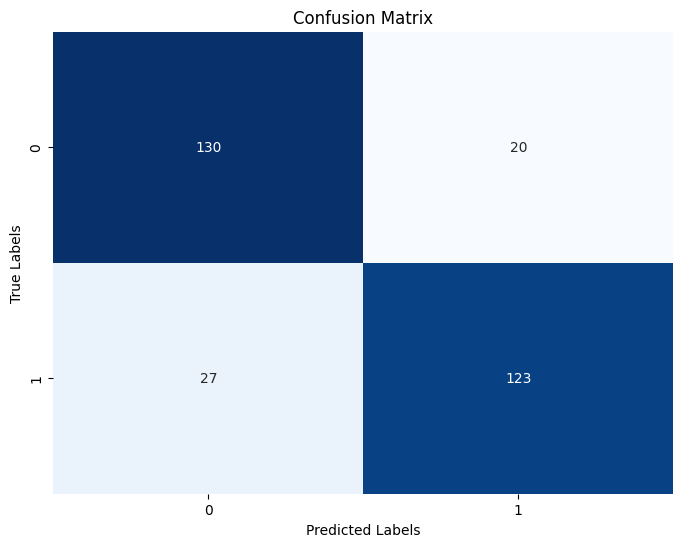

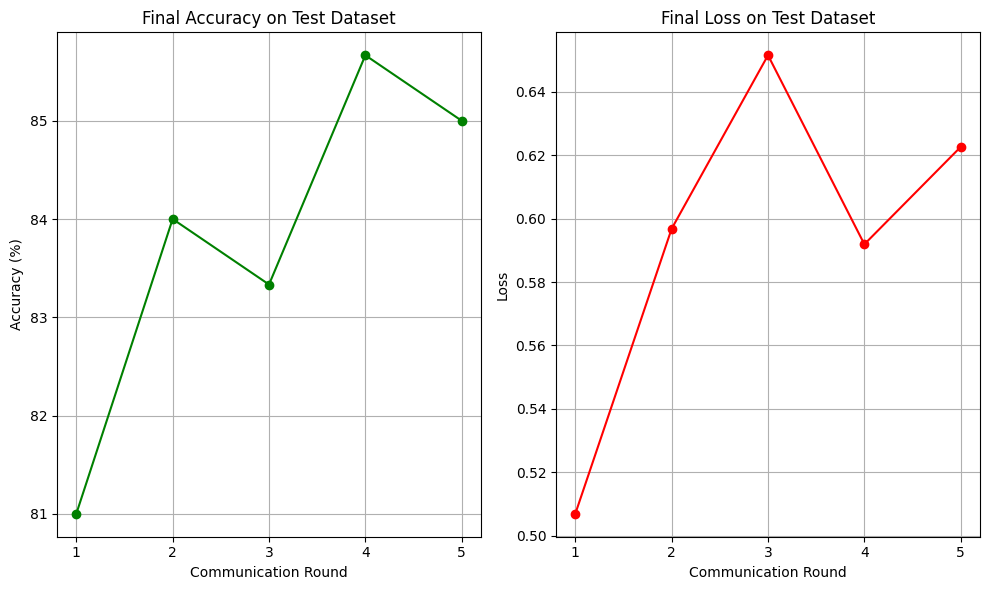

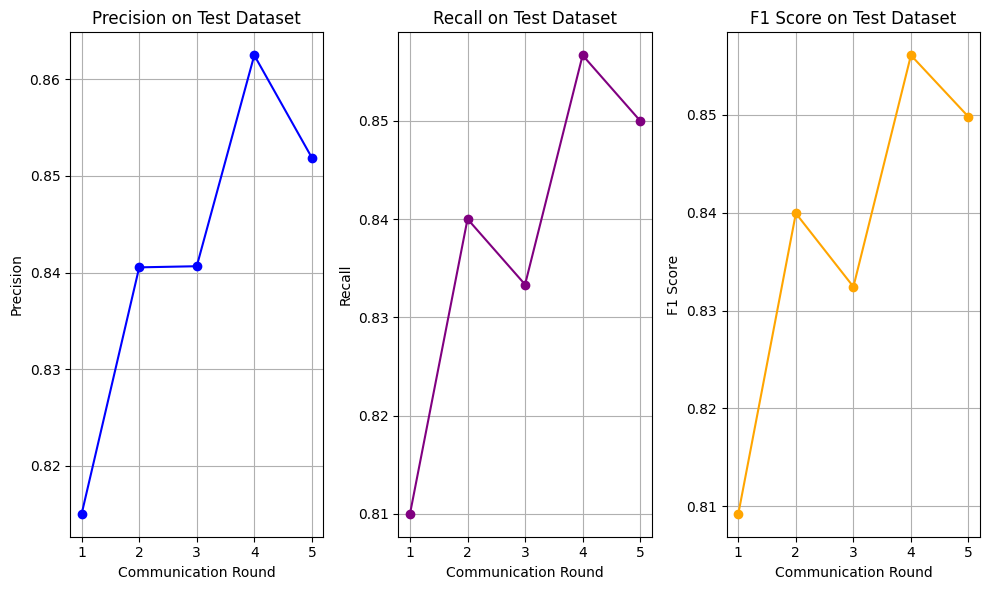

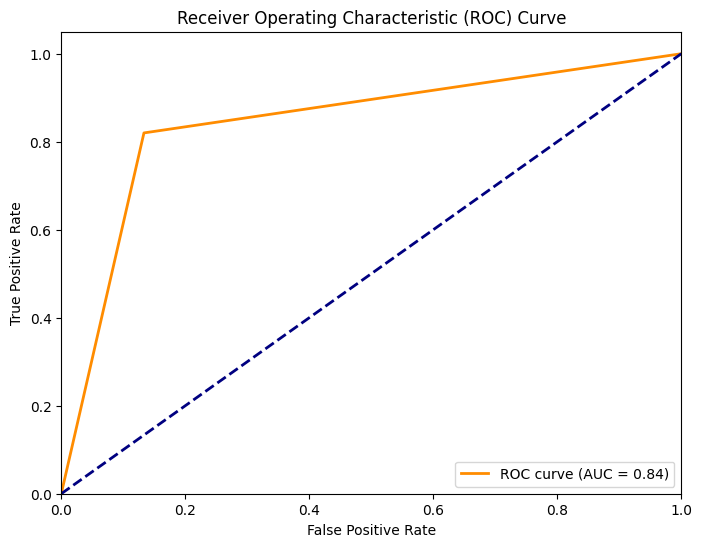

In [10]:
import csv
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Define the number of communication rounds and clients
num_communication_rounds = 5
num_clients = 10
num_epochs_per_round = 100
num_classes = 2 

# Lists to store testing accuracy, final accuracy, final loss, precision, recall, and F1 score
testing_accuracies = []
final_accuracies = []
final_losses = []
precisions = []
recalls = []
f1_scores = []

# Open a CSV file for writing
csv_filename = 'output.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    # Create a CSV writer
    csv_writer = csv.writer(csvfile)

    # Write the header row
    csv_writer.writerow(['Round', 'Client', 'Epoch', 'Training Accuracy', 'Training Loss'])

    # Convert the train_dataset into a list of data points
    train_data_list = list(train_dataset)

    for round in range(num_communication_rounds):
        print(f"Communication Round {round + 1}")

        # Randomly assign data to clients for this round
        client_data = {}
        for i in range(num_clients):
            client_data[i] = random.sample(train_data_list, len(train_data_list) // num_clients)

        # Generate a random AES key using Fernet for this round
        key = Fernet.generate_key()
        cipher_suite = Fernet(key)

        client_models = []

        for client in range(num_clients):
            # Encrypt and send the global model to the client
            global_model_state = global_model.state_dict()
            global_model_encrypted = cipher_suite.encrypt(pickle.dumps(global_model_state))
            with open(f'global_model_encrypted_round_{round}_client_{client}.pkl', 'wb') as f:
                f.write(global_model_encrypted)

            # Client-side code (decrypt, train, and fine-tune)
            with open(f'global_model_encrypted_round_{round}_client_{client}.pkl', 'rb') as f:
                encrypted_data = f.read()
                decrypted_global_model_state = pickle.loads(cipher_suite.decrypt(encrypted_data))

            decrypted_global_model = resnet50(pretrained=False)
            decrypted_global_model.fc = torch.nn.Linear(decrypted_global_model.fc.in_features, num_classes)
            decrypted_global_model.load_state_dict(decrypted_global_model_state)
            decrypted_global_model = decrypted_global_model.to(device)
            optimizer = optim.SGD(decrypted_global_model.parameters(), lr=0.01)

            print(f"Training Client {client}...")

            for epoch in tqdm(range(num_epochs_per_round), desc=f'Client {client}'):
                client_loader = DataLoader(client_data[client], batch_size=32, shuffle=True)
                total_train_loss = 0.0
                correct_train = 0
                total_train = 0

                for data, target in client_loader:
                    data, target = data.to(device), target.to(device)
                    optimizer.zero_grad()
                    outputs = decrypted_global_model(data)
                    loss = torch.nn.functional.cross_entropy(outputs, target)
                    loss.backward()
                    optimizer.step()

                    total_train_loss += loss.item()
                    _, predicted_train = outputs.max(1)
                    correct_train += predicted_train.eq(target).sum().item()
                    total_train += target.size(0)

                epoch_train_accuracy = 100 * correct_train / total_train
                epoch_train_loss = total_train_loss / len(client_loader)
                print(f'Training Accuracy for Client {client} - Epoch {epoch + 1}: {epoch_train_accuracy:.2f}%')
                print(f'Training Loss for Client {client} - Epoch {epoch + 1}: {epoch_train_loss:.4f}')

                # Write to CSV
                csv_writer.writerow([round + 1, client + 1, epoch + 1, epoch_train_accuracy, epoch_train_loss])


        # Evaluate the client model on the test dataset
            decrypted_global_model.eval()
            correct_test = 0
            total_test = 0
            test_loss = 0.0

            all_predictions = []
            all_targets = []

            with torch.no_grad():
                for data, target in test_dataset:
                    data, target = data.to(device), torch.tensor([target], dtype=torch.long).to(device)
                    outputs = decrypted_global_model(data.unsqueeze(0))
                    predictions = outputs.argmax()
                    correct_test += (predictions == target).item()

                    loss = torch.nn.functional.cross_entropy(outputs, target)
                    test_loss += loss.item()

                    all_predictions.append(predictions.item())
                    all_targets.append(target.item())

                    total_test += 1

            test_accuracy = 100 * correct_test / total_test
            avg_test_loss = test_loss / total_test

            # Calculate precision, recall, and F1 score for this round
            precision = precision_score(all_targets, all_predictions, average='weighted')
            recall = recall_score(all_targets, all_predictions, average='weighted')
            f1 = f1_score(all_targets, all_predictions, average='weighted')

            # Store metrics for each client
            client_testing_accuracies = [test_accuracy]
            client_testing_losses = [avg_test_loss]
            client_precisions = [precision]
            client_recalls = [recall]
            client_f1_scores = [f1]


            print(f'Testing Accuracy for Client {client}: {test_accuracy:.2f}%')
            print(f'Testing Loss for Client {client}: {avg_test_loss:.4f}')
            print(f'Precision for Client {client}: {precision:.4f}')
            print(f'Recall for Client {client}: {recall:.4f}')
            print(f'F1 Score for Client {client}: {f1:.4f}')

            decrypted_global_model.train()
            client_models.append(decrypted_global_model)

        

        # Aggregate client models (simple model averaging)
        aggregated_model_state = {}
        for param_name in global_model.state_dict():
            aggregated_param = torch.stack([client.state_dict()[param_name].float() for client in client_models]).mean(dim=0)
            aggregated_model_state[param_name] = aggregated_param

        # Update the global model with the aggregated model
        global_model.load_state_dict(aggregated_model_state)

        # Store testing accuracy for this round
        testing_accuracies.append(client_testing_accuracies)

        # Append client-specific metrics to the overall lists
        final_accuracies.append(client_testing_accuracies[-1])  # Assuming you want the accuracy of the last client
        final_losses.append(client_testing_losses[-1])  # Assuming you want the loss of the last client
        precisions.append(client_precisions[-1])  # Assuming you want the precision of the last client
        recalls.append(client_recalls[-1])  # Assuming you want the recall of the last client
        f1_scores.append(client_f1_scores[-1])  # Assuming you want the F1 score of the last client

        # Save the final global model
        torch.save(global_model.state_dict(), f'final_global_model_round_{round}.pth')


# Save other relevant information
saved_data = {
    'num_communication_rounds': num_communication_rounds,
    'num_clients': num_clients,
    'num_epochs_per_round': num_epochs_per_round,
    'num_classes': num_classes,
    'testing_accuracies': testing_accuracies,
    'final_accuracies': final_accuracies,
    'final_losses': final_losses,
    'precisions': precisions,
    'recalls': recalls,
    'f1_scores': f1_scores,
}

with open('saved_data.pkl', 'wb') as f:
    pickle.dump(saved_data, f)

# Evaluate the final global model on the test dataset
global_model.eval()
correct = 0
total = 0
final_loss = 0.0
all_predictions = []
all_targets = []

with torch.no_grad():
    for data, target in test_dataset:
        data, target = data.to(device), torch.tensor([target], dtype=torch.long).to(device)
        outputs = global_model(data.unsqueeze(0))
        predictions = outputs.argmax()
        correct += (predictions == target).item()

        loss = torch.nn.functional.cross_entropy(outputs, target)
        final_loss += loss.item()

        all_predictions.append(predictions.item())
        all_targets.append(target.item())

        total += 1

final_accuracy = 100 * correct / total
avg_final_loss = final_loss / total
precision = precision_score(all_targets, all_predictions, average='weighted')
recall = recall_score(all_targets, all_predictions, average='weighted')
f1 = f1_score(all_targets, all_predictions, average='weighted')
conf_matrix = confusion_matrix(all_targets, all_predictions)
roc_fpr, roc_tpr, _ = roc_curve(all_targets, all_predictions)
roc_auc = auc(roc_fpr, roc_tpr)

print(f'Final Accuracy on Test Dataset: {final_accuracy:.2f}%')
print(f'Final Loss on Test Dataset: {avg_final_loss:.4f}')
print(f'Precision on Test Dataset: {precision:.4f}')
print(f'Recall on Test Dataset: {recall:.4f}')
print(f'F1 Score on Test Dataset: {f1:.4f}')



# Save the final global model and other evaluation results
torch.save(global_model.state_dict(), 'final_global_model.pth')

# Save other relevant evaluation results
evaluation_results = {
    'final_accuracy': final_accuracy,
    'avg_final_loss': avg_final_loss,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'conf_matrix': conf_matrix,
    'roc_fpr': roc_fpr,
    'roc_tpr': roc_tpr,
    'roc_auc': roc_auc,
}

with open('evaluation_results.pkl', 'wb') as f:
    pickle.dump(evaluation_results, f)


# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the final accuracy and loss on the test dataset
plt.figure(figsize=(10, 6))

# Plotting final accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_communication_rounds + 1), final_accuracies, marker='o', color='green')
plt.title('Final Accuracy on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting final loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_communication_rounds + 1), final_losses, marker='o', color='red')
plt.title('Final Loss on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(roc_fpr, roc_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

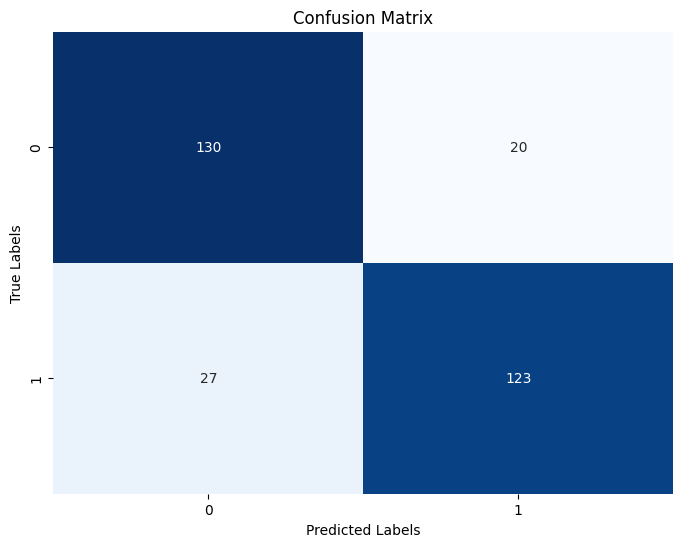

In [11]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix figure
plt.savefig('confusion_matrix.png')
plt.show()

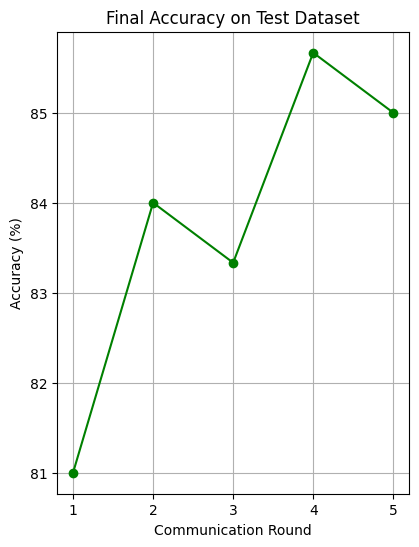

In [12]:
# Plotting the final accuracy and loss on the test dataset
plt.figure(figsize=(10, 6))

# Plotting final accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, num_communication_rounds + 1), final_accuracies, marker='o', color='green')
plt.title('Final Accuracy on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the final accuracy figure
plt.savefig('final_accuracy.png')
plt.show()

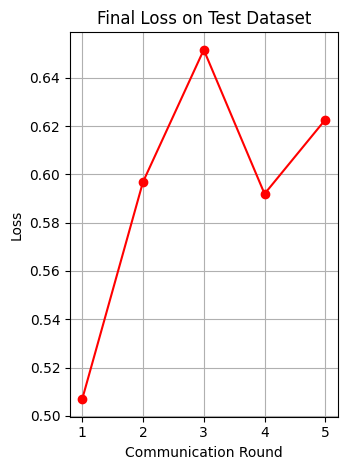

In [13]:
# Plotting final loss
plt.subplot(1, 2, 2)
plt.plot(range(1, num_communication_rounds + 1), final_losses, marker='o', color='red')
plt.title('Final Loss on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the final loss figure
plt.savefig('final_loss.png')
plt.tight_layout()
plt.show()

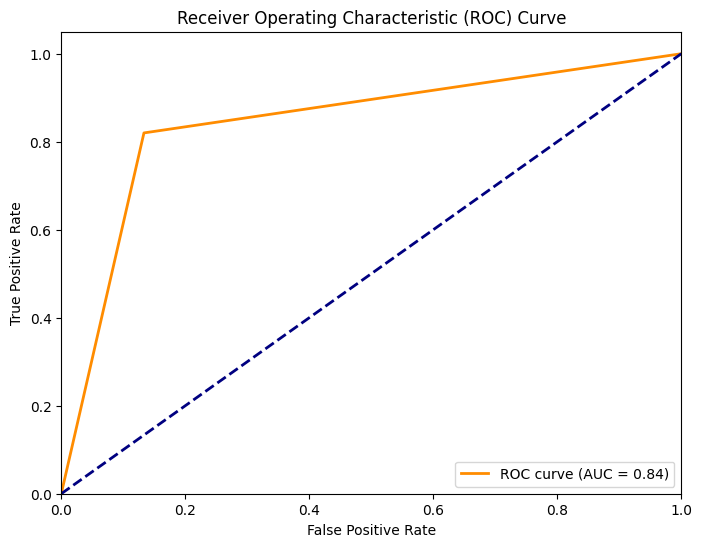

In [14]:
# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(roc_fpr, roc_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Save the ROC curve figure
plt.savefig('roc_curve.png')
plt.show()

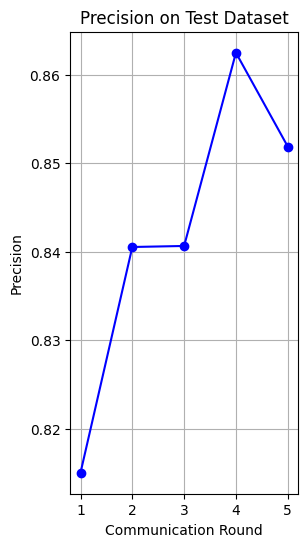

In [15]:
# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the ROC curve figure
plt.savefig('Precision on test dataset')
plt.show()

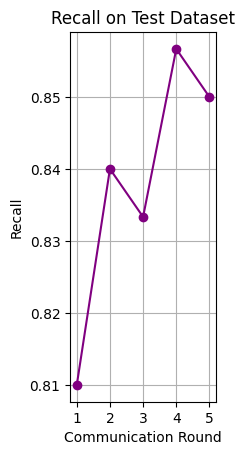

In [16]:
# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)


# Save the ROC curve figure
plt.savefig('Recall on test dataset')
plt.show()

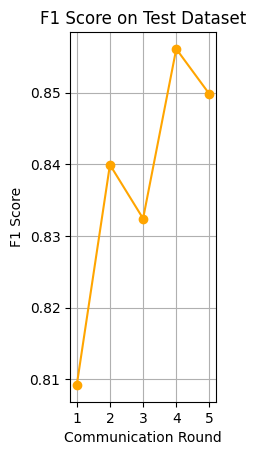

In [17]:
# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Save the ROC curve figure
plt.savefig('F1 Score on test dataset')
plt.show()

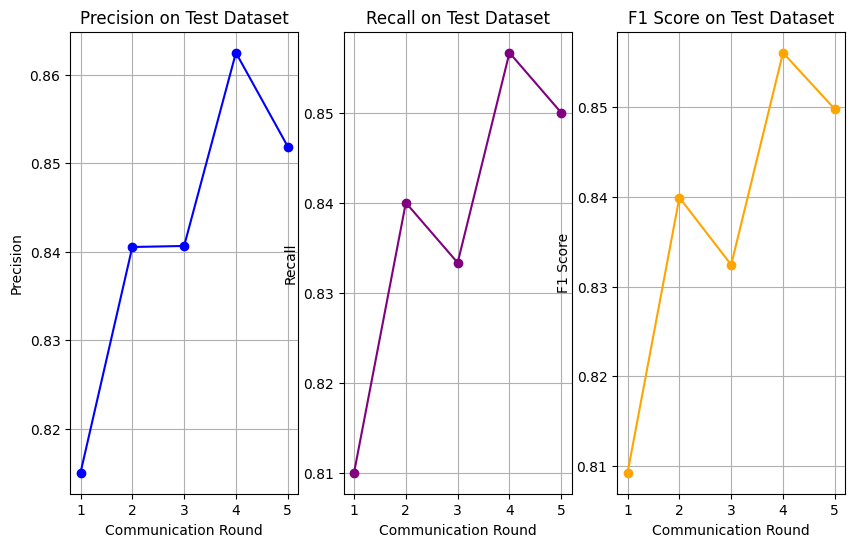

In [18]:
# Plotting precision, recall, and F1 score for each round
plt.figure(figsize=(10, 6))

# Plotting precision
plt.subplot(1, 3, 1)
plt.plot(range(1, num_communication_rounds + 1), precisions, marker='o', color='blue')
plt.title('Precision on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Precision')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting recall
plt.subplot(1, 3, 2)
plt.plot(range(1, num_communication_rounds + 1), recalls, marker='o', color='purple')
plt.title('Recall on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('Recall')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)

# Plotting F1 score
plt.subplot(1, 3, 3)
plt.plot(range(1, num_communication_rounds + 1), f1_scores, marker='o', color='orange')
plt.title('F1 Score on Test Dataset')
plt.xlabel('Communication Round')
plt.ylabel('F1 Score')
plt.xticks(range(1, num_communication_rounds + 1))
plt.grid(True)


# Save the ROC curve figure
plt.savefig('Precision, Recall and F1 Score on test dataset')
plt.show()

In [19]:
from IPython.display import HTML
import torch
from torchvision.models import resnet50

# Assuming 'model' is your PyTorch model
model = resnet50(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)

# Save the model to the working directory
torch.save(model.state_dict(), 'final_global_model_resnet50.pth')

# Verify that the file is in the working directory
print(os.listdir())

# Optionally, you can generate a download link
output_file = 'final_global_model_resnet50.pth'
output_link = f'<a href="{output_file}" download="{output_file}">Download {output_file}</a>'
display(HTML(output_link))

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


['global_model_encrypted_round_3_client_3.pkl', 'global_model_encrypted_round_3_client_6.pkl', 'Precision on test dataset.png', 'global_model_encrypted_round_1_client_7.pkl', 'global_model_encrypted_round_0_client_8.pkl', 'global_model_encrypted_round_1_client_5.pkl', 'global_model_encrypted_round_4_client_1.pkl', 'global_model_encrypted_round_3_client_7.pkl', 'final_global_model_resnet50.pth', 'confusion_matrix.png', 'final_global_model_round_4.pth', 'global_model_encrypted_round_0_client_0.pkl', 'Precision, Recall and F1 Score on test dataset.png', 'global_model_encrypted_round_2_client_4.pkl', 'global_model_encrypted_round_1_client_1.pkl', 'final_global_model_round_0.pth', 'global_model_encrypted_round_0_client_7.pkl', 'final_accuracy.png', 'global_model_encrypted_round_2_client_7.pkl', 'global_model_encrypted_round_2_client_0.pkl', 'final_loss.png', 'global_model_encrypted_round_4_client_4.pkl', 'global_model_encrypted_round_3_client_0.pkl', 'global_model_encrypted_round_4_client_0